In [1]:
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from scipy import sparse
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from ngboost import NGBRegressor
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
all_data = pd.read_csv('asos_train.csv', encoding='cp949')


relevant_loc = ['영암에프원태양광b']

all_data = all_data[all_data['name'].isin(relevant_loc)]

all_data.fillna(-1, inplace=True)

all_data['date'] = pd.to_datetime(all_data['date'])
all_data['year'] = all_data['date'].dt.year
all_data['month'] = all_data['date'].dt.month
all_data['hour'] = all_data['date'].dt.hour
all_data['day'] = all_data['date'].dt.day


# drop_columns = [ "asos_num", "location", "capacities", "land", "power/land",
#                'Wind_Direction(16 compass points)', "Date/Time",
#                'Sea-level_Pressure(hPa)',
#                'Mid-Low_Cloud_Cover', 'Cloud_Form', 'Lowest_Cloud_Height(100m)', 'Ground_Condition', 'Phenomenon_Number',
#                  '5cm_Underground_Temp', '10cm_Underground_Temp',
#                '20cm_Underground_Temp', '30cm_Underground_Temp', 'Dew_Point(C)',
#        'Local Atmospheric Pressure(hPa)','3-hour_Fresh_Snowfall','Visibility(10m)', 'Ground Temp', 'day']

drop_columns = [ "asos_num", "location", "capacities", "land", "power/land",
               'Wind_Direction(16 compass points)', "Date/Time",
               'Sea-level_Pressure(hPa)',
               'Mid-Low_Cloud_Cover', 'Cloud_Form', 'Lowest_Cloud_Height(100m)', 'Ground_Condition', 'Phenomenon_Number',
                 '5cm_Underground_Temp', '10cm_Underground_Temp',
               '20cm_Underground_Temp', '30cm_Underground_Temp', 'Dew_Point(C)',
       'Local Atmospheric Pressure(hPa)','3-hour_Fresh_Snowfall','Visibility(10m)', 'Ground Temp', 'day',
              'Prec(mm)', 
       'Humidity', 'Vapor_pressure(hPa)', 'sunshine(hr)',
       'Snowfall(cm)', 'Cloud_Cover(1/10)',
       'month', 'hour']


all_data = all_data.drop(columns=drop_columns)

#all_data['solar_radiation(W/m2)'] = all_data['Solar_Radiation(MJ/m2)'] * 277.78
all_data['power'] = all_data['power'] / 226000

all_data_train = all_data[all_data['year'].isin([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])]
all_data_test = all_data[all_data['year'].isin([2021,2022])]

all_data_train.sort_values(by='date', inplace=True)
all_data_test.sort_values(by='date', inplace=True)



X_train = all_data_train.drop(columns=['power', 'name', 'date'], axis = 1).values
y_train = all_data_train['power'].values
X_test = all_data_test.drop(columns=['power', 'name', 'date'], axis = 1).values
y_test = all_data_test['power'].values

C:\Users\sedag\AppData\Local\Temp\ipykernel_1652\1762954522.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_train.sort_values(by='date', inplace=True)
C:\Users\sedag\AppData\Local\Temp\ipykernel_1652\1762954522.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_test.sort_values(by='date', inplace=True)


In [109]:
X_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [62]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from ngboost import NGBRegressor
from ngboost.learners import default_tree_learner
from ngboost.distns import Normal
from ngboost.scores import MLE

def evaluate(true, preds):
    mae = mean_absolute_error(true, preds)
    mse = mean_squared_error(true, preds)
    rmse = sqrt(mse)
    r2 = r2_score(true, preds)
    return mae, mse, rmse, r2


In [ ]:
n_estimators': 3809, 'minibatch_frac': 0.42706903156084186, 'col_sample': 0.947970438063589, 'learning_rate': 0.1

In [141]:
# #전체
# ngb = NGBRegressor(n_estimators=3809,  natural_gradient=True,
#                    learning_rate = 0.01,Base=default_tree_learner, Dist=Normal, Score=MLE, 
#                    minibatch_frac = 0.427, col_sample = 0.94797, verbose_eval =50)
# ngb.fit(X_train, y_train, X_val = X_test, Y_val = y_test, early_stopping_rounds = 25)

#전체
ngb = NGBRegressor(n_estimators=3809,  
                   learning_rate = 0.01, 
                   minibatch_frac = 0.42706903156084186, 
                   col_sample = 0.947970438063589,
                  natural_gradient=True, Base=default_tree_learner, Dist=Normal, Score=MLE, verbose_eval =50)
ngb.fit(X_train, y_train)

[iter 0] loss=4.1194 val_loss=0.0000 scale=1.0000 norm=13.0636
[iter 50] loss=3.6138 val_loss=0.0000 scale=2.0000 norm=13.3532
[iter 100] loss=3.2171 val_loss=0.0000 scale=2.0000 norm=7.6682
[iter 150] loss=2.9003 val_loss=0.0000 scale=2.0000 norm=5.7767
[iter 200] loss=2.6612 val_loss=0.0000 scale=2.0000 norm=5.0989
[iter 250] loss=2.4812 val_loss=0.0000 scale=2.0000 norm=4.7762
[iter 300] loss=2.3624 val_loss=0.0000 scale=2.0000 norm=4.6313
[iter 350] loss=2.2953 val_loss=0.0000 scale=2.0000 norm=4.5351
[iter 400] loss=2.2618 val_loss=0.0000 scale=1.0000 norm=2.2363
[iter 450] loss=2.2347 val_loss=0.0000 scale=1.0000 norm=2.2327
[iter 500] loss=2.2083 val_loss=0.0000 scale=1.0000 norm=2.1905
[iter 550] loss=2.2023 val_loss=0.0000 scale=1.0000 norm=2.2138
[iter 600] loss=2.1680 val_loss=0.0000 scale=1.0000 norm=2.1735
[iter 650] loss=2.1722 val_loss=0.0000 scale=1.0000 norm=2.1749
[iter 700] loss=2.1429 val_loss=0.0000 scale=1.0000 norm=2.1375
[iter 750] loss=2.1288 val_loss=0.0000 sc

NGBRegressor(col_sample=0.947970438063589, minibatch_frac=0.42706903156084186,
             n_estimators=3809,
             random_state=RandomState(MT19937) at 0x1DE8420DB40,
             verbose_eval=50)

In [142]:
y_train_ngb = ngb.pred_dist(X_train)
rmse = str(np.sqrt(mean_squared_error(y_train_ngb.loc, y_train)))
print(rmse)

3.0184506794403783


In [143]:
y_test_ngb = ngb.pred_dist(X_test)
rmse = str(np.sqrt(mean_squared_error(y_test_ngb.loc, y_test)))
print(rmse)

3.27191466689858


In [144]:
predictions = pd.DataFrame(y_test_ngb.loc, columns = ['Predictions'])
predictions_upper = pd.DataFrame(y_test_ngb.dist.interval(0.95)[1], columns = ['Predictions_upper'])
predictions_lower = pd.DataFrame(y_test_ngb.dist.interval(0.95)[0], columns = ['Predictions_lower'])

In [145]:
df_figure = pd.concat([all_data_test[['date', 'power']], predictions, predictions_upper, predictions_lower], axis = 1)
df_figure

date      power  Predictions  Predictions_upper   
8924 2021-01-01 09:00:00   0.212389     5.623541           8.181795  \
8925 2021-01-01 10:00:00   1.953982    19.923872          24.745680   
8926 2021-01-01 11:00:00   4.715044    32.441198          36.883472   
8927 2021-01-01 12:00:00   4.205310    37.734779          42.526412   
8928 2021-01-01 13:00:00  11.171681    32.248624          43.507237   
8929 2021-01-01 14:00:00   6.456637    36.845323          44.789026   
8930 2021-01-01 15:00:00  20.176991    35.648938          40.131944   
8931 2021-01-01 16:00:00  11.681416    24.586007          28.189362   
8932 2021-01-01 17:00:00   6.244248    10.548768          12.801978   
8933 2021-01-01 18:00:00   0.212389     0.786388           1.387782   
8914 2021-01-02 09:00:00   0.339823     0.624773           1.774400   
8915 2021-01-02 10:00:00   6.499115    12.314411          17.958441   
8916 2021-01-02 11:00:00  27.823009    28.003916          33.224190   
8917 2021-01-02 12:00:00  32.070796    36.722390          42.107048   
8918 2021-01-02 13:00:00  36.573451    38.405624          44.119852   
8919 2021-01-02 14:00:00  38.484956    39.074693          45.107979   
8920 2021-01-02 15:00:00  34.364602    35.040430          40.544615   
8921 2021-01-02 16:00:00  23.660177    23.158580          27.407792   
8922 2021-01-02 17:00:00   9.090265     9.806387          12.289288   
8923 2021-01-02 18:00:00   0.382301     0.728596           1.319896   
8905 2021-01-03 09:00:00   4.035398    16.823924          21.961829   
8906 2021-01-03 10:00:00  16.481416    31.203453          35.967878   
8907 2021-01-03 11:00:00  27.950442    37.190249          43.055539   
8908 2021-01-03 12:00:00  34.364602    31.165529          44.184372   
8909 2021-01-03 13:00:00  31.391150    29.545852          40.511670   
8910 2021-01-03 14:00:00  14.952212    23.004127          32.906267   
8911 2021-01-03 15:00:00   9.557522    14.817181          21.228957   
8912 2021-01-03 16:00:00   4.247788     5.951371           8.145611   
8913 2021-01-03 17:00:00   1.614159     0.077467           0.600404   
8895 2021-01-04 09:00:00   5.394690     8.414592          13.561269   
8896 2021-01-04 10:00:00  14.909735    23.887884          29.589963   
8897 2021-01-04 11:00:00  26.761062    35.267776          40.200450   
8898 2021-01-04 12:00:00  34.407080    36.742683          45.580654   
8899 2021-01-04 13:00:00  36.870796    30.084224          44.535901   
8900 2021-01-04 14:00:00  36.530973    24.200634          35.680300   
8901 2021-01-04 15:00:00  22.003540    21.465153          26.359644   
8902 2021-01-04 16:00:00  11.469027     9.138391          11.998140   
8903 2021-01-04 17:00:00   6.456637     0.604084           1.225599   
8904 2021-01-04 18:00:00   0.637168     1.687578           2.914885   
8885 2021-01-05 09:00:00   4.332743    18.513594          23.323703   
8886 2021-01-05 10:00:00  12.063717    30.427970          36.919909   
8887 2021-01-05 11:00:00  16.353982    36.200203          43.098039   
8888 2021-01-05 12:00:00  11.469027    39.779155          46.878107   
8889 2021-01-05 13:00:00  11.341593    38.801206          45.783111   
8890 2021-01-05 14:00:00   9.472566    33.247632          40.178742   
8891 2021-01-05 15:00:00   8.325664    21.136040          26.356801   
8892 2021-01-05 16:00:00   6.074336     9.447574          11.931809   
8893 2021-01-05 17:00:00   3.610619     0.646807           1.179002   
8894 2021-01-05 18:00:00   0.169912     2.345840           3.875469   
8875 2021-01-06 09:00:00   0.254867     8.042075          11.830188   
8876 2021-01-06 10:00:00   2.930973    19.115024          27.161136   
8877 2021-01-06 11:00:00  13.210619    17.068811          23.757695   
8878 2021-01-06 12:00:00  32.410619    24.970942          37.294949   
8879 2021-01-06 13:00:00  34.024779    34.250086          44.151054   
8880 2021-01-06 14:00:00  37.168142    20.462496          31.409948   
8881 2021-01-06 15:00:00  23.660177    16.44

In [146]:
all_data_test_reset = all_data_test[['date', 'power']].reset_index(drop=True)
predictions_reset = predictions.reset_index(drop=True)
predictions_upper_reset = predictions_upper.reset_index(drop=True)
predictions_lower_reset = predictions_lower.reset_index(drop=True)
df_figure_fixed = pd.concat([all_data_test_reset, predictions_reset, predictions_upper_reset, predictions_lower_reset], axis=1)
df_figure_fixed

date      power  Predictions  Predictions_upper   
0    2021-01-01 09:00:00   0.212389    -1.560363           1.838157  \
1    2021-01-01 10:00:00   1.953982     6.738185          15.273523   
2    2021-01-01 11:00:00   4.715044    10.736040          19.793756   
3    2021-01-01 12:00:00   4.205310    15.203024          23.842071   
4    2021-01-01 13:00:00  11.171681    19.148877          27.270925   
5    2021-01-01 14:00:00   6.456637    26.750607          36.861086   
6    2021-01-01 15:00:00  20.176991    27.719059          36.082905   
7    2021-01-01 16:00:00  11.681416    12.398120          18.299188   
8    2021-01-01 17:00:00   6.244248     6.790397           9.674960   
9    2021-01-01 18:00:00   0.212389     0.551420           1.224704   
10   2021-01-02 09:00:00   0.339823     0.710480           1.968146   
11   2021-01-02 10:00:00   6.499115    10.265129          16.148210   
12   2021-01-02 11:00:00  27.823009    25.024053          30.483851   
13   2021-01-02 12:00:00  32.070796    37.120982          42.751798   
14   2021-01-02 13:00:00  36.573451    42.149710          45.885815   
15   2021-01-02 14:00:00  38.484956    40.620587          44.265861   
16   2021-01-02 15:00:00  34.364602    35.572137          39.449758   
17   2021-01-02 16:00:00  23.660177    24.060811          27.525562   
18   2021-01-02 17:00:00   9.090265    10.458338          13.386618   
19   2021-01-02 18:00:00   0.382301     0.945362           1.614793   
20   2021-01-03 09:00:00   4.035398     4.151432           5.887092   
21   2021-01-03 10:00:00  16.481416    17.138391          20.397730   
22   2021-01-03 11:00:00  27.950442    29.468826          33.070142   
23   2021-01-03 12:00:00  34.364602    37.140313          41.952381   
24   2021-01-03 13:00:00  31.391150    35.237073          41.554326   
25   2021-01-03 14:00:00  14.952212    20.225897          28.236591   
26   2021-01-03 15:00:00   9.557522    11.760837          16.735858   
27   2021-01-03 16:00:00   4.247788     5.200229           7.325281   
28   2021-01-03 17:00:00   1.614159     1.925976           2.945847   
29   2021-01-04 09:00:00   5.394690     4.940136           6.717658   
30   2021-01-04 10:00:00  14.909735    16.776130          19.954586   
31   2021-01-04 11:00:00  26.761062    28.352161          32.092123   
32   2021-01-04 12:00:00  34.407080    36.255887          39.584325   
33   2021-01-04 13:00:00  36.870796    38.054820          43.107645   
34   2021-01-04 14:00:00  36.530973    33.676747          39.255127   
35   2021-01-04 15:00:00  22.003540    22.803602          31.472907   
36   2021-01-04 16:00:00  11.469027    15.578585          21.925218   
37   2021-01-04 17:00:00   6.456637     8.255033          11.922653   
38   2021-01-04 18:00:00   0.637168     0.698157           1.430183   
39   2021-01-05 09:00:00   4.332743     5.296662           7.716283   
40   2021-01-05 10:00:00  12.063717    13.283592          18.667127   
41   2021-01-05 11:00:00  16.353982    19.740029          27.693387   
42   2021-01-05 12:00:00  11.469027    14.566197          21.722993   
43   2021-01-05 13:00:00  11.341593    15.642977          21.617162   
44   2021-01-05 14:00:00   9.472566    14.402275          20.326412   
45   2021-01-05 15:00:00   8.325664    11.003404          16.094464   
46   2021-01-05 16:00:00   6.074336     8.224700          11.837530   
47   2021-01-05 17:00:00   3.610619     4.204000           6.288584   
48   2021-01-05 18:00:00   0.169912     0.657314           1.356431   
49   2021-01-06 09:00:00   0.254867    -3.537702          -0.513663   
50   2021-01-06 10:00:00   2.930973     1.840145           8.847569   
51   2021-01-06 11:00:00  13.210619    18.694052          27.852730   
52   2021-01-06 12:00:00  32.410619    31.236464          39.054848   
53   2021-01-06 13:00:00  34.024779    38.892117          45.889102   
54   2021-01-06 14:00:00  37.168142    28.893783          37.324639   
55   2021-01-06 15:00:00  23.660177    21.12

In [147]:
df_figure_fixed.isna().sum()

date                 0
power                0
Predictions          0
Predictions_upper    0
Predictions_lower    0
dtype: int64

In [148]:
def plot_results(df, title):
    fig, ax = plt.subplots(figsize=(22, 5))
    plt.plot(df.date, df.Predictions, label = 'Consumption_Predicted', color='b', lw=2)
    plt.fill_between(df.date, df.Predictions_lower,  df.Predictions_upper,label = '95% Prediction Interval', color='gray', alpha=0.5)
    plt.scatter(df.date, df['power'], label = 'power Actual', color='g', lw=3)
    ax.legend(fontsize = 14)
    plt.title('power Actual vs. Predicted Values with Prediction Intervals')
    plt.xlabel(title)
    plt.show()

C:\Users\sedag\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


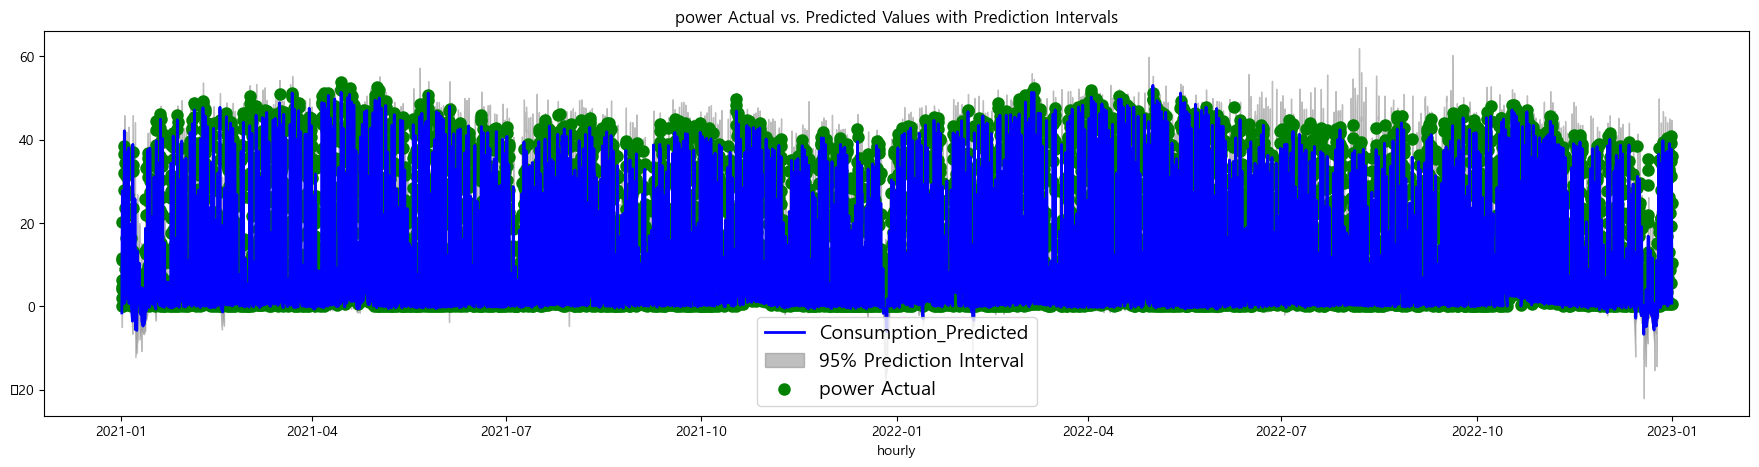

In [149]:
plot_results(df_figure_fixed, "hourly")

In [150]:
def plot_aggregated_results(df, freq, title_suffix):
    """
    Given a dataframe, this function aggregates the data by the specified frequency 
    (e.g., 'D' for daily and 'M' for monthly) and then plots the actual vs. predicted values.
    """
    # Aggregate the data
    aggregated_actual = df.resample(freq, on='date')['power'].sum()
    aggregated_predicted = df.resample(freq, on='date')['Predictions'].sum()
    aggregated_upper = df.resample(freq, on='date')['Predictions_upper'].sum()
    aggregated_lower = df.resample(freq, on='date')['Predictions_lower'].sum()
    
    corr_coefficient, _ = calculate_pearsonr(aggregated_actual, aggregated_predicted)


    # Plot
    fig, ax = plt.subplots(figsize=(22, 5))
    ax.plot(aggregated_actual.index, aggregated_predicted, label='Predicted', color='b', lw=2)
    ax.fill_between(aggregated_actual.index, aggregated_lower, aggregated_upper, label='95% Prediction Interval', color='gray', alpha=0.5)
    ax.scatter(aggregated_actual.index, aggregated_actual, label='Actual', color='g', lw=3)
    ax.legend(fontsize=14)
    ax.set_title(f'{title_suffix} Actual vs. Predicted Values with Prediction Intervals')
    ax.set_xlabel('Date')
    ax.text(0.05, 0.95, f'Pearson Correlation: {corr_coefficient:.4f}', transform=ax.transAxes, verticalalignment='top')
    
    plt.show()

C:\Users\sedag\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


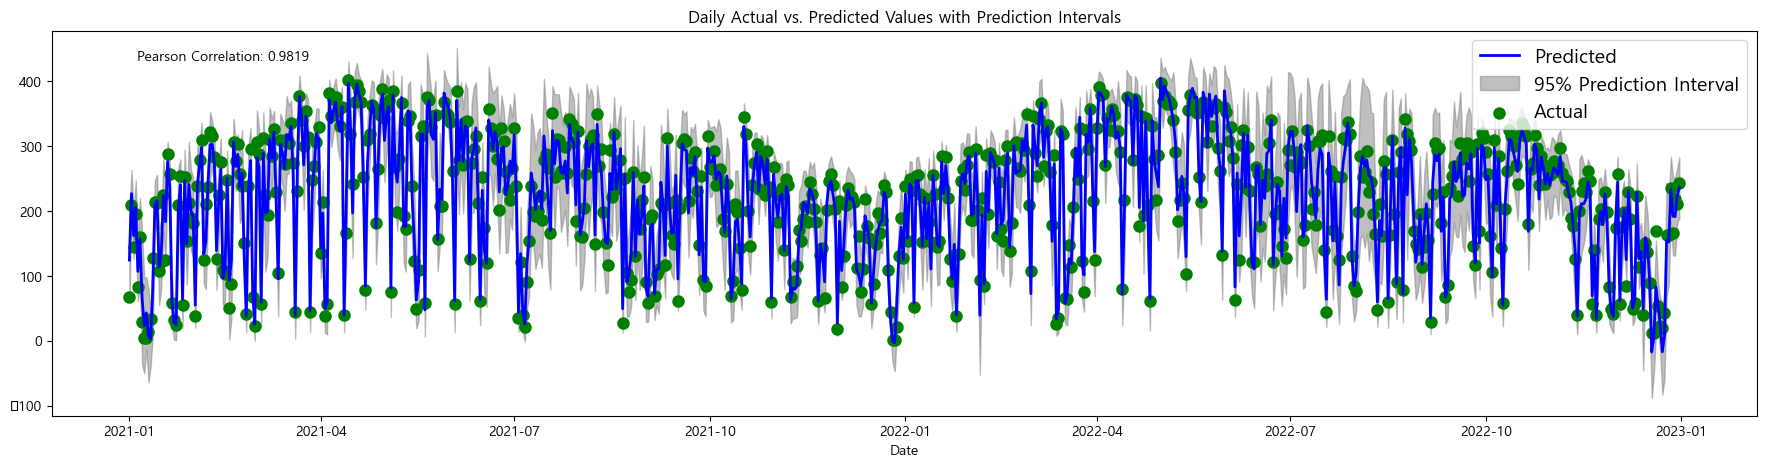

In [151]:

# Convert 'date' column to datetime type
df_figure_fixed['date'] = pd.to_datetime(df_figure_fixed['date'])

# Plot daily aggregated results
plot_aggregated_results(df_figure_fixed, 'D', 'Daily')


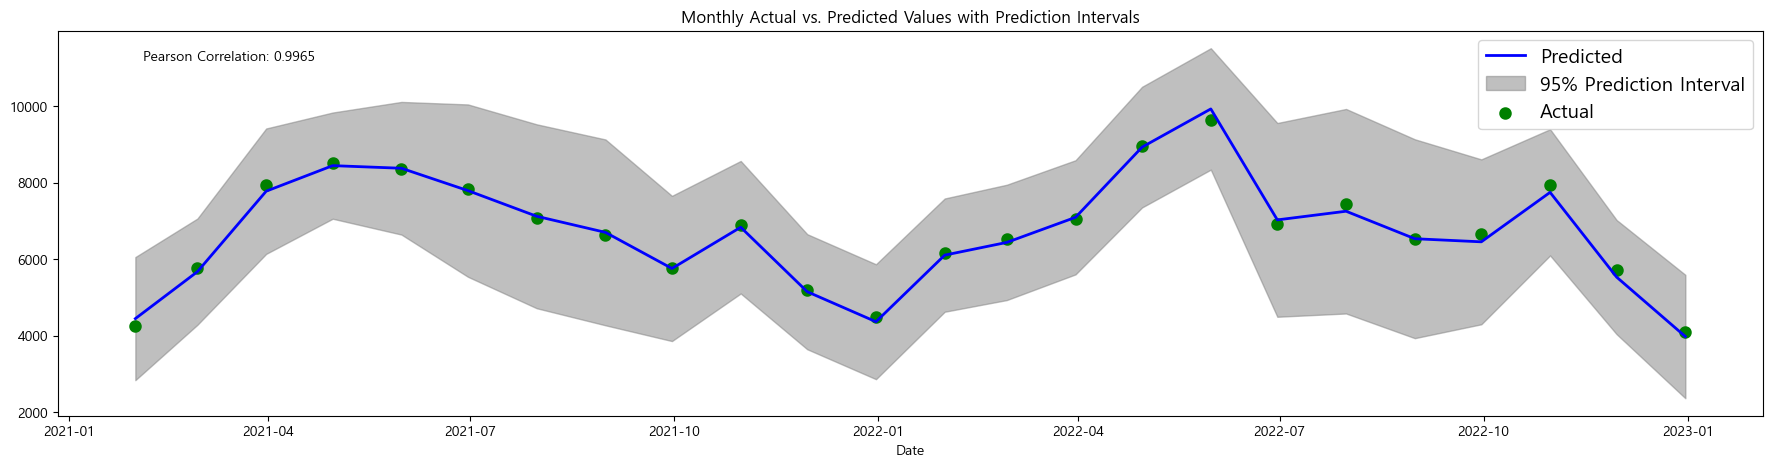

In [152]:
# Plot monthly aggregated results
plot_aggregated_results(df_figure_fixed, 'M', 'Monthly')


# OPTUNA(ALL COLUMNS)

In [103]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler


# n_estimators=650,  natural_gradient=True, 
# learning_rate = 0.01,Base=default_tree_learner, Dist=Normal, 
# Score=MLE, verbose_eval =50

# criterion='friedman_mse', 
# max_depth=4, max_features=None,
# max_leaf_nodes=None, min_impurity_decrease=0.0,
# min_impurity_split=None, min_samples_leaf=1,
# min_samples_split=2, min_weight_fraction_leaf=0.0,
# presort=False, random_state=None, splitter='best'), 'minibatch_frac': 1.0

def optunaNGB(trial: Trial, X, y, test):
    param = {
        "n_estimators" : trial.suggest_int('n_estimators', 100, 4000),
        "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
        "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),
        "learning_rate" : trial.suggest_categorical('learning_rate', [0.1, 0.01, 0.001])
    }
    model = NGBRegressor(**param)
    ngb_model = model.fit(X, y)
    score = mean_squared_error(ngb_model.predict(X), y, squared = False)
    
    return score

study = optuna.create_study(direction = 'minimize', sampler = TPESampler())
study.optimize(lambda trial: optunaNGB(trial, X_train, y_train, X_test), n_trials = 100)
print('Best trial: score {}, \nparams {}'.format(study.best_trial.value, study.best_trial.params))

[I 2023-10-10 14:27:26,774] A new study created in memory with name: no-name-82fc8351-957a-4e60-9c0a-45ccaaa76374
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1253 val_loss=0.0000 scale=1.0000 norm=13.1626
[iter 100] loss=4.0208 val_loss=0.0000 scale=1.0000 norm=11.9564
[iter 200] loss=3.9231 val_loss=0.0000 scale=2.0000 norm=21.3715
[iter 300] loss=3.8235 val_loss=0.0000 scale=2.0000 norm=18.6282
[iter 400] loss=3.7366 val_loss=0.0000 scale=2.0000 norm=16.3484
[iter 500] loss=3.6559 val_loss=0.0000 scale=1.0000 norm=7.2182
[iter 600] loss=3.5688 val_loss=0.0000 scale=2.0000 norm=12.6045
[iter 700] loss=3.4830 val_loss=0.0000 scale=2.0000 norm=11.0477
[iter 800] loss=3.4039 val_loss=0.0000 scale=2.0000 norm=9.8605


[I 2023-10-10 14:28:26,416] Trial 0 finished with value: 5.5720325011812735 and parameters: {'n_estimators': 869, 'minibatch_frac': 0.6916766614190135, 'col_sample': 0.7240512507205794, 'learning_rate': 0.001}. Best is trial 0 with value: 5.5720325011812735.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1199 val_loss=0.0000 scale=1.0000 norm=13.0735
[iter 100] loss=4.0298 val_loss=0.0000 scale=1.0000 norm=12.0610
[iter 200] loss=3.9198 val_loss=0.0000 scale=2.0000 norm=21.2489
[iter 300] loss=3.8266 val_loss=0.0000 scale=1.0000 norm=9.3647
[iter 400] loss=3.7349 val_loss=0.0000 scale=2.0000 norm=16.2715
[iter 500] loss=3.6509 val_loss=0.0000 scale=2.0000 norm=14.2882
[iter 600] loss=3.5665 val_loss=0.0000 scale=2.0000 norm=12.5624
[iter 700] loss=3.4814 val_loss=0.0000 scale=2.0000 norm=11.0591
[iter 800] loss=3.4005 val_loss=0.0000 scale=2.0000 norm=9.8249
[iter 900] loss=3.3242 val_loss=0.0000 scale=2.0000 norm=8.8637
[iter 1000] loss=3.2487 val_loss=0.0000 scale=2.0000 norm=8.0874
[iter 1100] loss=3.1756 val_loss=0.0000 scale=2.0000 norm=7.4047
[iter 1200] loss=3.1087 val_loss=0.0000 scale=2.0000 norm=6.9167
[iter 1300] loss=3.0434 val_loss=0.0000 scale=2.0000 norm=6.4728
[iter 1400] loss=2.9827 val_loss=0.0000 scale=2.0000 norm=6.1579
[iter 1500] loss=2.9255 val_lo

[I 2023-10-10 14:31:37,279] Trial 1 finished with value: 3.3475358088048917 and parameters: {'n_estimators': 3109, 'minibatch_frac': 0.5960516994510724, 'col_sample': 0.6813458968623228, 'learning_rate': 0.001}. Best is trial 1 with value: 3.3475358088048917.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1231 val_loss=0.0000 scale=1.0000 norm=13.1318
[iter 100] loss=2.1412 val_loss=0.0000 scale=1.0000 norm=2.1548
[iter 200] loss=2.0905 val_loss=0.0000 scale=0.5000 norm=1.0542
[iter 300] loss=2.0489 val_loss=0.0000 scale=0.5000 norm=1.0427
[iter 400] loss=2.0215 val_loss=0.0000 scale=2.0000 norm=4.0957
[iter 500] loss=2.0025 val_loss=0.0000 scale=1.0000 norm=2.0170
[iter 600] loss=1.9927 val_loss=0.0000 scale=0.1250 norm=0.2555
[iter 700] loss=1.9686 val_loss=0.0000 scale=1.0000 norm=1.9953
[iter 800] loss=1.9595 val_loss=0.0000 scale=1.0000 norm=1.9832
[iter 900] loss=1.9428 val_loss=0.0000 scale=0.5000 norm=0.9841
[iter 1000] loss=1.9406 val_loss=0.0000 scale=1.0000 norm=1.9684
[iter 1100] loss=1.9478 val_loss=0.0000 scale=0.5000 norm=0.9891
[iter 1200] loss=1.9082 val_loss=0.0000 scale=0.5000 norm=0.9643
[iter 1300] loss=1.9120 val_loss=0.0000 scale=0.5000 norm=0.9660
[iter 1400] loss=1.9121 val_loss=0.0000 scale=0.5000 norm=0.9747
[iter 1500] loss=1.9053 val_loss=0.0

[I 2023-10-10 14:34:41,157] Trial 2 finished with value: 2.706404669512061 and parameters: {'n_estimators': 3196, 'minibatch_frac': 0.46951260680144413, 'col_sample': 0.9827200462935433, 'learning_rate': 0.1}. Best is trial 2 with value: 2.706404669512061.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1151 val_loss=0.0000 scale=1.0000 norm=13.0141
[iter 100] loss=2.1514 val_loss=0.0000 scale=0.5000 norm=1.0826
[iter 200] loss=2.0983 val_loss=0.0000 scale=1.0000 norm=2.1111
[iter 300] loss=2.0641 val_loss=0.0000 scale=0.5000 norm=1.0447
[iter 400] loss=2.0585 val_loss=0.0000 scale=1.0000 norm=2.0757
[iter 500] loss=2.0496 val_loss=0.0000 scale=1.0000 norm=2.1139


[I 2023-10-10 14:35:00,614] Trial 3 finished with value: 3.0324962374349216 and parameters: {'n_estimators': 538, 'minibatch_frac': 0.2668368580328444, 'col_sample': 0.8285936298230068, 'learning_rate': 0.1}. Best is trial 2 with value: 2.706404669512061.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1244 val_loss=0.0000 scale=1.0000 norm=13.1415
[iter 100] loss=3.2823 val_loss=0.0000 scale=2.0000 norm=8.4211


[I 2023-10-10 14:35:07,727] Trial 4 finished with value: 4.191948440155745 and parameters: {'n_estimators': 139, 'minibatch_frac': 0.5105270434795252, 'col_sample': 0.6762320673242675, 'learning_rate': 0.01}. Best is trial 2 with value: 2.706404669512061.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1254 val_loss=0.0000 scale=1.0000 norm=13.1654
[iter 100] loss=3.6289 val_loss=0.0000 scale=1.0000 norm=7.6591
[iter 200] loss=3.2944 val_loss=0.0000 scale=2.0000 norm=10.9866
[iter 300] loss=3.0687 val_loss=0.0000 scale=2.0000 norm=8.8860


[I 2023-10-10 14:35:20,587] Trial 5 finished with value: 4.867560301057328 and parameters: {'n_estimators': 394, 'minibatch_frac': 0.6513311401937244, 'col_sample': 0.24907153423886244, 'learning_rate': 0.01}. Best is trial 2 with value: 2.706404669512061.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1198 val_loss=0.0000 scale=1.0000 norm=13.0801
[iter 100] loss=3.4674 val_loss=0.0000 scale=2.0000 norm=11.6734
[iter 200] loss=2.8796 val_loss=0.0000 scale=2.0000 norm=6.2835
[iter 300] loss=2.5610 val_loss=0.0000 scale=2.0000 norm=5.1573
[iter 400] loss=2.4274 val_loss=0.0000 scale=2.0000 norm=4.9037


[I 2023-10-10 14:35:36,434] Trial 6 finished with value: 3.409941190729088 and parameters: {'n_estimators': 431, 'minibatch_frac': 0.5222425608996266, 'col_sample': 0.37071310405348135, 'learning_rate': 0.01}. Best is trial 2 with value: 2.706404669512061.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1229 val_loss=0.0000 scale=1.0000 norm=13.1140
[iter 100] loss=4.0268 val_loss=0.0000 scale=1.0000 norm=12.0119
[iter 200] loss=3.9244 val_loss=0.0000 scale=2.0000 norm=21.3896
[iter 300] loss=3.8254 val_loss=0.0000 scale=1.0000 norm=9.3324
[iter 400] loss=3.7414 val_loss=0.0000 scale=2.0000 norm=16.4906
[iter 500] loss=3.6586 val_loss=0.0000 scale=1.0000 norm=7.2209
[iter 600] loss=3.5756 val_loss=0.0000 scale=2.0000 norm=12.7606
[iter 700] loss=3.4895 val_loss=0.0000 scale=2.0000 norm=11.1544
[iter 800] loss=3.4077 val_loss=0.0000 scale=2.0000 norm=9.9067
[iter 900] loss=3.3353 val_loss=0.0000 scale=2.0000 norm=9.0025
[iter 1000] loss=3.2558 val_loss=0.0000 scale=2.0000 norm=8.1380
[iter 1100] loss=3.1825 val_loss=0.0000 scale=2.0000 norm=7.4799
[iter 1200] loss=3.1189 val_loss=0.0000 scale=2.0000 norm=6.9925
[iter 1300] loss=3.0496 val_loss=0.0000 scale=2.0000 norm=6.4936
[iter 1400] loss=2.9900 val_loss=0.0000 scale=2.0000 norm=6.1823
[iter 1500] loss=2.9309 val_los

[I 2023-10-10 14:38:17,838] Trial 7 finished with value: 3.284998080418422 and parameters: {'n_estimators': 3871, 'minibatch_frac': 0.3227583553994088, 'col_sample': 0.7430542844404762, 'learning_rate': 0.001}. Best is trial 2 with value: 2.706404669512061.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1286 val_loss=0.0000 scale=1.0000 norm=13.2095
[iter 100] loss=4.0201 val_loss=0.0000 scale=2.0000 norm=23.9233
[iter 200] loss=3.9101 val_loss=0.0000 scale=2.0000 norm=20.9529
[iter 300] loss=3.8203 val_loss=0.0000 scale=2.0000 norm=18.5656
[iter 400] loss=3.7264 val_loss=0.0000 scale=1.0000 norm=8.0387
[iter 500] loss=3.6513 val_loss=0.0000 scale=2.0000 norm=14.3194
[iter 600] loss=3.5682 val_loss=0.0000 scale=2.0000 norm=12.6007
[iter 700] loss=3.4839 val_loss=0.0000 scale=2.0000 norm=11.1074
[iter 800] loss=3.4066 val_loss=0.0000 scale=2.0000 norm=9.9682
[iter 900] loss=3.3264 val_loss=0.0000 scale=2.0000 norm=8.8895
[iter 1000] loss=3.2544 val_loss=0.0000 scale=2.0000 norm=8.1497
[iter 1100] loss=3.1809 val_loss=0.0000 scale=2.0000 norm=7.4433
[iter 1200] loss=3.1146 val_loss=0.0000 scale=2.0000 norm=6.9639
[iter 1300] loss=3.0469 val_loss=0.0000 scale=2.0000 norm=6.4874
[iter 1400] loss=2.9835 val_loss=0.0000 scale=2.0000 norm=6.1363
[iter 1500] loss=2.9297 val_lo

[I 2023-10-10 14:41:17,764] Trial 8 finished with value: 3.2870344884094918 and parameters: {'n_estimators': 3879, 'minibatch_frac': 0.39194800393150253, 'col_sample': 0.6783907177051675, 'learning_rate': 0.001}. Best is trial 2 with value: 2.706404669512061.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1261 val_loss=0.0000 scale=1.0000 norm=13.1643
[iter 100] loss=3.2412 val_loss=0.0000 scale=2.0000 norm=7.8873
[iter 200] loss=2.6723 val_loss=0.0000 scale=2.0000 norm=5.1083
[iter 300] loss=2.3692 val_loss=0.0000 scale=2.0000 norm=4.6129
[iter 400] loss=2.2577 val_loss=0.0000 scale=1.0000 norm=2.2398
[iter 500] loss=2.1884 val_loss=0.0000 scale=1.0000 norm=2.1628
[iter 600] loss=2.1711 val_loss=0.0000 scale=1.0000 norm=2.1665
[iter 700] loss=2.1478 val_loss=0.0000 scale=0.5000 norm=1.0722
[iter 800] loss=2.1273 val_loss=0.0000 scale=1.0000 norm=2.1210
[iter 900] loss=2.1197 val_loss=0.0000 scale=1.0000 norm=2.1266


[I 2023-10-10 14:42:22,983] Trial 9 finished with value: 3.168878972851917 and parameters: {'n_estimators': 904, 'minibatch_frac': 0.5868085606858169, 'col_sample': 0.941633371531788, 'learning_rate': 0.01}. Best is trial 2 with value: 2.706404669512061.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1229 val_loss=0.0000 scale=1.0000 norm=13.1152
[iter 100] loss=2.1195 val_loss=0.0000 scale=1.0000 norm=2.1446
[iter 200] loss=2.0652 val_loss=0.0000 scale=1.0000 norm=2.0967
[iter 300] loss=2.0291 val_loss=0.0000 scale=0.5000 norm=1.0318
[iter 400] loss=2.0094 val_loss=0.0000 scale=0.1250 norm=0.2560
[iter 500] loss=1.9918 val_loss=0.0000 scale=0.5000 norm=1.0166
[iter 600] loss=1.9802 val_loss=0.0000 scale=0.5000 norm=1.0109
[iter 700] loss=1.9722 val_loss=0.0000 scale=0.5000 norm=1.0069
[iter 800] loss=1.9611 val_loss=0.0000 scale=2.0000 norm=4.0049
[iter 900] loss=1.9530 val_loss=0.0000 scale=0.0020 norm=0.0039
[iter 1000] loss=1.9416 val_loss=0.0000 scale=0.1250 norm=0.2472
[iter 1100] loss=1.9390 val_loss=0.0000 scale=0.1250 norm=0.2481
[iter 1200] loss=1.9271 val_loss=0.0000 scale=0.0020 norm=0.0038
[iter 1300] loss=1.9263 val_loss=0.0000 scale=0.1250 norm=0.2464
[iter 1400] loss=1.9174 val_loss=0.0000 scale=0.5000 norm=0.9781
[iter 1500] loss=1.9163 val_loss=0.0

[I 2023-10-10 14:46:21,570] Trial 10 finished with value: 2.871703837752677 and parameters: {'n_estimators': 2198, 'minibatch_frac': 0.9483305907360795, 'col_sample': 0.9354876539690521, 'learning_rate': 0.1}. Best is trial 2 with value: 2.706404669512061.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1235 val_loss=0.0000 scale=1.0000 norm=13.1264
[iter 100] loss=2.1298 val_loss=0.0000 scale=1.0000 norm=2.1478
[iter 200] loss=2.0765 val_loss=0.0000 scale=0.2500 norm=0.5261
[iter 300] loss=2.0346 val_loss=0.0000 scale=0.5000 norm=1.0332
[iter 400] loss=2.0045 val_loss=0.0000 scale=0.5000 norm=1.0205
[iter 500] loss=1.9853 val_loss=0.0000 scale=0.5000 norm=1.0116
[iter 600] loss=1.9763 val_loss=0.0000 scale=0.0010 norm=0.0020
[iter 700] loss=1.9623 val_loss=0.0000 scale=0.2500 norm=0.5017
[iter 800] loss=1.9476 val_loss=0.0000 scale=0.0010 norm=0.0019
[iter 900] loss=1.9380 val_loss=0.0000 scale=1.0000 norm=1.9811
[iter 1000] loss=1.9339 val_loss=0.0000 scale=0.5000 norm=0.9885
[iter 1100] loss=1.9287 val_loss=0.0000 scale=0.2500 norm=0.4933
[iter 1200] loss=1.9194 val_loss=0.0000 scale=0.0020 norm=0.0038
[iter 1300] loss=1.9132 val_loss=0.0000 scale=0.5000 norm=0.9777
[iter 1400] loss=1.9086 val_loss=0.0000 scale=0.5000 norm=0.9776
[iter 1500] loss=1.9033 val_loss=0.0

[I 2023-10-10 14:50:43,752] Trial 11 finished with value: 2.8411834674642535 and parameters: {'n_estimators': 2461, 'minibatch_frac': 0.9426602242239946, 'col_sample': 0.9738639063184716, 'learning_rate': 0.1}. Best is trial 2 with value: 2.706404669512061.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1201 val_loss=0.0000 scale=1.0000 norm=13.1184
[iter 100] loss=2.2147 val_loss=0.0000 scale=0.5000 norm=1.1312
[iter 200] loss=2.1723 val_loss=0.0000 scale=0.5000 norm=1.1002
[iter 300] loss=2.1298 val_loss=0.0000 scale=1.0000 norm=2.1446
[iter 400] loss=2.1349 val_loss=0.0000 scale=0.5000 norm=1.0763
[iter 500] loss=2.1058 val_loss=0.0000 scale=1.0000 norm=2.1211
[iter 600] loss=2.0955 val_loss=0.0000 scale=0.5000 norm=1.0488
[iter 700] loss=2.1234 val_loss=0.0000 scale=0.5000 norm=1.0732
[iter 800] loss=2.0420 val_loss=0.0000 scale=0.5000 norm=1.0236
[iter 900] loss=2.0726 val_loss=0.0000 scale=0.5000 norm=1.0428
[iter 1000] loss=2.0444 val_loss=0.0000 scale=1.0000 norm=2.0138
[iter 1100] loss=2.0772 val_loss=0.0000 scale=1.0000 norm=2.1156
[iter 1200] loss=2.0293 val_loss=0.0000 scale=0.5000 norm=1.0131
[iter 1300] loss=2.0444 val_loss=0.0000 scale=1.0000 norm=2.0529
[iter 1400] loss=2.0313 val_loss=0.0000 scale=1.0000 norm=2.0317
[iter 1500] loss=2.0649 val_loss=0.0

[I 2023-10-10 14:51:57,978] Trial 12 finished with value: 2.868637451000375 and parameters: {'n_estimators': 2421, 'minibatch_frac': 0.11123850424216025, 'col_sample': 0.9906605965930884, 'learning_rate': 0.1}. Best is trial 2 with value: 2.706404669512061.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1239 val_loss=0.0000 scale=1.0000 norm=13.1364
[iter 100] loss=2.2419 val_loss=0.0000 scale=1.0000 norm=2.2501
[iter 200] loss=2.1473 val_loss=0.0000 scale=0.5000 norm=1.0770
[iter 300] loss=2.0945 val_loss=0.0000 scale=1.0000 norm=2.1079
[iter 400] loss=2.0616 val_loss=0.0000 scale=0.0010 norm=0.0020
[iter 500] loss=2.0414 val_loss=0.0000 scale=0.5000 norm=1.0296
[iter 600] loss=2.0247 val_loss=0.0000 scale=0.0010 norm=0.0020
[iter 700] loss=2.0132 val_loss=0.0000 scale=1.0000 norm=2.0337
[iter 800] loss=2.0044 val_loss=0.0000 scale=0.5000 norm=1.0118
[iter 900] loss=1.9961 val_loss=0.0000 scale=1.0000 norm=2.0186
[iter 1000] loss=1.9871 val_loss=0.0000 scale=0.1250 norm=0.2508
[iter 1100] loss=1.9829 val_loss=0.0000 scale=0.1250 norm=0.2502
[iter 1200] loss=1.9748 val_loss=0.0000 scale=1.0000 norm=1.9937
[iter 1300] loss=1.9666 val_loss=0.0000 scale=1.0000 norm=1.9819
[iter 1400] loss=1.9615 val_loss=0.0000 scale=0.2500 norm=0.4947
[iter 1500] loss=1.9534 val_loss=0.0

[I 2023-10-10 14:55:37,186] Trial 13 finished with value: 2.8215736824710036 and parameters: {'n_estimators': 2870, 'minibatch_frac': 0.9824171176103733, 'col_sample': 0.5214833268628392, 'learning_rate': 0.1}. Best is trial 2 with value: 2.706404669512061.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1242 val_loss=0.0000 scale=1.0000 norm=13.1369
[iter 100] loss=2.2193 val_loss=0.0000 scale=1.0000 norm=2.2272
[iter 200] loss=2.1297 val_loss=0.0000 scale=0.5000 norm=1.0761
[iter 300] loss=2.0944 val_loss=0.0000 scale=1.0000 norm=2.1186
[iter 400] loss=2.0576 val_loss=0.0000 scale=0.0625 norm=0.1299
[iter 500] loss=2.0468 val_loss=0.0000 scale=0.5000 norm=1.0314
[iter 600] loss=2.0241 val_loss=0.0000 scale=0.1250 norm=0.2555
[iter 700] loss=2.0174 val_loss=0.0000 scale=0.5000 norm=1.0242
[iter 800] loss=1.9969 val_loss=0.0000 scale=1.0000 norm=2.0290
[iter 900] loss=1.9892 val_loss=0.0000 scale=0.0005 norm=0.0010
[iter 1000] loss=1.9844 val_loss=0.0000 scale=1.0000 norm=2.0153
[iter 1100] loss=1.9707 val_loss=0.0000 scale=0.2500 norm=0.4987
[iter 1200] loss=1.9661 val_loss=0.0000 scale=0.1250 norm=0.2492
[iter 1300] loss=1.9562 val_loss=0.0000 scale=0.0010 norm=0.0019
[iter 1400] loss=1.9534 val_loss=0.0000 scale=0.0039 norm=0.0077
[iter 1500] loss=1.9414 val_loss=0.0

[I 2023-10-10 14:58:54,885] Trial 14 finished with value: 2.80256935925363 and parameters: {'n_estimators': 3090, 'minibatch_frac': 0.8172917858980578, 'col_sample': 0.47895581950972343, 'learning_rate': 0.1}. Best is trial 2 with value: 2.706404669512061.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1220 val_loss=0.0000 scale=1.0000 norm=13.1012
[iter 100] loss=2.3054 val_loss=0.0000 scale=1.0000 norm=2.3347
[iter 200] loss=2.2098 val_loss=0.0000 scale=0.5000 norm=1.1145
[iter 300] loss=2.1532 val_loss=0.0000 scale=0.5000 norm=1.0799
[iter 400] loss=2.1133 val_loss=0.0000 scale=1.0000 norm=2.1189
[iter 500] loss=2.0905 val_loss=0.0000 scale=1.0000 norm=2.0997
[iter 600] loss=2.0658 val_loss=0.0000 scale=0.2500 norm=0.5181
[iter 700] loss=2.0492 val_loss=0.0000 scale=1.0000 norm=2.0619
[iter 800] loss=2.0388 val_loss=0.0000 scale=1.0000 norm=2.0478
[iter 900] loss=2.0223 val_loss=0.0000 scale=0.2500 norm=0.5074
[iter 1000] loss=2.0116 val_loss=0.0000 scale=0.5000 norm=1.0106
[iter 1100] loss=2.0007 val_loss=0.0000 scale=1.0000 norm=2.0081
[iter 1200] loss=1.9945 val_loss=0.0000 scale=0.5000 norm=1.0005
[iter 1300] loss=1.9859 val_loss=0.0000 scale=0.5000 norm=0.9961
[iter 1400] loss=1.9800 val_loss=0.0000 scale=0.2500 norm=0.4966
[iter 1500] loss=1.9705 val_loss=0.0

[I 2023-10-10 15:00:29,537] Trial 15 finished with value: 2.868393004593869 and parameters: {'n_estimators': 1661, 'minibatch_frac': 0.7624276400995511, 'col_sample': 0.4821137873580126, 'learning_rate': 0.1}. Best is trial 2 with value: 2.706404669512061.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1214 val_loss=0.0000 scale=1.0000 norm=13.1016
[iter 100] loss=2.1818 val_loss=0.0000 scale=1.0000 norm=2.1909
[iter 200] loss=2.1145 val_loss=0.0000 scale=0.2500 norm=0.5346
[iter 300] loss=2.0686 val_loss=0.0000 scale=1.0000 norm=2.0931
[iter 400] loss=2.0398 val_loss=0.0000 scale=1.0000 norm=2.0646
[iter 500] loss=2.0206 val_loss=0.0000 scale=0.5000 norm=1.0243
[iter 600] loss=2.0079 val_loss=0.0000 scale=0.1250 norm=0.2543
[iter 700] loss=1.9905 val_loss=0.0000 scale=0.2500 norm=0.5066
[iter 800] loss=1.9765 val_loss=0.0000 scale=1.0000 norm=1.9961
[iter 900] loss=1.9742 val_loss=0.0000 scale=0.5000 norm=1.0008
[iter 1000] loss=1.9588 val_loss=0.0000 scale=1.0000 norm=1.9867
[iter 1100] loss=1.9561 val_loss=0.0000 scale=1.0000 norm=1.9877
[iter 1200] loss=1.9382 val_loss=0.0000 scale=0.2500 norm=0.4904
[iter 1300] loss=1.9361 val_loss=0.0000 scale=0.0625 norm=0.1226
[iter 1400] loss=1.9337 val_loss=0.0000 scale=0.5000 norm=0.9808
[iter 1500] loss=1.9248 val_loss=0.0

[I 2023-10-10 15:03:48,353] Trial 16 finished with value: 2.7500876066021225 and parameters: {'n_estimators': 3307, 'minibatch_frac': 0.7419271429608605, 'col_sample': 0.5773459962515679, 'learning_rate': 0.1}. Best is trial 2 with value: 2.706404669512061.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1220 val_loss=0.0000 scale=1.0000 norm=13.1242
[iter 100] loss=3.0463 val_loss=0.0000 scale=1.0000 norm=4.3403
[iter 200] loss=2.8393 val_loss=0.0000 scale=2.0000 norm=7.0273
[iter 300] loss=2.7493 val_loss=0.0000 scale=1.0000 norm=3.2519
[iter 400] loss=2.7007 val_loss=0.0000 scale=0.0005 norm=0.0015
[iter 500] loss=2.6760 val_loss=0.0000 scale=1.0000 norm=3.0509
[iter 600] loss=2.6537 val_loss=0.0000 scale=1.0000 norm=3.0026
[iter 700] loss=2.6372 val_loss=0.0000 scale=0.0010 norm=0.0029
[iter 800] loss=2.6168 val_loss=0.0000 scale=0.5000 norm=1.4597
[iter 900] loss=2.6197 val_loss=0.0000 scale=2.0000 norm=5.8705
[iter 1000] loss=2.6059 val_loss=0.0000 scale=0.0010 norm=0.0028
[iter 1100] loss=2.6026 val_loss=0.0000 scale=2.0000 norm=5.7860
[iter 1200] loss=2.6006 val_loss=0.0000 scale=0.2500 norm=0.7251
[iter 1300] loss=2.6061 val_loss=0.0000 scale=0.2500 norm=0.7271
[iter 1400] loss=2.5813 val_loss=0.0000 scale=0.2500 norm=0.7118
[iter 1500] loss=2.5826 val_loss=0.0

[I 2023-10-10 15:05:25,213] Trial 17 finished with value: 3.695177579246551 and parameters: {'n_estimators': 3502, 'minibatch_frac': 0.45357674729988695, 'col_sample': 0.12325023739342711, 'learning_rate': 0.1}. Best is trial 2 with value: 2.706404669512061.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1254 val_loss=0.0000 scale=1.0000 norm=13.1482
[iter 100] loss=2.2193 val_loss=0.0000 scale=1.0000 norm=2.2434
[iter 200] loss=2.1396 val_loss=0.0000 scale=1.0000 norm=2.1528
[iter 300] loss=2.1062 val_loss=0.0000 scale=1.0000 norm=2.1333
[iter 400] loss=2.0744 val_loss=0.0000 scale=0.5000 norm=1.0496
[iter 500] loss=2.0545 val_loss=0.0000 scale=0.5000 norm=1.0442
[iter 600] loss=2.0272 val_loss=0.0000 scale=0.5000 norm=1.0269
[iter 700] loss=2.0063 val_loss=0.0000 scale=0.2500 norm=0.5061
[iter 800] loss=2.0006 val_loss=0.0000 scale=0.5000 norm=1.0088
[iter 900] loss=1.9908 val_loss=0.0000 scale=0.5000 norm=1.0048
[iter 1000] loss=1.9812 val_loss=0.0000 scale=1.0000 norm=2.0040
[iter 1100] loss=1.9721 val_loss=0.0000 scale=0.0625 norm=0.1247
[iter 1200] loss=1.9626 val_loss=0.0000 scale=0.5000 norm=0.9885
[iter 1300] loss=1.9553 val_loss=0.0000 scale=1.0000 norm=1.9742
[iter 1400] loss=1.9433 val_loss=0.0000 scale=1.0000 norm=1.9592
[iter 1500] loss=1.9439 val_loss=0.0

[I 2023-10-10 15:07:19,692] Trial 18 finished with value: 2.8426923007558074 and parameters: {'n_estimators': 1748, 'minibatch_frac': 0.7496494675286833, 'col_sample': 0.5872927257532181, 'learning_rate': 0.1}. Best is trial 2 with value: 2.706404669512061.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1254 val_loss=0.0000 scale=1.0000 norm=13.1561
[iter 100] loss=2.1372 val_loss=0.0000 scale=1.0000 norm=2.1549
[iter 200] loss=2.0756 val_loss=0.0000 scale=1.0000 norm=2.1112
[iter 300] loss=2.0410 val_loss=0.0000 scale=0.5000 norm=1.0379
[iter 400] loss=2.0139 val_loss=0.0000 scale=0.5000 norm=1.0262
[iter 500] loss=2.0033 val_loss=0.0000 scale=0.5000 norm=1.0218
[iter 600] loss=1.9774 val_loss=0.0000 scale=0.2500 norm=0.5027
[iter 700] loss=1.9640 val_loss=0.0000 scale=0.5000 norm=1.0017
[iter 800] loss=1.9582 val_loss=0.0000 scale=0.5000 norm=0.9970
[iter 900] loss=1.9430 val_loss=0.0000 scale=0.5000 norm=0.9914
[iter 1000] loss=1.9347 val_loss=0.0000 scale=1.0000 norm=1.9721
[iter 1100] loss=1.9257 val_loss=0.0000 scale=0.2500 norm=0.4905
[iter 1200] loss=1.9151 val_loss=0.0000 scale=0.5000 norm=0.9734
[iter 1300] loss=1.9155 val_loss=0.0000 scale=0.5000 norm=0.9799
[iter 1400] loss=1.9045 val_loss=0.0000 scale=0.5000 norm=0.9701
[iter 1500] loss=1.9046 val_loss=0.0

[I 2023-10-10 15:12:30,833] Trial 19 finished with value: 2.749220925801161 and parameters: {'n_estimators': 3406, 'minibatch_frac': 0.8410642471814818, 'col_sample': 0.8424774347682641, 'learning_rate': 0.1}. Best is trial 2 with value: 2.706404669512061.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1226 val_loss=0.0000 scale=1.0000 norm=13.1088
[iter 100] loss=2.1366 val_loss=0.0000 scale=2.0000 norm=4.2951
[iter 200] loss=2.0643 val_loss=0.0000 scale=0.5000 norm=1.0377
[iter 300] loss=2.0363 val_loss=0.0000 scale=1.0000 norm=2.0612
[iter 400] loss=2.0016 val_loss=0.0000 scale=0.2500 norm=0.5065
[iter 500] loss=1.9798 val_loss=0.0000 scale=0.1250 norm=0.2519
[iter 600] loss=1.9682 val_loss=0.0000 scale=0.1250 norm=0.2508
[iter 700] loss=1.9548 val_loss=0.0000 scale=0.5000 norm=1.0003
[iter 800] loss=1.9415 val_loss=0.0000 scale=0.5000 norm=0.9901
[iter 900] loss=1.9314 val_loss=0.0000 scale=0.1250 norm=0.2469
[iter 1000] loss=1.9225 val_loss=0.0000 scale=0.1250 norm=0.2455
[iter 1100] loss=1.9200 val_loss=0.0000 scale=0.0010 norm=0.0019
[iter 1200] loss=1.9090 val_loss=0.0000 scale=0.5000 norm=0.9766
[iter 1300] loss=1.9044 val_loss=0.0000 scale=0.0020 norm=0.0038
[iter 1400] loss=1.8965 val_loss=0.0000 scale=0.0020 norm=0.0038
[iter 1500] loss=1.8942 val_loss=0.0

[I 2023-10-10 15:16:51,332] Trial 20 finished with value: 2.7939760027982916 and parameters: {'n_estimators': 2723, 'minibatch_frac': 0.8548248114426427, 'col_sample': 0.8445782602094003, 'learning_rate': 0.1}. Best is trial 2 with value: 2.706404669512061.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1243 val_loss=0.0000 scale=1.0000 norm=13.1410
[iter 100] loss=2.1248 val_loss=0.0000 scale=0.5000 norm=1.0717
[iter 200] loss=2.0627 val_loss=0.0000 scale=1.0000 norm=2.0867
[iter 300] loss=2.0168 val_loss=0.0000 scale=0.5000 norm=1.0205
[iter 400] loss=1.9982 val_loss=0.0000 scale=1.0000 norm=2.0324
[iter 500] loss=1.9753 val_loss=0.0000 scale=0.5000 norm=1.0095
[iter 600] loss=1.9628 val_loss=0.0000 scale=1.0000 norm=1.9996
[iter 700] loss=1.9543 val_loss=0.0000 scale=0.5000 norm=0.9988
[iter 800] loss=1.9515 val_loss=0.0000 scale=0.5000 norm=0.9996
[iter 900] loss=1.9367 val_loss=0.0000 scale=0.0625 norm=0.1233
[iter 1000] loss=1.9183 val_loss=0.0000 scale=0.2500 norm=0.4884
[iter 1100] loss=1.9077 val_loss=0.0000 scale=0.0020 norm=0.0038
[iter 1200] loss=1.9195 val_loss=0.0000 scale=0.5000 norm=0.9791
[iter 1300] loss=1.9041 val_loss=0.0000 scale=1.0000 norm=1.9409
[iter 1400] loss=1.8962 val_loss=0.0000 scale=0.5000 norm=0.9682
[iter 1500] loss=1.8930 val_loss=0.0

[I 2023-10-10 15:21:34,649] Trial 21 finished with value: 2.711946351817859 and parameters: {'n_estimators': 3527, 'minibatch_frac': 0.6876994677712933, 'col_sample': 0.8541950576053514, 'learning_rate': 0.1}. Best is trial 2 with value: 2.706404669512061.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1228 val_loss=0.0000 scale=1.0000 norm=13.1085
[iter 100] loss=2.1705 val_loss=0.0000 scale=1.0000 norm=2.1827
[iter 200] loss=2.1058 val_loss=0.0000 scale=1.0000 norm=2.1220
[iter 300] loss=2.0763 val_loss=0.0000 scale=0.5000 norm=1.0503
[iter 400] loss=2.0537 val_loss=0.0000 scale=0.2500 norm=0.5179
[iter 500] loss=2.0228 val_loss=0.0000 scale=0.2500 norm=0.5119
[iter 600] loss=2.0149 val_loss=0.0000 scale=0.5000 norm=1.0217
[iter 700] loss=2.0020 val_loss=0.0000 scale=1.0000 norm=2.0168
[iter 800] loss=1.9845 val_loss=0.0000 scale=0.2500 norm=0.5002
[iter 900] loss=1.9726 val_loss=0.0000 scale=1.0000 norm=1.9975
[iter 1000] loss=1.9625 val_loss=0.0000 scale=0.5000 norm=0.9907
[iter 1100] loss=1.9482 val_loss=0.0000 scale=0.5000 norm=0.9822
[iter 1200] loss=1.9422 val_loss=0.0000 scale=1.0000 norm=1.9702
[iter 1300] loss=1.9435 val_loss=0.0000 scale=1.0000 norm=1.9690
[iter 1400] loss=1.9386 val_loss=0.0000 scale=0.1250 norm=0.2453
[iter 1500] loss=1.9320 val_loss=0.0

[I 2023-10-10 15:25:46,923] Trial 22 finished with value: 2.6981676306435807 and parameters: {'n_estimators': 3484, 'minibatch_frac': 0.6485815359888867, 'col_sample': 0.8321995785113447, 'learning_rate': 0.1}. Best is trial 22 with value: 2.6981676306435807.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1235 val_loss=0.0000 scale=1.0000 norm=13.1249
[iter 100] loss=2.1345 val_loss=0.0000 scale=1.0000 norm=2.1400
[iter 200] loss=2.0707 val_loss=0.0000 scale=0.5000 norm=1.0467
[iter 300] loss=2.0277 val_loss=0.0000 scale=1.0000 norm=2.0516
[iter 400] loss=2.0089 val_loss=0.0000 scale=1.0000 norm=2.0363
[iter 500] loss=1.9957 val_loss=0.0000 scale=0.5000 norm=1.0133
[iter 600] loss=1.9793 val_loss=0.0000 scale=0.1250 norm=0.2526
[iter 700] loss=1.9574 val_loss=0.0000 scale=1.0000 norm=1.9904
[iter 800] loss=1.9428 val_loss=0.0000 scale=0.1250 norm=0.2451
[iter 900] loss=1.9435 val_loss=0.0000 scale=0.5000 norm=0.9889
[iter 1000] loss=1.9225 val_loss=0.0000 scale=0.1250 norm=0.2442
[iter 1100] loss=1.9197 val_loss=0.0000 scale=0.2500 norm=0.4887
[iter 1200] loss=1.9108 val_loss=0.0000 scale=0.1250 norm=0.2427
[iter 1300] loss=1.9093 val_loss=0.0000 scale=0.0312 norm=0.0609
[iter 1400] loss=1.9003 val_loss=0.0000 scale=1.0000 norm=1.9302
[iter 1500] loss=1.8944 val_loss=0.0

[I 2023-10-10 15:30:21,512] Trial 23 finished with value: 2.679757562784952 and parameters: {'n_estimators': 3730, 'minibatch_frac': 0.6264139362857155, 'col_sample': 0.8968775895737593, 'learning_rate': 0.1}. Best is trial 23 with value: 2.679757562784952.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1243 val_loss=0.0000 scale=1.0000 norm=13.1293
[iter 100] loss=2.1196 val_loss=0.0000 scale=1.0000 norm=2.1245
[iter 200] loss=2.0710 val_loss=0.0000 scale=1.0000 norm=2.1101
[iter 300] loss=2.0359 val_loss=0.0000 scale=0.5000 norm=1.0422
[iter 400] loss=2.0029 val_loss=0.0000 scale=0.2500 norm=0.5071
[iter 500] loss=1.9811 val_loss=0.0000 scale=0.5000 norm=1.0057
[iter 600] loss=1.9705 val_loss=0.0000 scale=1.0000 norm=2.0071
[iter 700] loss=1.9558 val_loss=0.0000 scale=1.0000 norm=1.9829
[iter 800] loss=1.9388 val_loss=0.0000 scale=0.5000 norm=0.9909
[iter 900] loss=1.9261 val_loss=0.0000 scale=0.5000 norm=0.9834
[iter 1000] loss=1.9249 val_loss=0.0000 scale=0.5000 norm=0.9814
[iter 1100] loss=1.9207 val_loss=0.0000 scale=1.0000 norm=1.9607
[iter 1200] loss=1.9095 val_loss=0.0000 scale=0.2500 norm=0.4881
[iter 1300] loss=1.8961 val_loss=0.0000 scale=0.5000 norm=0.9641
[iter 1400] loss=1.8831 val_loss=0.0000 scale=0.5000 norm=0.9554
[iter 1500] loss=1.8869 val_loss=0.0

[I 2023-10-10 15:35:17,739] Trial 24 finished with value: 2.6667778177119676 and parameters: {'n_estimators': 3845, 'minibatch_frac': 0.6104435937750978, 'col_sample': 0.9213267773422946, 'learning_rate': 0.1}. Best is trial 24 with value: 2.6667778177119676.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1231 val_loss=0.0000 scale=1.0000 norm=13.1206
[iter 100] loss=2.1481 val_loss=0.0000 scale=2.0000 norm=4.3372
[iter 200] loss=2.0777 val_loss=0.0000 scale=0.2500 norm=0.5279
[iter 300] loss=2.0418 val_loss=0.0000 scale=0.1250 norm=0.2580
[iter 400] loss=2.0224 val_loss=0.0000 scale=0.2500 norm=0.5148
[iter 500] loss=2.0028 val_loss=0.0000 scale=0.2500 norm=0.5088
[iter 600] loss=1.9835 val_loss=0.0000 scale=0.1250 norm=0.2529
[iter 700] loss=1.9732 val_loss=0.0000 scale=0.5000 norm=1.0066
[iter 800] loss=1.9667 val_loss=0.0000 scale=0.2500 norm=0.5006
[iter 900] loss=1.9562 val_loss=0.0000 scale=1.0000 norm=1.9805
[iter 1000] loss=1.9397 val_loss=0.0000 scale=0.0625 norm=0.1228
[iter 1100] loss=1.9375 val_loss=0.0000 scale=0.5000 norm=0.9879
[iter 1200] loss=1.9361 val_loss=0.0000 scale=0.2500 norm=0.4892
[iter 1300] loss=1.9198 val_loss=0.0000 scale=0.1250 norm=0.2440
[iter 1400] loss=1.9014 val_loss=0.0000 scale=0.2500 norm=0.4824
[iter 1500] loss=1.8867 val_loss=0.0

[I 2023-10-10 15:40:10,089] Trial 25 finished with value: 2.6725358600570597 and parameters: {'n_estimators': 3948, 'minibatch_frac': 0.6095308644250418, 'col_sample': 0.8957620636453296, 'learning_rate': 0.1}. Best is trial 24 with value: 2.6667778177119676.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1281 val_loss=0.0000 scale=1.0000 norm=13.1866
[iter 100] loss=2.1314 val_loss=0.0000 scale=1.0000 norm=2.1349
[iter 200] loss=2.0698 val_loss=0.0000 scale=0.2500 norm=0.5253
[iter 300] loss=2.0349 val_loss=0.0000 scale=1.0000 norm=2.0721
[iter 400] loss=2.0110 val_loss=0.0000 scale=0.2500 norm=0.5147
[iter 500] loss=1.9929 val_loss=0.0000 scale=1.0000 norm=2.0286
[iter 600] loss=1.9769 val_loss=0.0000 scale=0.2500 norm=0.5070
[iter 700] loss=1.9630 val_loss=0.0000 scale=1.0000 norm=2.0155
[iter 800] loss=1.9465 val_loss=0.0000 scale=0.5000 norm=0.9936
[iter 900] loss=1.9457 val_loss=0.0000 scale=0.5000 norm=0.9935
[iter 1000] loss=1.9259 val_loss=0.0000 scale=0.5000 norm=0.9757
[iter 1100] loss=1.9157 val_loss=0.0000 scale=0.5000 norm=0.9719
[iter 1200] loss=1.9193 val_loss=0.0000 scale=0.5000 norm=0.9824
[iter 1300] loss=1.9062 val_loss=0.0000 scale=0.2500 norm=0.4840
[iter 1400] loss=1.8855 val_loss=0.0000 scale=0.0039 norm=0.0075
[iter 1500] loss=1.8877 val_loss=0.0

[I 2023-10-10 15:44:35,570] Trial 26 finished with value: 2.6626127982877046 and parameters: {'n_estimators': 3963, 'minibatch_frac': 0.5420461213225561, 'col_sample': 0.8914943416180704, 'learning_rate': 0.1}. Best is trial 26 with value: 2.6626127982877046.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1226 val_loss=0.0000 scale=1.0000 norm=13.1386
[iter 100] loss=2.1465 val_loss=0.0000 scale=1.0000 norm=2.1692
[iter 200] loss=2.0665 val_loss=0.0000 scale=0.5000 norm=1.0393
[iter 300] loss=2.0418 val_loss=0.0000 scale=1.0000 norm=2.0725
[iter 400] loss=2.0061 val_loss=0.0000 scale=1.0000 norm=2.0268
[iter 500] loss=2.0047 val_loss=0.0000 scale=0.1250 norm=0.2553
[iter 600] loss=1.9738 val_loss=0.0000 scale=0.5000 norm=0.9993
[iter 700] loss=1.9695 val_loss=0.0000 scale=0.2500 norm=0.5022
[iter 800] loss=1.9591 val_loss=0.0000 scale=1.0000 norm=1.9837
[iter 900] loss=1.9461 val_loss=0.0000 scale=0.1250 norm=0.2482
[iter 1000] loss=1.9396 val_loss=0.0000 scale=0.2500 norm=0.4934
[iter 1100] loss=1.9304 val_loss=0.0000 scale=0.2500 norm=0.4889
[iter 1200] loss=1.9208 val_loss=0.0000 scale=0.5000 norm=0.9715
[iter 1300] loss=1.9151 val_loss=0.0000 scale=1.0000 norm=1.9414
[iter 1400] loss=1.9055 val_loss=0.0000 scale=1.0000 norm=1.9387
[iter 1500] loss=1.8972 val_loss=0.0

[I 2023-10-10 15:48:55,702] Trial 27 finished with value: 2.6727261655969343 and parameters: {'n_estimators': 3997, 'minibatch_frac': 0.5558959698613858, 'col_sample': 0.785592610351754, 'learning_rate': 0.1}. Best is trial 26 with value: 2.6626127982877046.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1249 val_loss=0.0000 scale=1.0000 norm=13.1623
[iter 100] loss=3.2213 val_loss=0.0000 scale=2.0000 norm=7.7122
[iter 200] loss=2.6546 val_loss=0.0000 scale=2.0000 norm=5.0724
[iter 300] loss=2.3606 val_loss=0.0000 scale=2.0000 norm=4.5876
[iter 400] loss=2.2557 val_loss=0.0000 scale=1.0000 norm=2.2417
[iter 500] loss=2.1937 val_loss=0.0000 scale=1.0000 norm=2.1753
[iter 600] loss=2.1657 val_loss=0.0000 scale=1.0000 norm=2.1615
[iter 700] loss=2.1413 val_loss=0.0000 scale=1.0000 norm=2.1345
[iter 800] loss=2.1487 val_loss=0.0000 scale=0.5000 norm=1.0819
[iter 900] loss=2.1044 val_loss=0.0000 scale=1.0000 norm=2.1082
[iter 1000] loss=2.0992 val_loss=0.0000 scale=1.0000 norm=2.1062
[iter 1100] loss=2.0887 val_loss=0.0000 scale=0.5000 norm=1.0474
[iter 1200] loss=2.0896 val_loss=0.0000 scale=1.0000 norm=2.1015
[iter 1300] loss=2.0720 val_loss=0.0000 scale=1.0000 norm=2.0724
[iter 1400] loss=2.0777 val_loss=0.0000 scale=1.0000 norm=2.0935
[iter 1500] loss=2.0710 val_loss=0.0

[I 2023-10-10 15:53:32,317] Trial 28 finished with value: 3.014838071302039 and parameters: {'n_estimators': 3763, 'minibatch_frac': 0.5568820031264651, 'col_sample': 0.9988729343478142, 'learning_rate': 0.01}. Best is trial 26 with value: 2.6626127982877046.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1214 val_loss=0.0000 scale=1.0000 norm=13.1046
[iter 100] loss=4.0208 val_loss=0.0000 scale=1.0000 norm=11.9615
[iter 200] loss=3.9120 val_loss=0.0000 scale=2.0000 norm=21.0356
[iter 300] loss=3.8094 val_loss=0.0000 scale=1.0000 norm=9.1057
[iter 400] loss=3.7187 val_loss=0.0000 scale=2.0000 norm=15.8476
[iter 500] loss=3.6322 val_loss=0.0000 scale=2.0000 norm=13.8324
[iter 600] loss=3.5424 val_loss=0.0000 scale=2.0000 norm=12.0119
[iter 700] loss=3.4621 val_loss=0.0000 scale=2.0000 norm=10.6810
[iter 800] loss=3.3780 val_loss=0.0000 scale=2.0000 norm=9.4345
[iter 900] loss=3.3036 val_loss=0.0000 scale=2.0000 norm=8.5768
[iter 1000] loss=3.2316 val_loss=0.0000 scale=2.0000 norm=7.8634
[iter 1100] loss=3.1593 val_loss=0.0000 scale=2.0000 norm=7.2223
[iter 1200] loss=3.0928 val_loss=0.0000 scale=2.0000 norm=6.7658
[iter 1300] loss=3.0284 val_loss=0.0000 scale=2.0000 norm=6.3819
[iter 1400] loss=2.9664 val_loss=0.0000 scale=2.0000 norm=6.0371
[iter 1500] loss=2.9095 val_lo

[I 2023-10-10 15:57:25,323] Trial 29 finished with value: 3.3907884427371267 and parameters: {'n_estimators': 2845, 'minibatch_frac': 0.6965520319486203, 'col_sample': 0.8980273507393111, 'learning_rate': 0.001}. Best is trial 26 with value: 2.6626127982877046.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1210 val_loss=0.0000 scale=1.0000 norm=13.1117
[iter 100] loss=4.0216 val_loss=0.0000 scale=1.0000 norm=11.9879
[iter 200] loss=3.9181 val_loss=0.0000 scale=1.0000 norm=10.6054
[iter 300] loss=3.8190 val_loss=0.0000 scale=1.0000 norm=9.2416
[iter 400] loss=3.7273 val_loss=0.0000 scale=1.0000 norm=8.0389
[iter 500] loss=3.6423 val_loss=0.0000 scale=2.0000 norm=14.0498
[iter 600] loss=3.5562 val_loss=0.0000 scale=2.0000 norm=12.3211
[iter 700] loss=3.4731 val_loss=0.0000 scale=2.0000 norm=10.8860
[iter 800] loss=3.3938 val_loss=0.0000 scale=2.0000 norm=9.7269
[iter 900] loss=3.3150 val_loss=0.0000 scale=2.0000 norm=8.7393
[iter 1000] loss=3.2428 val_loss=0.0000 scale=2.0000 norm=7.9994
[iter 1100] loss=3.1699 val_loss=0.0000 scale=2.0000 norm=7.3161


[I 2023-10-10 15:58:45,522] Trial 30 finished with value: 4.457883036977882 and parameters: {'n_estimators': 1179, 'minibatch_frac': 0.6099149956925075, 'col_sample': 0.7729118477646553, 'learning_rate': 0.001}. Best is trial 26 with value: 2.6626127982877046.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1246 val_loss=0.0000 scale=1.0000 norm=13.1309
[iter 100] loss=2.1403 val_loss=0.0000 scale=1.0000 norm=2.1489
[iter 200] loss=2.0852 val_loss=0.0000 scale=0.5000 norm=1.0581
[iter 300] loss=2.0477 val_loss=0.0000 scale=0.2500 norm=0.5182
[iter 400] loss=2.0217 val_loss=0.0000 scale=1.0000 norm=2.0535
[iter 500] loss=1.9922 val_loss=0.0000 scale=1.0000 norm=2.0182
[iter 600] loss=1.9905 val_loss=0.0000 scale=0.2500 norm=0.5050
[iter 700] loss=1.9774 val_loss=0.0000 scale=0.2500 norm=0.5009
[iter 800] loss=1.9621 val_loss=0.0000 scale=0.5000 norm=0.9970
[iter 900] loss=1.9503 val_loss=0.0000 scale=0.5000 norm=0.9853
[iter 1000] loss=1.9479 val_loss=0.0000 scale=0.0020 norm=0.0039
[iter 1100] loss=1.9408 val_loss=0.0000 scale=0.5000 norm=0.9851
[iter 1200] loss=1.9382 val_loss=0.0000 scale=0.0312 norm=0.0614
[iter 1300] loss=1.9247 val_loss=0.0000 scale=0.0625 norm=0.1216
[iter 1400] loss=1.9190 val_loss=0.0000 scale=0.2500 norm=0.4866
[iter 1500] loss=1.9185 val_loss=0.0

[I 2023-10-10 16:02:46,186] Trial 31 finished with value: 2.6708168885017205 and parameters: {'n_estimators': 3976, 'minibatch_frac': 0.5371901496142837, 'col_sample': 0.7827768698430112, 'learning_rate': 0.1}. Best is trial 26 with value: 2.6626127982877046.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1222 val_loss=0.0000 scale=1.0000 norm=13.1109
[iter 100] loss=2.1658 val_loss=0.0000 scale=1.0000 norm=2.1790
[iter 200] loss=2.1060 val_loss=0.0000 scale=0.5000 norm=1.0703
[iter 300] loss=2.0596 val_loss=0.0000 scale=0.5000 norm=1.0466
[iter 400] loss=2.0306 val_loss=0.0000 scale=1.0000 norm=2.0566
[iter 500] loss=2.0236 val_loss=0.0000 scale=0.1250 norm=0.2571
[iter 600] loss=1.9979 val_loss=0.0000 scale=0.2500 norm=0.5068
[iter 700] loss=1.9868 val_loss=0.0000 scale=1.0000 norm=2.0053
[iter 800] loss=1.9775 val_loss=0.0000 scale=1.0000 norm=2.0104
[iter 900] loss=1.9713 val_loss=0.0000 scale=0.2500 norm=0.5019
[iter 1000] loss=1.9556 val_loss=0.0000 scale=0.5000 norm=0.9934
[iter 1100] loss=1.9469 val_loss=0.0000 scale=0.5000 norm=0.9867
[iter 1200] loss=1.9405 val_loss=0.0000 scale=0.0625 norm=0.1238
[iter 1300] loss=1.9348 val_loss=0.0000 scale=0.1250 norm=0.2448
[iter 1400] loss=1.9328 val_loss=0.0000 scale=0.5000 norm=0.9829
[iter 1500] loss=1.9161 val_loss=0.0

[I 2023-10-10 16:06:48,426] Trial 32 finished with value: 2.706648332724455 and parameters: {'n_estimators': 3618, 'minibatch_frac': 0.5634439631947769, 'col_sample': 0.9084097791533142, 'learning_rate': 0.1}. Best is trial 26 with value: 2.6626127982877046.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1233 val_loss=0.0000 scale=1.0000 norm=13.1254
[iter 100] loss=2.1309 val_loss=0.0000 scale=0.5000 norm=1.0724
[iter 200] loss=2.0746 val_loss=0.0000 scale=1.0000 norm=2.0987
[iter 300] loss=2.0379 val_loss=0.0000 scale=0.1250 norm=0.2574
[iter 400] loss=2.0124 val_loss=0.0000 scale=1.0000 norm=2.0433
[iter 500] loss=2.0028 val_loss=0.0000 scale=0.2500 norm=0.5133
[iter 600] loss=1.9757 val_loss=0.0000 scale=0.5000 norm=1.0002
[iter 700] loss=1.9573 val_loss=0.0000 scale=0.5000 norm=0.9977
[iter 800] loss=1.9584 val_loss=0.0000 scale=1.0000 norm=1.9953
[iter 900] loss=1.9414 val_loss=0.0000 scale=0.5000 norm=0.9929
[iter 1000] loss=1.9368 val_loss=0.0000 scale=0.5000 norm=0.9859
[iter 1100] loss=1.9254 val_loss=0.0000 scale=0.2500 norm=0.4888
[iter 1200] loss=1.9117 val_loss=0.0000 scale=0.0625 norm=0.1212
[iter 1300] loss=1.9026 val_loss=0.0000 scale=0.2500 norm=0.4843
[iter 1400] loss=1.8978 val_loss=0.0000 scale=1.0000 norm=1.9277
[iter 1500] loss=1.8888 val_loss=0.0

[I 2023-10-10 16:11:19,535] Trial 33 finished with value: 2.6642591261897373 and parameters: {'n_estimators': 3962, 'minibatch_frac': 0.4971263309230461, 'col_sample': 0.8900642178986516, 'learning_rate': 0.1}. Best is trial 26 with value: 2.6626127982877046.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1185 val_loss=0.0000 scale=1.0000 norm=13.0594
[iter 100] loss=2.1914 val_loss=0.0000 scale=1.0000 norm=2.2063
[iter 200] loss=2.1028 val_loss=0.0000 scale=1.0000 norm=2.1226
[iter 300] loss=2.0635 val_loss=0.0000 scale=0.5000 norm=1.0426
[iter 400] loss=2.0566 val_loss=0.0000 scale=1.0000 norm=2.1085
[iter 500] loss=2.0164 val_loss=0.0000 scale=0.5000 norm=1.0231
[iter 600] loss=2.0075 val_loss=0.0000 scale=0.0005 norm=0.0010
[iter 700] loss=1.9910 val_loss=0.0000 scale=0.5000 norm=1.0100
[iter 800] loss=1.9730 val_loss=0.0000 scale=0.5000 norm=0.9995
[iter 900] loss=1.9806 val_loss=0.0000 scale=0.5000 norm=1.0041
[iter 1000] loss=1.9591 val_loss=0.0000 scale=1.0000 norm=1.9927
[iter 1100] loss=1.9621 val_loss=0.0000 scale=1.0000 norm=1.9943
[iter 1200] loss=1.9392 val_loss=0.0000 scale=0.5000 norm=0.9795
[iter 1300] loss=1.9313 val_loss=0.0000 scale=1.0000 norm=1.9559
[iter 1400] loss=1.9313 val_loss=0.0000 scale=0.5000 norm=0.9754
[iter 1500] loss=1.9174 val_loss=0.0

[I 2023-10-10 16:17:17,321] Trial 34 finished with value: 2.7181622633465206 and parameters: {'n_estimators': 3236, 'minibatch_frac': 0.47116685751748516, 'col_sample': 0.7274664253615692, 'learning_rate': 0.1}. Best is trial 26 with value: 2.6626127982877046.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1252 val_loss=0.0000 scale=1.0000 norm=13.1511
[iter 100] loss=2.1487 val_loss=0.0000 scale=0.2500 norm=0.5437
[iter 200] loss=2.1008 val_loss=0.0000 scale=1.0000 norm=2.1216
[iter 300] loss=2.0627 val_loss=0.0000 scale=1.0000 norm=2.0959
[iter 400] loss=2.0313 val_loss=0.0000 scale=0.5000 norm=1.0243
[iter 500] loss=2.0139 val_loss=0.0000 scale=0.0010 norm=0.0020
[iter 600] loss=1.9996 val_loss=0.0000 scale=0.2500 norm=0.5109
[iter 700] loss=1.9846 val_loss=0.0000 scale=0.5000 norm=1.0147
[iter 800] loss=1.9688 val_loss=0.0000 scale=1.0000 norm=1.9965
[iter 900] loss=1.9597 val_loss=0.0000 scale=0.2500 norm=0.4985
[iter 1000] loss=1.9487 val_loss=0.0000 scale=0.2500 norm=0.4940
[iter 1100] loss=1.9430 val_loss=0.0000 scale=0.5000 norm=0.9881
[iter 1200] loss=1.9376 val_loss=0.0000 scale=0.2500 norm=0.4920
[iter 1300] loss=1.9232 val_loss=0.0000 scale=0.2500 norm=0.4881
[iter 1400] loss=1.9246 val_loss=0.0000 scale=0.5000 norm=0.9828
[iter 1500] loss=1.9194 val_loss=0.0

[I 2023-10-10 16:22:24,455] Trial 35 finished with value: 2.72889766436871 and parameters: {'n_estimators': 3061, 'minibatch_frac': 0.5028913655784613, 'col_sample': 0.7743937095452033, 'learning_rate': 0.1}. Best is trial 26 with value: 2.6626127982877046.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1232 val_loss=0.0000 scale=1.0000 norm=13.1302
[iter 100] loss=2.1340 val_loss=0.0000 scale=0.5000 norm=1.0760
[iter 200] loss=2.0622 val_loss=0.0000 scale=1.0000 norm=2.0866
[iter 300] loss=2.0351 val_loss=0.0000 scale=1.0000 norm=2.0594
[iter 400] loss=2.0146 val_loss=0.0000 scale=1.0000 norm=2.0530
[iter 500] loss=1.9891 val_loss=0.0000 scale=1.0000 norm=2.0141
[iter 600] loss=1.9780 val_loss=0.0000 scale=1.0000 norm=2.0128
[iter 700] loss=1.9486 val_loss=0.0000 scale=0.5000 norm=0.9852
[iter 800] loss=1.9511 val_loss=0.0000 scale=0.5000 norm=0.9890
[iter 900] loss=1.9416 val_loss=0.0000 scale=0.5000 norm=0.9855
[iter 1000] loss=1.9201 val_loss=0.0000 scale=1.0000 norm=1.9431
[iter 1100] loss=1.9248 val_loss=0.0000 scale=1.0000 norm=1.9755
[iter 1200] loss=1.9049 val_loss=0.0000 scale=0.1250 norm=0.2418
[iter 1300] loss=1.8978 val_loss=0.0000 scale=0.5000 norm=0.9695
[iter 1400] loss=1.8919 val_loss=0.0000 scale=0.5000 norm=0.9588
[iter 1500] loss=1.8942 val_loss=0.0

[I 2023-10-10 16:25:41,500] Trial 36 finished with value: 2.6682554672589327 and parameters: {'n_estimators': 3662, 'minibatch_frac': 0.42338313365544034, 'col_sample': 0.9489220894140555, 'learning_rate': 0.1}. Best is trial 26 with value: 2.6626127982877046.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1256 val_loss=0.0000 scale=1.0000 norm=13.1759
[iter 100] loss=3.2123 val_loss=0.0000 scale=2.0000 norm=7.6114
[iter 200] loss=2.6531 val_loss=0.0000 scale=2.0000 norm=5.0564
[iter 300] loss=2.3643 val_loss=0.0000 scale=2.0000 norm=4.6035
[iter 400] loss=2.2629 val_loss=0.0000 scale=1.0000 norm=2.2307
[iter 500] loss=2.2007 val_loss=0.0000 scale=1.0000 norm=2.1980
[iter 600] loss=2.1799 val_loss=0.0000 scale=1.0000 norm=2.1701
[iter 700] loss=2.1561 val_loss=0.0000 scale=1.0000 norm=2.1523
[iter 800] loss=2.1431 val_loss=0.0000 scale=1.0000 norm=2.1531
[iter 900] loss=2.1026 val_loss=0.0000 scale=1.0000 norm=2.0947
[iter 1000] loss=2.1111 val_loss=0.0000 scale=0.5000 norm=1.0565
[iter 1100] loss=2.1002 val_loss=0.0000 scale=1.0000 norm=2.0987
[iter 1200] loss=2.0969 val_loss=0.0000 scale=1.0000 norm=2.1165
[iter 1300] loss=2.0851 val_loss=0.0000 scale=0.5000 norm=1.0493
[iter 1400] loss=2.0824 val_loss=0.0000 scale=0.5000 norm=1.0496
[iter 1500] loss=2.0697 val_loss=0.0

[I 2023-10-10 16:28:56,228] Trial 37 finished with value: 3.0225209787568397 and parameters: {'n_estimators': 3624, 'minibatch_frac': 0.4109416681419146, 'col_sample': 0.9555393345922263, 'learning_rate': 0.01}. Best is trial 26 with value: 2.6626127982877046.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1220 val_loss=0.0000 scale=1.0000 norm=13.0953
[iter 100] loss=4.0099 val_loss=0.0000 scale=1.0000 norm=11.8279
[iter 200] loss=3.9022 val_loss=0.0000 scale=2.0000 norm=20.7983
[iter 300] loss=3.7925 val_loss=0.0000 scale=2.0000 norm=17.7572
[iter 400] loss=3.6967 val_loss=0.0000 scale=2.0000 norm=15.2966
[iter 500] loss=3.6065 val_loss=0.0000 scale=2.0000 norm=13.2779
[iter 600] loss=3.5170 val_loss=0.0000 scale=2.0000 norm=11.5245
[iter 700] loss=3.4378 val_loss=0.0000 scale=2.0000 norm=10.2532
[iter 800] loss=3.3598 val_loss=0.0000 scale=2.0000 norm=9.2367
[iter 900] loss=3.2814 val_loss=0.0000 scale=2.0000 norm=8.3105
[iter 1000] loss=3.2098 val_loss=0.0000 scale=2.0000 norm=7.6350
[iter 1100] loss=3.1421 val_loss=0.0000 scale=2.0000 norm=7.1220
[iter 1200] loss=3.0757 val_loss=0.0000 scale=2.0000 norm=6.6677
[iter 1300] loss=3.0151 val_loss=0.0000 scale=2.0000 norm=6.3446
[iter 1400] loss=2.9550 val_loss=0.0000 scale=2.0000 norm=6.0509
[iter 1500] loss=2.8908 val_l

[I 2023-10-10 16:32:23,432] Trial 38 finished with value: 3.309143300798785 and parameters: {'n_estimators': 3685, 'minibatch_frac': 0.43128308140861726, 'col_sample': 0.9983687780560908, 'learning_rate': 0.001}. Best is trial 26 with value: 2.6626127982877046.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1261 val_loss=0.0000 scale=1.0000 norm=13.1957
[iter 100] loss=2.1587 val_loss=0.0000 scale=0.5000 norm=1.0953
[iter 200] loss=2.1009 val_loss=0.0000 scale=0.5000 norm=1.0570
[iter 300] loss=2.0692 val_loss=0.0000 scale=0.5000 norm=1.0399
[iter 400] loss=2.0369 val_loss=0.0000 scale=1.0000 norm=2.0793
[iter 500] loss=2.0268 val_loss=0.0000 scale=1.0000 norm=2.0682
[iter 600] loss=2.0130 val_loss=0.0000 scale=1.0000 norm=2.0530
[iter 700] loss=1.9955 val_loss=0.0000 scale=0.2500 norm=0.5089
[iter 800] loss=1.9739 val_loss=0.0000 scale=0.5000 norm=1.0021
[iter 900] loss=1.9678 val_loss=0.0000 scale=1.0000 norm=1.9871
[iter 1000] loss=1.9571 val_loss=0.0000 scale=0.5000 norm=0.9962
[iter 1100] loss=1.9559 val_loss=0.0000 scale=0.2500 norm=0.4919
[iter 1200] loss=1.9550 val_loss=0.0000 scale=0.5000 norm=0.9874
[iter 1300] loss=1.9460 val_loss=0.0000 scale=1.0000 norm=1.9688
[iter 1400] loss=1.9397 val_loss=0.0000 scale=0.5000 norm=0.9835
[iter 1500] loss=1.9405 val_loss=0.0

[I 2023-10-10 16:34:55,831] Trial 39 finished with value: 2.703036983850143 and parameters: {'n_estimators': 3307, 'minibatch_frac': 0.37023761785411585, 'col_sample': 0.8736625645419549, 'learning_rate': 0.1}. Best is trial 26 with value: 2.6626127982877046.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1225 val_loss=0.0000 scale=1.0000 norm=13.0912
[iter 100] loss=3.2049 val_loss=0.0000 scale=2.0000 norm=7.6161
[iter 200] loss=2.6412 val_loss=0.0000 scale=2.0000 norm=5.0251
[iter 300] loss=2.3478 val_loss=0.0000 scale=2.0000 norm=4.5513
[iter 400] loss=2.2605 val_loss=0.0000 scale=1.0000 norm=2.2470
[iter 500] loss=2.2047 val_loss=0.0000 scale=1.0000 norm=2.1907
[iter 600] loss=2.1892 val_loss=0.0000 scale=1.0000 norm=2.1827
[iter 700] loss=2.1474 val_loss=0.0000 scale=1.0000 norm=2.1516
[iter 800] loss=2.1290 val_loss=0.0000 scale=1.0000 norm=2.1312
[iter 900] loss=2.1330 val_loss=0.0000 scale=0.5000 norm=1.0732
[iter 1000] loss=2.1183 val_loss=0.0000 scale=0.5000 norm=1.0636
[iter 1100] loss=2.0868 val_loss=0.0000 scale=1.0000 norm=2.0892
[iter 1200] loss=2.0935 val_loss=0.0000 scale=1.0000 norm=2.1031
[iter 1300] loss=2.0850 val_loss=0.0000 scale=0.5000 norm=1.0469
[iter 1400] loss=2.0725 val_loss=0.0000 scale=0.5000 norm=1.0413
[iter 1500] loss=2.0813 val_loss=0.0

[I 2023-10-10 16:38:44,847] Trial 40 finished with value: 3.016968563509329 and parameters: {'n_estimators': 3792, 'minibatch_frac': 0.44995323947780375, 'col_sample': 0.9354522986439474, 'learning_rate': 0.01}. Best is trial 26 with value: 2.6626127982877046.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1276 val_loss=0.0000 scale=1.0000 norm=13.1780
[iter 100] loss=2.1443 val_loss=0.0000 scale=0.5000 norm=1.0836
[iter 200] loss=2.0824 val_loss=0.0000 scale=1.0000 norm=2.1059
[iter 300] loss=2.0379 val_loss=0.0000 scale=1.0000 norm=2.0457
[iter 400] loss=2.0298 val_loss=0.0000 scale=0.5000 norm=1.0318
[iter 500] loss=1.9904 val_loss=0.0000 scale=0.5000 norm=1.0015
[iter 600] loss=1.9889 val_loss=0.0000 scale=0.5000 norm=1.0143
[iter 700] loss=1.9662 val_loss=0.0000 scale=0.2500 norm=0.4976
[iter 800] loss=1.9616 val_loss=0.0000 scale=1.0000 norm=1.9850
[iter 900] loss=1.9432 val_loss=0.0000 scale=0.2500 norm=0.4941
[iter 1000] loss=1.9449 val_loss=0.0000 scale=1.0000 norm=1.9732
[iter 1100] loss=1.9339 val_loss=0.0000 scale=0.2500 norm=0.4910
[iter 1200] loss=1.9292 val_loss=0.0000 scale=0.2500 norm=0.4911
[iter 1300] loss=1.9085 val_loss=0.0000 scale=0.2500 norm=0.4826
[iter 1400] loss=1.9114 val_loss=0.0000 scale=0.2500 norm=0.4842
[iter 1500] loss=1.9084 val_loss=0.0

[I 2023-10-10 16:42:17,914] Trial 41 finished with value: 2.654532574495133 and parameters: {'n_estimators': 3960, 'minibatch_frac': 0.5114312000937147, 'col_sample': 0.8103171807272882, 'learning_rate': 0.1}. Best is trial 41 with value: 2.654532574495133.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1213 val_loss=0.0000 scale=1.0000 norm=13.1106
[iter 100] loss=2.1691 val_loss=0.0000 scale=1.0000 norm=2.1752
[iter 200] loss=2.1117 val_loss=0.0000 scale=1.0000 norm=2.1397
[iter 300] loss=2.0771 val_loss=0.0000 scale=0.2500 norm=0.5240
[iter 400] loss=2.0617 val_loss=0.0000 scale=1.0000 norm=2.0805
[iter 500] loss=2.0289 val_loss=0.0000 scale=1.0000 norm=2.0513
[iter 600] loss=2.0085 val_loss=0.0000 scale=0.5000 norm=1.0127
[iter 700] loss=2.0006 val_loss=0.0000 scale=0.5000 norm=1.0108
[iter 800] loss=1.9853 val_loss=0.0000 scale=0.2500 norm=0.5026
[iter 900] loss=1.9524 val_loss=0.0000 scale=0.5000 norm=0.9822
[iter 1000] loss=1.9571 val_loss=0.0000 scale=0.5000 norm=0.9920
[iter 1100] loss=1.9502 val_loss=0.0000 scale=0.5000 norm=0.9811
[iter 1200] loss=1.9338 val_loss=0.0000 scale=0.2500 norm=0.4870
[iter 1300] loss=1.9203 val_loss=0.0000 scale=1.0000 norm=1.9401
[iter 1400] loss=1.9219 val_loss=0.0000 scale=0.2500 norm=0.4829
[iter 1500] loss=1.9076 val_loss=0.0

[I 2023-10-10 16:45:48,301] Trial 42 finished with value: 2.6522780740038705 and parameters: {'n_estimators': 3993, 'minibatch_frac': 0.4968783743590354, 'col_sample': 0.8191479346086934, 'learning_rate': 0.1}. Best is trial 42 with value: 2.6522780740038705.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1202 val_loss=0.0000 scale=1.0000 norm=13.0868
[iter 100] loss=2.1459 val_loss=0.0000 scale=0.0005 norm=0.0011
[iter 200] loss=2.0883 val_loss=0.0000 scale=1.0000 norm=2.1174
[iter 300] loss=2.0516 val_loss=0.0000 scale=0.5000 norm=1.0375
[iter 400] loss=2.0061 val_loss=0.0000 scale=0.1250 norm=0.2520
[iter 500] loss=1.9830 val_loss=0.0000 scale=0.5000 norm=1.0030
[iter 600] loss=1.9760 val_loss=0.0000 scale=0.5000 norm=1.0026
[iter 700] loss=1.9640 val_loss=0.0000 scale=0.5000 norm=0.9959
[iter 800] loss=1.9430 val_loss=0.0000 scale=0.5000 norm=0.9856
[iter 900] loss=1.9447 val_loss=0.0000 scale=0.5000 norm=0.9938
[iter 1000] loss=1.9254 val_loss=0.0000 scale=0.0625 norm=0.1220
[iter 1100] loss=1.9265 val_loss=0.0000 scale=1.0000 norm=1.9761
[iter 1200] loss=1.9232 val_loss=0.0000 scale=0.5000 norm=0.9845
[iter 1300] loss=1.9131 val_loss=0.0000 scale=0.5000 norm=0.9779
[iter 1400] loss=1.9099 val_loss=0.0000 scale=0.2500 norm=0.4877
[iter 1500] loss=1.8915 val_loss=0.0

[I 2023-10-10 16:49:13,261] Trial 43 finished with value: 2.6813535638647736 and parameters: {'n_estimators': 3837, 'minibatch_frac': 0.5022165213812876, 'col_sample': 0.8251721056395169, 'learning_rate': 0.1}. Best is trial 42 with value: 2.6522780740038705.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1210 val_loss=0.0000 scale=1.0000 norm=13.0796
[iter 100] loss=2.1424 val_loss=0.0000 scale=1.0000 norm=2.1575
[iter 200] loss=2.1110 val_loss=0.0000 scale=1.0000 norm=2.1504
[iter 300] loss=2.0641 val_loss=0.0000 scale=0.5000 norm=1.0439
[iter 400] loss=2.0425 val_loss=0.0000 scale=0.5000 norm=1.0348
[iter 500] loss=2.0192 val_loss=0.0000 scale=0.2500 norm=0.5152
[iter 600] loss=2.0075 val_loss=0.0000 scale=0.2500 norm=0.5093
[iter 700] loss=1.9894 val_loss=0.0000 scale=0.5000 norm=0.9991
[iter 800] loss=1.9850 val_loss=0.0000 scale=1.0000 norm=2.0167
[iter 900] loss=1.9812 val_loss=0.0000 scale=0.5000 norm=1.0111
[iter 1000] loss=1.9543 val_loss=0.0000 scale=0.0625 norm=0.1239
[iter 1100] loss=1.9391 val_loss=0.0000 scale=0.2500 norm=0.4926
[iter 1200] loss=1.9416 val_loss=0.0000 scale=1.0000 norm=1.9694
[iter 1300] loss=1.9360 val_loss=0.0000 scale=1.0000 norm=1.9653
[iter 1400] loss=1.9292 val_loss=0.0000 scale=0.5000 norm=0.9755
[iter 1500] loss=1.9125 val_loss=0.0

[I 2023-10-10 16:52:45,775] Trial 44 finished with value: 2.676314362384253 and parameters: {'n_estimators': 3991, 'minibatch_frac': 0.4899591876411678, 'col_sample': 0.6989016181296372, 'learning_rate': 0.1}. Best is trial 42 with value: 2.6522780740038705.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1224 val_loss=0.0000 scale=1.0000 norm=13.1014
[iter 100] loss=2.1255 val_loss=0.0000 scale=0.5000 norm=1.0765
[iter 200] loss=2.0629 val_loss=0.0000 scale=1.0000 norm=2.0949
[iter 300] loss=2.0240 val_loss=0.0000 scale=0.2500 norm=0.5138
[iter 400] loss=1.9988 val_loss=0.0000 scale=0.5000 norm=1.0124
[iter 500] loss=1.9852 val_loss=0.0000 scale=0.5000 norm=1.0084
[iter 600] loss=1.9661 val_loss=0.0000 scale=0.5000 norm=0.9962
[iter 700] loss=1.9626 val_loss=0.0000 scale=0.2500 norm=0.4986
[iter 800] loss=1.9480 val_loss=0.0000 scale=0.2500 norm=0.4958
[iter 900] loss=1.9382 val_loss=0.0000 scale=1.0000 norm=1.9636
[iter 1000] loss=1.9402 val_loss=0.0000 scale=0.2500 norm=0.4975
[iter 1100] loss=1.9255 val_loss=0.0000 scale=1.0000 norm=1.9585
[iter 1200] loss=1.9184 val_loss=0.0000 scale=0.5000 norm=0.9818
[iter 1300] loss=1.9180 val_loss=0.0000 scale=0.0010 norm=0.0019
[iter 1400] loss=1.9133 val_loss=0.0000 scale=0.2500 norm=0.4851
[iter 1500] loss=1.9038 val_loss=0.0

[I 2023-10-10 16:56:34,039] Trial 45 finished with value: 2.7075152608572406 and parameters: {'n_estimators': 3395, 'minibatch_frac': 0.5791153314801217, 'col_sample': 0.8103437069139776, 'learning_rate': 0.1}. Best is trial 42 with value: 2.6522780740038705.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1193 val_loss=0.0000 scale=1.0000 norm=13.0600
[iter 100] loss=4.0123 val_loss=0.0000 scale=1.0000 norm=11.8304
[iter 200] loss=3.9097 val_loss=0.0000 scale=2.0000 norm=20.9765
[iter 300] loss=3.8099 val_loss=0.0000 scale=2.0000 norm=18.2834
[iter 400] loss=3.7091 val_loss=0.0000 scale=2.0000 norm=15.5905
[iter 500] loss=3.6217 val_loss=0.0000 scale=2.0000 norm=13.6338
[iter 600] loss=3.5334 val_loss=0.0000 scale=2.0000 norm=11.8382
[iter 700] loss=3.4510 val_loss=0.0000 scale=2.0000 norm=10.4722
[iter 800] loss=3.3702 val_loss=0.0000 scale=2.0000 norm=9.3611
[iter 900] loss=3.2957 val_loss=0.0000 scale=2.0000 norm=8.5046
[iter 1000] loss=3.2195 val_loss=0.0000 scale=2.0000 norm=7.7253
[iter 1100] loss=3.1514 val_loss=0.0000 scale=2.0000 norm=7.1821
[iter 1200] loss=3.0879 val_loss=0.0000 scale=2.0000 norm=6.7564
[iter 1300] loss=3.0213 val_loss=0.0000 scale=2.0000 norm=6.3369
[iter 1400] loss=2.9615 val_loss=0.0000 scale=2.0000 norm=6.0408
[iter 1500] loss=2.9045 val_l

[I 2023-10-10 17:00:45,520] Trial 46 finished with value: 3.2945998952720754 and parameters: {'n_estimators': 3798, 'minibatch_frac': 0.5217322864424749, 'col_sample': 0.8766363927791587, 'learning_rate': 0.001}. Best is trial 42 with value: 2.6522780740038705.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1265 val_loss=0.0000 scale=1.0000 norm=13.1744
[iter 100] loss=2.2007 val_loss=0.0000 scale=1.0000 norm=2.2238
[iter 200] loss=2.1239 val_loss=0.0000 scale=1.0000 norm=2.1324
[iter 300] loss=2.1075 val_loss=0.0000 scale=1.0000 norm=2.1300
[iter 400] loss=2.0639 val_loss=0.0000 scale=0.5000 norm=1.0347
[iter 500] loss=2.0457 val_loss=0.0000 scale=0.5000 norm=1.0343
[iter 600] loss=2.0215 val_loss=0.0000 scale=0.0010 norm=0.0020
[iter 700] loss=2.0081 val_loss=0.0000 scale=0.5000 norm=1.0048
[iter 800] loss=1.9970 val_loss=0.0000 scale=0.2500 norm=0.5016
[iter 900] loss=1.9905 val_loss=0.0000 scale=0.2500 norm=0.5000
[iter 1000] loss=1.9779 val_loss=0.0000 scale=0.5000 norm=0.9940
[iter 1100] loss=1.9608 val_loss=0.0000 scale=0.5000 norm=0.9821
[iter 1200] loss=1.9635 val_loss=0.0000 scale=0.5000 norm=0.9818
[iter 1300] loss=1.9536 val_loss=0.0000 scale=1.0000 norm=1.9567
[iter 1400] loss=1.9465 val_loss=0.0000 scale=0.5000 norm=0.9755
[iter 1500] loss=1.9397 val_loss=0.0

[I 2023-10-10 17:03:20,667] Trial 47 finished with value: 2.7189827016136947 and parameters: {'n_estimators': 2996, 'minibatch_frac': 0.4741279566089615, 'col_sample': 0.7406557944104669, 'learning_rate': 0.1}. Best is trial 42 with value: 2.6522780740038705.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1183 val_loss=0.0000 scale=1.0000 norm=13.0536
[iter 100] loss=2.1348 val_loss=0.0000 scale=0.5000 norm=1.0763
[iter 200] loss=2.0818 val_loss=0.0000 scale=1.0000 norm=2.1129
[iter 300] loss=2.0422 val_loss=0.0000 scale=0.5000 norm=1.0304
[iter 400] loss=2.0182 val_loss=0.0000 scale=0.5000 norm=1.0241
[iter 500] loss=1.9984 val_loss=0.0000 scale=0.2500 norm=0.5058
[iter 600] loss=1.9880 val_loss=0.0000 scale=0.5000 norm=1.0068
[iter 700] loss=1.9712 val_loss=0.0000 scale=1.0000 norm=2.0086
[iter 800] loss=1.9526 val_loss=0.0000 scale=0.1250 norm=0.2477
[iter 900] loss=1.9444 val_loss=0.0000 scale=0.1250 norm=0.2489
[iter 1000] loss=1.9385 val_loss=0.0000 scale=0.1250 norm=0.2477
[iter 1100] loss=1.9231 val_loss=0.0000 scale=1.0000 norm=1.9565
[iter 1200] loss=1.9111 val_loss=0.0000 scale=0.5000 norm=0.9733
[iter 1300] loss=1.9075 val_loss=0.0000 scale=0.0312 norm=0.0606
[iter 1400] loss=1.9024 val_loss=0.0000 scale=0.5000 norm=0.9680
[iter 1500] loss=1.8981 val_loss=0.0

[I 2023-10-10 17:07:27,307] Trial 48 finished with value: 2.6898775412804943 and parameters: {'n_estimators': 3578, 'minibatch_frac': 0.5891651835188054, 'col_sample': 0.934229202378297, 'learning_rate': 0.1}. Best is trial 42 with value: 2.6522780740038705.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1243 val_loss=0.0000 scale=1.0000 norm=13.1617
[iter 100] loss=3.3020 val_loss=0.0000 scale=2.0000 norm=8.6993
[iter 200] loss=2.7166 val_loss=0.0000 scale=2.0000 norm=5.2435
[iter 300] loss=2.4136 val_loss=0.0000 scale=1.0000 norm=2.3421
[iter 400] loss=2.3012 val_loss=0.0000 scale=2.0000 norm=4.5695
[iter 500] loss=2.2405 val_loss=0.0000 scale=1.0000 norm=2.2250
[iter 600] loss=2.2052 val_loss=0.0000 scale=1.0000 norm=2.2013
[iter 700] loss=2.1966 val_loss=0.0000 scale=1.0000 norm=2.2005
[iter 800] loss=2.1680 val_loss=0.0000 scale=1.0000 norm=2.1726
[iter 900] loss=2.1644 val_loss=0.0000 scale=0.5000 norm=1.0845
[iter 1000] loss=2.1467 val_loss=0.0000 scale=1.0000 norm=2.1464
[iter 1100] loss=2.1465 val_loss=0.0000 scale=1.0000 norm=2.1717
[iter 1200] loss=2.1317 val_loss=0.0000 scale=0.2500 norm=0.5360
[iter 1300] loss=2.1196 val_loss=0.0000 scale=0.5000 norm=1.0600
[iter 1400] loss=2.1146 val_loss=0.0000 scale=1.0000 norm=2.1227
[iter 1500] loss=2.1212 val_loss=0.0

[I 2023-10-10 17:09:41,475] Trial 49 finished with value: 3.0655096693992396 and parameters: {'n_estimators': 2547, 'minibatch_frac': 0.5331273636346244, 'col_sample': 0.6626359845822434, 'learning_rate': 0.01}. Best is trial 42 with value: 2.6522780740038705.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1223 val_loss=0.0000 scale=1.0000 norm=13.1229
[iter 100] loss=2.1973 val_loss=0.0000 scale=1.0000 norm=2.2298
[iter 200] loss=2.1269 val_loss=0.0000 scale=0.5000 norm=1.0704
[iter 300] loss=2.0895 val_loss=0.0000 scale=1.0000 norm=2.1023
[iter 400] loss=2.0705 val_loss=0.0000 scale=0.5000 norm=1.0352
[iter 500] loss=2.0508 val_loss=0.0000 scale=0.2500 norm=0.5139
[iter 600] loss=2.0264 val_loss=0.0000 scale=0.5000 norm=1.0142
[iter 700] loss=2.0332 val_loss=0.0000 scale=0.5000 norm=1.0280
[iter 800] loss=2.0084 val_loss=0.0000 scale=0.5000 norm=1.0130
[iter 900] loss=2.0078 val_loss=0.0000 scale=1.0000 norm=2.0384
[iter 1000] loss=1.9897 val_loss=0.0000 scale=0.1250 norm=0.2506
[iter 1100] loss=1.9838 val_loss=0.0000 scale=1.0000 norm=2.0037
[iter 1200] loss=1.9769 val_loss=0.0000 scale=2.0000 norm=3.9826
[iter 1300] loss=1.9542 val_loss=0.0000 scale=0.5000 norm=0.9868
[iter 1400] loss=1.9517 val_loss=0.0000 scale=0.5000 norm=0.9835
[iter 1500] loss=1.9325 val_loss=0.0

[I 2023-10-10 17:11:23,832] Trial 50 finished with value: 2.7807501750399695 and parameters: {'n_estimators': 2149, 'minibatch_frac': 0.37125043501055666, 'col_sample': 0.8146332704983891, 'learning_rate': 0.1}. Best is trial 42 with value: 2.6522780740038705.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1214 val_loss=0.0000 scale=1.0000 norm=13.1205
[iter 100] loss=2.1337 val_loss=0.0000 scale=1.0000 norm=2.1650
[iter 200] loss=2.0906 val_loss=0.0000 scale=0.5000 norm=1.0600
[iter 300] loss=2.0407 val_loss=0.0000 scale=0.5000 norm=1.0402
[iter 400] loss=2.0223 val_loss=0.0000 scale=0.5000 norm=1.0216
[iter 500] loss=1.9943 val_loss=0.0000 scale=0.0156 norm=0.0317
[iter 600] loss=1.9811 val_loss=0.0000 scale=0.0010 norm=0.0020
[iter 700] loss=1.9824 val_loss=0.0000 scale=0.5000 norm=1.0119
[iter 800] loss=1.9676 val_loss=0.0000 scale=0.5000 norm=0.9947
[iter 900] loss=1.9576 val_loss=0.0000 scale=0.5000 norm=0.9948
[iter 1000] loss=1.9515 val_loss=0.0000 scale=1.0000 norm=1.9849
[iter 1100] loss=1.9447 val_loss=0.0000 scale=0.2500 norm=0.4914
[iter 1200] loss=1.9416 val_loss=0.0000 scale=0.5000 norm=0.9833
[iter 1300] loss=1.9215 val_loss=0.0000 scale=0.2500 norm=0.4869
[iter 1400] loss=1.9127 val_loss=0.0000 scale=0.2500 norm=0.4829
[iter 1500] loss=1.9154 val_loss=0.0

[I 2023-10-10 17:15:21,241] Trial 51 finished with value: 2.6678624412098326 and parameters: {'n_estimators': 3706, 'minibatch_frac': 0.4532843679400033, 'col_sample': 0.9556403646934463, 'learning_rate': 0.1}. Best is trial 42 with value: 2.6522780740038705.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1208 val_loss=0.0000 scale=1.0000 norm=13.0892
[iter 100] loss=2.1429 val_loss=0.0000 scale=0.5000 norm=1.0674
[iter 200] loss=2.0709 val_loss=0.0000 scale=1.0000 norm=2.0786
[iter 300] loss=2.0557 val_loss=0.0000 scale=1.0000 norm=2.0754
[iter 400] loss=2.0084 val_loss=0.0000 scale=1.0000 norm=2.0349
[iter 500] loss=2.0033 val_loss=0.0000 scale=0.5000 norm=1.0205
[iter 600] loss=1.9752 val_loss=0.0000 scale=1.0000 norm=1.9966
[iter 700] loss=1.9683 val_loss=0.0000 scale=1.0000 norm=1.9873
[iter 800] loss=1.9499 val_loss=0.0000 scale=0.5000 norm=0.9801
[iter 900] loss=1.9452 val_loss=0.0000 scale=0.5000 norm=0.9883
[iter 1000] loss=1.9384 val_loss=0.0000 scale=1.0000 norm=1.9711
[iter 1100] loss=1.9265 val_loss=0.0000 scale=0.5000 norm=0.9748
[iter 1200] loss=1.9174 val_loss=0.0000 scale=0.5000 norm=0.9621
[iter 1300] loss=1.9088 val_loss=0.0000 scale=0.2500 norm=0.4836
[iter 1400] loss=1.9023 val_loss=0.0000 scale=0.0005 norm=0.0009
[iter 1500] loss=1.9013 val_loss=0.0

[I 2023-10-10 17:19:41,522] Trial 52 finished with value: 2.648338332849991 and parameters: {'n_estimators': 3848, 'minibatch_frac': 0.49282794618904796, 'col_sample': 0.9169658044569116, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1258 val_loss=0.0000 scale=1.0000 norm=13.1519
[iter 100] loss=2.1345 val_loss=0.0000 scale=0.5000 norm=1.0793
[iter 200] loss=2.0912 val_loss=0.0000 scale=0.5000 norm=1.0592
[iter 300] loss=2.0310 val_loss=0.0000 scale=0.5000 norm=1.0279
[iter 400] loss=2.0357 val_loss=0.0000 scale=1.0000 norm=2.0700
[iter 500] loss=2.0028 val_loss=0.0000 scale=0.1250 norm=0.2549
[iter 600] loss=1.9758 val_loss=0.0000 scale=0.5000 norm=0.9978
[iter 700] loss=1.9653 val_loss=0.0000 scale=0.5000 norm=0.9985
[iter 800] loss=1.9503 val_loss=0.0000 scale=0.5000 norm=0.9916
[iter 900] loss=1.9515 val_loss=0.0000 scale=1.0000 norm=1.9844
[iter 1000] loss=1.9348 val_loss=0.0000 scale=0.5000 norm=0.9865
[iter 1100] loss=1.9360 val_loss=0.0000 scale=0.5000 norm=0.9876
[iter 1200] loss=1.9181 val_loss=0.0000 scale=0.1250 norm=0.2438
[iter 1300] loss=1.9021 val_loss=0.0000 scale=0.5000 norm=0.9639
[iter 1400] loss=1.8924 val_loss=0.0000 scale=0.2500 norm=0.4800
[iter 1500] loss=1.8915 val_loss=0.0

[I 2023-10-10 17:23:45,963] Trial 53 finished with value: 2.668433570194651 and parameters: {'n_estimators': 3866, 'minibatch_frac': 0.5109083913423863, 'col_sample': 0.8720101232961095, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1211 val_loss=0.0000 scale=1.0000 norm=13.1024
[iter 100] loss=2.1052 val_loss=0.0000 scale=0.5000 norm=1.0711
[iter 200] loss=2.0534 val_loss=0.0000 scale=1.0000 norm=2.0982
[iter 300] loss=2.0191 val_loss=0.0000 scale=0.2500 norm=0.5117
[iter 400] loss=1.9984 val_loss=0.0000 scale=1.0000 norm=2.0389
[iter 500] loss=1.9833 val_loss=0.0000 scale=0.5000 norm=1.0141
[iter 600] loss=1.9604 val_loss=0.0000 scale=0.5000 norm=1.0007
[iter 700] loss=1.9490 val_loss=0.0000 scale=0.1250 norm=0.2488
[iter 800] loss=1.9507 val_loss=0.0000 scale=0.2500 norm=0.5006
[iter 900] loss=1.9285 val_loss=0.0000 scale=1.0000 norm=1.9682
[iter 1000] loss=1.9293 val_loss=0.0000 scale=1.0000 norm=1.9596
[iter 1100] loss=1.9066 val_loss=0.0000 scale=0.1250 norm=0.2415
[iter 1200] loss=1.9143 val_loss=0.0000 scale=0.5000 norm=0.9796
[iter 1300] loss=1.9135 val_loss=0.0000 scale=0.5000 norm=0.9749
[iter 1400] loss=1.8902 val_loss=0.0000 scale=0.1250 norm=0.2410
[iter 1500] loss=1.8792 val_loss=0.0

[I 2023-10-10 17:27:23,197] Trial 54 finished with value: 2.707219502896823 and parameters: {'n_estimators': 3401, 'minibatch_frac': 0.5475750201902404, 'col_sample': 0.9138258093446648, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1265 val_loss=0.0000 scale=1.0000 norm=13.1821
[iter 100] loss=2.1557 val_loss=0.0000 scale=0.5000 norm=1.0842
[iter 200] loss=2.0916 val_loss=0.0000 scale=1.0000 norm=2.0944
[iter 300] loss=2.0733 val_loss=0.0000 scale=0.5000 norm=1.0585
[iter 400] loss=2.0308 val_loss=0.0000 scale=1.0000 norm=2.0357
[iter 500] loss=2.0249 val_loss=0.0000 scale=1.0000 norm=2.0380
[iter 600] loss=1.9907 val_loss=0.0000 scale=0.5000 norm=1.0095
[iter 700] loss=1.9823 val_loss=0.0000 scale=1.0000 norm=2.0045
[iter 800] loss=1.9719 val_loss=0.0000 scale=1.0000 norm=1.9923
[iter 900] loss=1.9716 val_loss=0.0000 scale=0.2500 norm=0.5006
[iter 1000] loss=1.9484 val_loss=0.0000 scale=0.5000 norm=0.9798
[iter 1100] loss=1.9531 val_loss=0.0000 scale=0.5000 norm=0.9868
[iter 1200] loss=1.9327 val_loss=0.0000 scale=0.5000 norm=0.9719
[iter 1300] loss=1.9335 val_loss=0.0000 scale=0.2500 norm=0.4902
[iter 1400] loss=1.9272 val_loss=0.0000 scale=1.0000 norm=1.9484
[iter 1500] loss=1.9136 val_loss=0.0

[I 2023-10-10 17:30:22,109] Trial 55 finished with value: 2.6944538655016617 and parameters: {'n_estimators': 3203, 'minibatch_frac': 0.48414873216237975, 'col_sample': 0.8692209657368128, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1212 val_loss=0.0000 scale=1.0000 norm=13.0975
[iter 100] loss=2.1542 val_loss=0.0000 scale=1.0000 norm=2.1714
[iter 200] loss=2.0896 val_loss=0.0000 scale=1.0000 norm=2.1127
[iter 300] loss=2.0472 val_loss=0.0000 scale=1.0000 norm=2.0755
[iter 400] loss=2.0244 val_loss=0.0000 scale=1.0000 norm=2.0388
[iter 500] loss=2.0155 val_loss=0.0000 scale=1.0000 norm=2.0458
[iter 600] loss=1.9790 val_loss=0.0000 scale=0.5000 norm=1.0003
[iter 700] loss=1.9606 val_loss=0.0000 scale=0.0312 norm=0.0622
[iter 800] loss=1.9590 val_loss=0.0000 scale=1.0000 norm=1.9822
[iter 900] loss=1.9456 val_loss=0.0000 scale=1.0000 norm=1.9684
[iter 1000] loss=1.9342 val_loss=0.0000 scale=0.1250 norm=0.2458
[iter 1100] loss=1.9318 val_loss=0.0000 scale=0.0625 norm=0.1226
[iter 1200] loss=1.9088 val_loss=0.0000 scale=1.0000 norm=1.9322
[iter 1300] loss=1.9046 val_loss=0.0000 scale=0.5000 norm=0.9682
[iter 1400] loss=1.9050 val_loss=0.0000 scale=0.5000 norm=0.9655
[iter 1500] loss=1.8984 val_loss=0.0

[I 2023-10-10 17:34:37,800] Trial 56 finished with value: 2.649472921211815 and parameters: {'n_estimators': 3998, 'minibatch_frac': 0.587099472869572, 'col_sample': 0.9127409440961873, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1262 val_loss=0.0000 scale=1.0000 norm=13.1636
[iter 100] loss=2.1311 val_loss=0.0000 scale=0.2500 norm=0.5360
[iter 200] loss=2.0815 val_loss=0.0000 scale=0.5000 norm=1.0529
[iter 300] loss=2.0401 val_loss=0.0000 scale=1.0000 norm=2.0676
[iter 400] loss=2.0248 val_loss=0.0000 scale=0.5000 norm=1.0258
[iter 500] loss=1.9968 val_loss=0.0000 scale=0.2500 norm=0.5071
[iter 600] loss=1.9794 val_loss=0.0000 scale=1.0000 norm=2.0146
[iter 700] loss=1.9660 val_loss=0.0000 scale=1.0000 norm=1.9951
[iter 800] loss=1.9481 val_loss=0.0000 scale=0.2500 norm=0.4944
[iter 900] loss=1.9352 val_loss=0.0000 scale=0.5000 norm=0.9784
[iter 1000] loss=1.9294 val_loss=0.0000 scale=0.5000 norm=0.9788
[iter 1100] loss=1.9287 val_loss=0.0000 scale=0.2500 norm=0.4890
[iter 1200] loss=1.9077 val_loss=0.0000 scale=0.2500 norm=0.4843
[iter 1300] loss=1.9062 val_loss=0.0000 scale=0.5000 norm=0.9712
[iter 1400] loss=1.8947 val_loss=0.0000 scale=0.5000 norm=0.9583
[iter 1500] loss=1.8991 val_loss=0.0

[I 2023-10-10 17:38:19,813] Trial 57 finished with value: 2.669039483117507 and parameters: {'n_estimators': 3516, 'minibatch_frac': 0.5287953716427037, 'col_sample': 0.9798319431231141, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1233 val_loss=0.0000 scale=1.0000 norm=13.1162
[iter 100] loss=2.1340 val_loss=0.0000 scale=1.0000 norm=2.1626
[iter 200] loss=2.0659 val_loss=0.0000 scale=0.5000 norm=1.0482
[iter 300] loss=2.0336 val_loss=0.0000 scale=1.0000 norm=2.0816
[iter 400] loss=2.0111 val_loss=0.0000 scale=0.5000 norm=1.0235
[iter 500] loss=1.9953 val_loss=0.0000 scale=0.5000 norm=1.0162
[iter 600] loss=1.9835 val_loss=0.0000 scale=1.0000 norm=2.0337
[iter 700] loss=1.9628 val_loss=0.0000 scale=1.0000 norm=2.0023
[iter 800] loss=1.9531 val_loss=0.0000 scale=1.0000 norm=1.9917
[iter 900] loss=1.9427 val_loss=0.0000 scale=1.0000 norm=1.9863
[iter 1000] loss=1.9392 val_loss=0.0000 scale=0.1250 norm=0.2480
[iter 1100] loss=1.9325 val_loss=0.0000 scale=0.2500 norm=0.4928
[iter 1200] loss=1.9333 val_loss=0.0000 scale=0.5000 norm=0.9892
[iter 1300] loss=1.9115 val_loss=0.0000 scale=0.2500 norm=0.4892
[iter 1400] loss=1.9160 val_loss=0.0000 scale=0.5000 norm=0.9771
[iter 1500] loss=1.9089 val_loss=0.0

[I 2023-10-10 17:40:09,965] Trial 58 finished with value: 2.8470453662991257 and parameters: {'n_estimators': 1724, 'minibatch_frac': 0.5799653276879747, 'col_sample': 0.8610756457619849, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1151 val_loss=0.0000 scale=1.0000 norm=13.0076
[iter 100] loss=2.1537 val_loss=0.0000 scale=1.0000 norm=2.1551
[iter 200] loss=2.0843 val_loss=0.0000 scale=1.0000 norm=2.0998
[iter 300] loss=2.0737 val_loss=0.0000 scale=0.2500 norm=0.5315
[iter 400] loss=2.0357 val_loss=0.0000 scale=0.2500 norm=0.5161
[iter 500] loss=2.0202 val_loss=0.0000 scale=0.5000 norm=1.0238
[iter 600] loss=2.0150 val_loss=0.0000 scale=0.0005 norm=0.0010
[iter 700] loss=1.9892 val_loss=0.0000 scale=0.1250 norm=0.2536
[iter 800] loss=1.9937 val_loss=0.0000 scale=1.0000 norm=2.0419
[iter 900] loss=1.9590 val_loss=0.0000 scale=0.2500 norm=0.4968
[iter 1000] loss=1.9711 val_loss=0.0000 scale=0.5000 norm=1.0033
[iter 1100] loss=1.9556 val_loss=0.0000 scale=1.0000 norm=1.9916
[iter 1200] loss=1.9225 val_loss=0.0000 scale=1.0000 norm=1.9272
[iter 1300] loss=1.9228 val_loss=0.0000 scale=1.0000 norm=1.9349


[I 2023-10-10 17:41:13,096] Trial 59 finished with value: 2.8878268208955444 and parameters: {'n_estimators': 1374, 'minibatch_frac': 0.40093722058350906, 'col_sample': 0.8128056264312264, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1224 val_loss=0.0000 scale=1.0000 norm=13.1172
[iter 100] loss=2.1435 val_loss=0.0000 scale=1.0000 norm=2.1662
[iter 200] loss=2.0757 val_loss=0.0000 scale=1.0000 norm=2.0934
[iter 300] loss=2.0282 val_loss=0.0000 scale=0.1250 norm=0.2554
[iter 400] loss=2.0008 val_loss=0.0000 scale=0.5000 norm=1.0106
[iter 500] loss=1.9921 val_loss=0.0000 scale=0.5000 norm=1.0151
[iter 600] loss=1.9624 val_loss=0.0000 scale=0.1250 norm=0.2491
[iter 700] loss=1.9555 val_loss=0.0000 scale=1.0000 norm=1.9877
[iter 800] loss=1.9388 val_loss=0.0000 scale=1.0000 norm=1.9723
[iter 900] loss=1.9259 val_loss=0.0000 scale=0.1250 norm=0.2447
[iter 1000] loss=1.9236 val_loss=0.0000 scale=0.5000 norm=0.9852
[iter 1100] loss=1.9078 val_loss=0.0000 scale=0.5000 norm=0.9737
[iter 1200] loss=1.9072 val_loss=0.0000 scale=0.2500 norm=0.4852
[iter 1300] loss=1.8988 val_loss=0.0000 scale=1.0000 norm=1.9339
[iter 1400] loss=1.8855 val_loss=0.0000 scale=1.0000 norm=1.9104
[iter 1500] loss=1.8849 val_loss=0.0

[I 2023-10-10 17:46:02,061] Trial 60 finished with value: 2.66923332595943 and parameters: {'n_estimators': 3895, 'minibatch_frac': 0.6536295203717571, 'col_sample': 0.9729954365473897, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1235 val_loss=0.0000 scale=1.0000 norm=13.1257
[iter 100] loss=2.1323 val_loss=0.0000 scale=1.0000 norm=2.1443


[I 2023-10-10 17:46:11,214] Trial 61 finished with value: 3.1631099173595434 and parameters: {'n_estimators': 131, 'minibatch_frac': 0.5974432958187005, 'col_sample': 0.9217731502329612, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1266 val_loss=0.0000 scale=1.0000 norm=13.1752
[iter 100] loss=2.1452 val_loss=0.0000 scale=0.1250 norm=0.2699
[iter 200] loss=2.0696 val_loss=0.0000 scale=0.5000 norm=1.0484
[iter 300] loss=2.0320 val_loss=0.0000 scale=0.5000 norm=1.0280
[iter 400] loss=2.0107 val_loss=0.0000 scale=1.0000 norm=2.0321
[iter 500] loss=1.9928 val_loss=0.0000 scale=0.2500 norm=0.5064
[iter 600] loss=1.9722 val_loss=0.0000 scale=0.5000 norm=1.0005
[iter 700] loss=1.9606 val_loss=0.0000 scale=0.2500 norm=0.4985
[iter 800] loss=1.9479 val_loss=0.0000 scale=0.2500 norm=0.4952
[iter 900] loss=1.9318 val_loss=0.0000 scale=1.0000 norm=1.9651
[iter 1000] loss=1.9245 val_loss=0.0000 scale=0.5000 norm=0.9758
[iter 1100] loss=1.9133 val_loss=0.0000 scale=1.0000 norm=1.9402
[iter 1200] loss=1.9206 val_loss=0.0000 scale=0.2500 norm=0.4870
[iter 1300] loss=1.9083 val_loss=0.0000 scale=0.5000 norm=0.9710
[iter 1400] loss=1.8944 val_loss=0.0000 scale=0.5000 norm=0.9614
[iter 1500] loss=1.8881 val_loss=0.0

[I 2023-10-10 17:50:09,451] Trial 62 finished with value: 2.665218180665626 and parameters: {'n_estimators': 3850, 'minibatch_frac': 0.5623923708253832, 'col_sample': 0.9028064928119424, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1236 val_loss=0.0000 scale=1.0000 norm=13.1315
[iter 100] loss=2.1356 val_loss=0.0000 scale=1.0000 norm=2.1628
[iter 200] loss=2.0817 val_loss=0.0000 scale=0.2500 norm=0.5297
[iter 300] loss=2.0485 val_loss=0.0000 scale=1.0000 norm=2.0917
[iter 400] loss=2.0096 val_loss=0.0000 scale=1.0000 norm=2.0318
[iter 500] loss=2.0016 val_loss=0.0000 scale=0.2500 norm=0.5115
[iter 600] loss=1.9721 val_loss=0.0000 scale=1.0000 norm=1.9980
[iter 700] loss=1.9696 val_loss=0.0000 scale=0.5000 norm=1.0100
[iter 800] loss=1.9584 val_loss=0.0000 scale=1.0000 norm=1.9958
[iter 900] loss=1.9421 val_loss=0.0000 scale=0.5000 norm=0.9926
[iter 1000] loss=1.9341 val_loss=0.0000 scale=0.2500 norm=0.4929
[iter 1100] loss=1.9251 val_loss=0.0000 scale=0.5000 norm=0.9823
[iter 1200] loss=1.9232 val_loss=0.0000 scale=0.5000 norm=0.9829
[iter 1300] loss=1.9141 val_loss=0.0000 scale=0.5000 norm=0.9782
[iter 1400] loss=1.9020 val_loss=0.0000 scale=0.1250 norm=0.2419
[iter 1500] loss=1.9181 val_loss=0.0

[I 2023-10-10 17:54:15,304] Trial 63 finished with value: 2.6691126173543713 and parameters: {'n_estimators': 3998, 'minibatch_frac': 0.5538958050691944, 'col_sample': 0.893393828815622, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1210 val_loss=0.0000 scale=1.0000 norm=13.0859
[iter 100] loss=2.1294 val_loss=0.0000 scale=1.0000 norm=2.1357
[iter 200] loss=2.0762 val_loss=0.0000 scale=1.0000 norm=2.1155
[iter 300] loss=2.0436 val_loss=0.0000 scale=0.5000 norm=1.0384
[iter 400] loss=2.0124 val_loss=0.0000 scale=0.0312 norm=0.0636
[iter 500] loss=2.0087 val_loss=0.0000 scale=0.2500 norm=0.5116
[iter 600] loss=1.9851 val_loss=0.0000 scale=0.5000 norm=1.0111
[iter 700] loss=1.9737 val_loss=0.0000 scale=1.0000 norm=2.0134
[iter 800] loss=1.9550 val_loss=0.0000 scale=1.0000 norm=1.9775
[iter 900] loss=1.9344 val_loss=0.0000 scale=0.5000 norm=0.9783
[iter 1000] loss=1.9503 val_loss=0.0000 scale=0.5000 norm=0.9987
[iter 1100] loss=1.9395 val_loss=0.0000 scale=0.2500 norm=0.4944
[iter 1200] loss=1.9344 val_loss=0.0000 scale=0.2500 norm=0.4932
[iter 1300] loss=1.9198 val_loss=0.0000 scale=0.5000 norm=0.9741
[iter 1400] loss=1.9099 val_loss=0.0000 scale=0.5000 norm=0.9711
[iter 1500] loss=1.9127 val_loss=0.0

[I 2023-10-10 17:57:50,485] Trial 64 finished with value: 2.6755799725478346 and parameters: {'n_estimators': 3762, 'minibatch_frac': 0.4982347252566364, 'col_sample': 0.8410631695066888, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1216 val_loss=0.0000 scale=1.0000 norm=13.1012
[iter 100] loss=4.0189 val_loss=0.0000 scale=1.0000 norm=11.9314
[iter 200] loss=3.9076 val_loss=0.0000 scale=2.0000 norm=20.9359
[iter 300] loss=3.8046 val_loss=0.0000 scale=2.0000 norm=18.1057
[iter 400] loss=3.7080 val_loss=0.0000 scale=2.0000 norm=15.5732
[iter 500] loss=3.6206 val_loss=0.0000 scale=2.0000 norm=13.5391
[iter 600] loss=3.5366 val_loss=0.0000 scale=2.0000 norm=11.9304
[iter 700] loss=3.4513 val_loss=0.0000 scale=2.0000 norm=10.4825
[iter 800] loss=3.3720 val_loss=0.0000 scale=2.0000 norm=9.3844
[iter 900] loss=3.2937 val_loss=0.0000 scale=2.0000 norm=8.4503
[iter 1000] loss=3.2211 val_loss=0.0000 scale=2.0000 norm=7.7392
[iter 1100] loss=3.1544 val_loss=0.0000 scale=2.0000 norm=7.2078
[iter 1200] loss=3.0858 val_loss=0.0000 scale=2.0000 norm=6.7175
[iter 1300] loss=3.0241 val_loss=0.0000 scale=2.0000 norm=6.3647
[iter 1400] loss=2.9572 val_loss=0.0000 scale=2.0000 norm=6.0039
[iter 1500] loss=2.9009 val_l

[I 2023-10-10 18:01:28,006] Trial 65 finished with value: 3.288411467326405 and parameters: {'n_estimators': 3882, 'minibatch_frac': 0.4644516600207894, 'col_sample': 0.8536624175140669, 'learning_rate': 0.001}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1256 val_loss=0.0000 scale=1.0000 norm=13.1709
[iter 100] loss=2.1257 val_loss=0.0000 scale=1.0000 norm=2.1350
[iter 200] loss=2.0730 val_loss=0.0000 scale=1.0000 norm=2.0890
[iter 300] loss=2.0222 val_loss=0.0000 scale=1.0000 norm=2.0502
[iter 400] loss=2.0039 val_loss=0.0000 scale=0.5000 norm=1.0140
[iter 500] loss=1.9737 val_loss=0.0000 scale=0.2500 norm=0.4994
[iter 600] loss=1.9673 val_loss=0.0000 scale=1.0000 norm=1.9964
[iter 700] loss=1.9540 val_loss=0.0000 scale=1.0000 norm=1.9865
[iter 800] loss=1.9486 val_loss=0.0000 scale=1.0000 norm=1.9813
[iter 900] loss=1.9333 val_loss=0.0000 scale=1.0000 norm=1.9662
[iter 1000] loss=1.9228 val_loss=0.0000 scale=0.5000 norm=0.9799
[iter 1100] loss=1.9189 val_loss=0.0000 scale=0.5000 norm=0.9747
[iter 1200] loss=1.9068 val_loss=0.0000 scale=1.0000 norm=1.9335
[iter 1300] loss=1.9094 val_loss=0.0000 scale=1.0000 norm=1.9395
[iter 1400] loss=1.8992 val_loss=0.0000 scale=0.5000 norm=0.9625
[iter 1500] loss=1.8891 val_loss=0.0

[I 2023-10-10 18:05:39,168] Trial 66 finished with value: 2.6922315199237103 and parameters: {'n_estimators': 3478, 'minibatch_frac': 0.6328459336976449, 'col_sample': 0.9571985531597353, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1237 val_loss=0.0000 scale=1.0000 norm=13.1255
[iter 100] loss=2.1357 val_loss=0.0000 scale=1.0000 norm=2.1762
[iter 200] loss=2.0585 val_loss=0.0000 scale=1.0000 norm=2.0797
[iter 300] loss=2.0350 val_loss=0.0000 scale=1.0000 norm=2.0626
[iter 400] loss=2.0245 val_loss=0.0000 scale=0.0005 norm=0.0010
[iter 500] loss=1.9783 val_loss=0.0000 scale=0.5000 norm=1.0011
[iter 600] loss=1.9865 val_loss=0.0000 scale=0.5000 norm=1.0131
[iter 700] loss=1.9633 val_loss=0.0000 scale=1.0000 norm=1.9945
[iter 800] loss=1.9471 val_loss=0.0000 scale=0.2500 norm=0.4930
[iter 900] loss=1.9482 val_loss=0.0000 scale=0.0010 norm=0.0019
[iter 1000] loss=1.9291 val_loss=0.0000 scale=1.0000 norm=1.9632
[iter 1100] loss=1.9136 val_loss=0.0000 scale=0.5000 norm=0.9714
[iter 1200] loss=1.9103 val_loss=0.0000 scale=0.5000 norm=0.9645
[iter 1300] loss=1.9035 val_loss=0.0000 scale=0.5000 norm=0.9704
[iter 1400] loss=1.8940 val_loss=0.0000 scale=0.5000 norm=0.9630
[iter 1500] loss=1.8935 val_loss=0.0

[I 2023-10-10 18:09:16,084] Trial 67 finished with value: 2.682222545601554 and parameters: {'n_estimators': 3641, 'minibatch_frac': 0.5265770206688859, 'col_sample': 0.8911118983112686, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1258 val_loss=0.0000 scale=1.0000 norm=13.1564
[iter 100] loss=2.1390 val_loss=0.0000 scale=1.0000 norm=2.1631
[iter 200] loss=2.0660 val_loss=0.0000 scale=0.5000 norm=1.0507
[iter 300] loss=2.0419 val_loss=0.0000 scale=1.0000 norm=2.0752
[iter 400] loss=2.0091 val_loss=0.0000 scale=1.0000 norm=2.0407
[iter 500] loss=2.0017 val_loss=0.0000 scale=1.0000 norm=2.0339
[iter 600] loss=1.9753 val_loss=0.0000 scale=0.2500 norm=0.5023
[iter 700] loss=1.9694 val_loss=0.0000 scale=0.2500 norm=0.4990
[iter 800] loss=1.9616 val_loss=0.0000 scale=0.5000 norm=1.0034
[iter 900] loss=1.9402 val_loss=0.0000 scale=0.2500 norm=0.4951
[iter 1000] loss=1.9373 val_loss=0.0000 scale=0.5000 norm=0.9918
[iter 1100] loss=1.9363 val_loss=0.0000 scale=0.2500 norm=0.4940
[iter 1200] loss=1.9296 val_loss=0.0000 scale=0.2500 norm=0.4921
[iter 1300] loss=1.9163 val_loss=0.0000 scale=0.5000 norm=0.9706
[iter 1400] loss=1.9017 val_loss=0.0000 scale=1.0000 norm=1.9292
[iter 1500] loss=1.8982 val_loss=0.0

[I 2023-10-10 18:12:59,382] Trial 68 finished with value: 2.687581823538632 and parameters: {'n_estimators': 3754, 'minibatch_frac': 0.5765506188274201, 'col_sample': 0.800004612890721, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1234 val_loss=0.0000 scale=1.0000 norm=13.1393
[iter 100] loss=3.2066 val_loss=0.0000 scale=2.0000 norm=7.6074
[iter 200] loss=2.6487 val_loss=0.0000 scale=2.0000 norm=4.9978
[iter 300] loss=2.3565 val_loss=0.0000 scale=2.0000 norm=4.5489
[iter 400] loss=2.2504 val_loss=0.0000 scale=1.0000 norm=2.2225
[iter 500] loss=2.2001 val_loss=0.0000 scale=1.0000 norm=2.1758
[iter 600] loss=2.1742 val_loss=0.0000 scale=1.0000 norm=2.1691
[iter 700] loss=2.1390 val_loss=0.0000 scale=2.0000 norm=4.2623
[iter 800] loss=2.1360 val_loss=0.0000 scale=1.0000 norm=2.1376
[iter 900] loss=2.1258 val_loss=0.0000 scale=1.0000 norm=2.1368
[iter 1000] loss=2.1069 val_loss=0.0000 scale=1.0000 norm=2.1176
[iter 1100] loss=2.0995 val_loss=0.0000 scale=1.0000 norm=2.1085
[iter 1200] loss=2.0820 val_loss=0.0000 scale=1.0000 norm=2.0923
[iter 1300] loss=2.0831 val_loss=0.0000 scale=0.2500 norm=0.5276
[iter 1400] loss=2.0722 val_loss=0.0000 scale=0.2500 norm=0.5242
[iter 1500] loss=2.0665 val_loss=0.0

[I 2023-10-10 18:16:42,242] Trial 69 finished with value: 3.0159450730770443 and parameters: {'n_estimators': 3902, 'minibatch_frac': 0.5513815656428258, 'col_sample': 0.7618254525442182, 'learning_rate': 0.01}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1237 val_loss=0.0000 scale=1.0000 norm=13.1162
[iter 100] loss=2.1477 val_loss=0.0000 scale=1.0000 norm=2.1678
[iter 200] loss=2.0804 val_loss=0.0000 scale=1.0000 norm=2.1046
[iter 300] loss=2.0411 val_loss=0.0000 scale=0.5000 norm=1.0300
[iter 400] loss=2.0123 val_loss=0.0000 scale=1.0000 norm=2.0470
[iter 500] loss=1.9956 val_loss=0.0000 scale=1.0000 norm=2.0244
[iter 600] loss=1.9897 val_loss=0.0000 scale=0.2500 norm=0.5055
[iter 700] loss=1.9595 val_loss=0.0000 scale=0.0625 norm=0.1240
[iter 800] loss=1.9654 val_loss=0.0000 scale=1.0000 norm=1.9797
[iter 900] loss=1.9467 val_loss=0.0000 scale=1.0000 norm=1.9640
[iter 1000] loss=1.9409 val_loss=0.0000 scale=1.0000 norm=1.9625
[iter 1100] loss=1.9281 val_loss=0.0000 scale=1.0000 norm=1.9448
[iter 1200] loss=1.9213 val_loss=0.0000 scale=0.5000 norm=0.9806
[iter 1300] loss=1.9127 val_loss=0.0000 scale=0.5000 norm=0.9699
[iter 1400] loss=1.9089 val_loss=0.0000 scale=0.5000 norm=0.9680
[iter 1500] loss=1.9115 val_loss=0.0

[I 2023-10-10 18:19:49,648] Trial 70 finished with value: 2.6971903402154127 and parameters: {'n_estimators': 3364, 'minibatch_frac': 0.4820916983610742, 'col_sample': 0.834159771863618, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1242 val_loss=0.0000 scale=1.0000 norm=13.1519
[iter 100] loss=2.1354 val_loss=0.0000 scale=1.0000 norm=2.1570
[iter 200] loss=2.0657 val_loss=0.0000 scale=0.2500 norm=0.5236
[iter 300] loss=2.0290 val_loss=0.0000 scale=1.0000 norm=2.0601
[iter 400] loss=2.0121 val_loss=0.0000 scale=0.2500 norm=0.5137
[iter 500] loss=1.9936 val_loss=0.0000 scale=1.0000 norm=2.0286
[iter 600] loss=1.9707 val_loss=0.0000 scale=1.0000 norm=2.0128
[iter 700] loss=1.9692 val_loss=0.0000 scale=1.0000 norm=2.0104
[iter 800] loss=1.9561 val_loss=0.0000 scale=1.0000 norm=2.0121
[iter 900] loss=1.9404 val_loss=0.0000 scale=0.5000 norm=0.9891
[iter 1000] loss=1.9420 val_loss=0.0000 scale=0.2500 norm=0.4951
[iter 1100] loss=1.9196 val_loss=0.0000 scale=0.5000 norm=0.9769
[iter 1200] loss=1.9324 val_loss=0.0000 scale=1.0000 norm=1.9666
[iter 1300] loss=1.9090 val_loss=0.0000 scale=1.0000 norm=1.9421
[iter 1400] loss=1.9129 val_loss=0.0000 scale=0.2500 norm=0.4878
[iter 1500] loss=1.9040 val_loss=0.0

[I 2023-10-10 18:24:18,980] Trial 71 finished with value: 2.679361123010806 and parameters: {'n_estimators': 3851, 'minibatch_frac': 0.6063142937333458, 'col_sample': 0.925950474146022, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1240 val_loss=0.0000 scale=1.0000 norm=13.1639
[iter 100] loss=2.1543 val_loss=0.0000 scale=0.5000 norm=1.0932
[iter 200] loss=2.0826 val_loss=0.0000 scale=1.0000 norm=2.1151
[iter 300] loss=2.0501 val_loss=0.0000 scale=0.5000 norm=1.0448
[iter 400] loss=2.0328 val_loss=0.0000 scale=1.0000 norm=2.0536
[iter 500] loss=2.0167 val_loss=0.0000 scale=1.0000 norm=2.0360
[iter 600] loss=2.0142 val_loss=0.0000 scale=1.0000 norm=2.0446


[I 2023-10-10 18:24:50,331] Trial 72 finished with value: 3.0006312122915406 and parameters: {'n_estimators': 605, 'minibatch_frac': 0.4419869725474934, 'col_sample': 0.912092383446622, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1211 val_loss=0.0000 scale=1.0000 norm=13.0865
[iter 100] loss=2.1371 val_loss=0.0000 scale=1.0000 norm=2.1479
[iter 200] loss=2.0704 val_loss=0.0000 scale=0.2500 norm=0.5266
[iter 300] loss=2.0451 val_loss=0.0000 scale=0.2500 norm=0.5215
[iter 400] loss=2.0178 val_loss=0.0000 scale=1.0000 norm=2.0548
[iter 500] loss=1.9965 val_loss=0.0000 scale=1.0000 norm=2.0365
[iter 600] loss=1.9645 val_loss=0.0000 scale=1.0000 norm=1.9930
[iter 700] loss=1.9569 val_loss=0.0000 scale=0.5000 norm=0.9915
[iter 800] loss=1.9566 val_loss=0.0000 scale=0.2500 norm=0.4988
[iter 900] loss=1.9303 val_loss=0.0000 scale=0.5000 norm=0.9853
[iter 1000] loss=1.9267 val_loss=0.0000 scale=0.5000 norm=0.9736
[iter 1100] loss=1.9232 val_loss=0.0000 scale=0.2500 norm=0.4877
[iter 1200] loss=1.9040 val_loss=0.0000 scale=0.2500 norm=0.4840
[iter 1300] loss=1.9019 val_loss=0.0000 scale=0.0625 norm=0.1201
[iter 1400] loss=1.8929 val_loss=0.0000 scale=0.2500 norm=0.4800
[iter 1500] loss=1.8858 val_loss=0.0

[I 2023-10-10 18:29:38,878] Trial 73 finished with value: 2.660523945628823 and parameters: {'n_estimators': 3994, 'minibatch_frac': 0.6286381553927098, 'col_sample': 0.9731459357716706, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1226 val_loss=0.0000 scale=1.0000 norm=13.1075
[iter 100] loss=2.1070 val_loss=0.0000 scale=0.5000 norm=1.0595
[iter 200] loss=2.0591 val_loss=0.0000 scale=0.5000 norm=1.0434
[iter 300] loss=2.0247 val_loss=0.0000 scale=1.0000 norm=2.0592
[iter 400] loss=1.9986 val_loss=0.0000 scale=0.5000 norm=1.0201
[iter 500] loss=1.9768 val_loss=0.0000 scale=0.2500 norm=0.5013
[iter 600] loss=1.9715 val_loss=0.0000 scale=1.0000 norm=2.0172
[iter 700] loss=1.9518 val_loss=0.0000 scale=1.0000 norm=1.9861
[iter 800] loss=1.9388 val_loss=0.0000 scale=0.0312 norm=0.0615
[iter 900] loss=1.9343 val_loss=0.0000 scale=0.2500 norm=0.4938
[iter 1000] loss=1.9174 val_loss=0.0000 scale=0.0625 norm=0.1220
[iter 1100] loss=1.9093 val_loss=0.0000 scale=0.2500 norm=0.4863
[iter 1200] loss=1.9024 val_loss=0.0000 scale=0.1250 norm=0.2425
[iter 1300] loss=1.8977 val_loss=0.0000 scale=1.0000 norm=1.9340
[iter 1400] loss=1.8859 val_loss=0.0000 scale=0.2500 norm=0.4803
[iter 1500] loss=1.8865 val_loss=0.0

[I 2023-10-10 18:34:10,871] Trial 74 finished with value: 2.689998048611838 and parameters: {'n_estimators': 3596, 'minibatch_frac': 0.6698276664388532, 'col_sample': 0.9795933457204083, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1222 val_loss=0.0000 scale=1.0000 norm=13.1281
[iter 100] loss=2.1161 val_loss=0.0000 scale=1.0000 norm=2.1317
[iter 200] loss=2.0562 val_loss=0.0000 scale=0.5000 norm=1.0463
[iter 300] loss=2.0301 val_loss=0.0000 scale=1.0000 norm=2.0780
[iter 400] loss=1.9891 val_loss=0.0000 scale=0.5000 norm=1.0153
[iter 500] loss=1.9903 val_loss=0.0000 scale=0.2500 norm=0.5082
[iter 600] loss=1.9635 val_loss=0.0000 scale=0.2500 norm=0.5014
[iter 700] loss=1.9585 val_loss=0.0000 scale=0.5000 norm=1.0066
[iter 800] loss=1.9308 val_loss=0.0000 scale=1.0000 norm=1.9674
[iter 900] loss=1.9290 val_loss=0.0000 scale=0.5000 norm=0.9840
[iter 1000] loss=1.9447 val_loss=0.0000 scale=0.5000 norm=0.9962
[iter 1100] loss=1.9205 val_loss=0.0000 scale=0.0312 norm=0.0613
[iter 1200] loss=1.9029 val_loss=0.0000 scale=0.5000 norm=0.9663
[iter 1300] loss=1.9077 val_loss=0.0000 scale=0.2500 norm=0.4866
[iter 1400] loss=1.8948 val_loss=0.0000 scale=0.5000 norm=0.9627
[iter 1500] loss=1.8951 val_loss=0.0

[I 2023-10-10 18:38:17,770] Trial 75 finished with value: 2.6594777693686846 and parameters: {'n_estimators': 3990, 'minibatch_frac': 0.5114420732303652, 'col_sample': 0.9355663029330329, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1249 val_loss=0.0000 scale=1.0000 norm=13.1369
[iter 100] loss=2.1233 val_loss=0.0000 scale=1.0000 norm=2.1570
[iter 200] loss=2.0623 val_loss=0.0000 scale=0.2500 norm=0.5233
[iter 300] loss=2.0228 val_loss=0.0000 scale=0.5000 norm=1.0246
[iter 400] loss=2.0038 val_loss=0.0000 scale=0.5000 norm=1.0149
[iter 500] loss=1.9916 val_loss=0.0000 scale=1.0000 norm=2.0264
[iter 600] loss=1.9763 val_loss=0.0000 scale=0.5000 norm=1.0066
[iter 700] loss=1.9617 val_loss=0.0000 scale=0.5000 norm=1.0018
[iter 800] loss=1.9364 val_loss=0.0000 scale=0.5000 norm=0.9873
[iter 900] loss=1.9354 val_loss=0.0000 scale=0.2500 norm=0.4913
[iter 1000] loss=1.9266 val_loss=0.0000 scale=0.0625 norm=0.1232
[iter 1100] loss=1.9126 val_loss=0.0000 scale=0.5000 norm=0.9702
[iter 1200] loss=1.9034 val_loss=0.0000 scale=1.0000 norm=1.9369
[iter 1300] loss=1.8979 val_loss=0.0000 scale=0.2500 norm=0.4823
[iter 1400] loss=1.8952 val_loss=0.0000 scale=0.2500 norm=0.4861
[iter 1500] loss=1.8824 val_loss=0.0

[I 2023-10-10 18:42:25,737] Trial 76 finished with value: 2.656907834362685 and parameters: {'n_estimators': 3985, 'minibatch_frac': 0.5153475918917042, 'col_sample': 0.9477804966270084, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1211 val_loss=0.0000 scale=1.0000 norm=13.0879
[iter 100] loss=2.1277 val_loss=0.0000 scale=0.5000 norm=1.0685
[iter 200] loss=2.0679 val_loss=0.0000 scale=0.5000 norm=1.0452
[iter 300] loss=2.0345 val_loss=0.0000 scale=0.5000 norm=1.0338
[iter 400] loss=2.0086 val_loss=0.0000 scale=1.0000 norm=2.0469
[iter 500] loss=1.9794 val_loss=0.0000 scale=1.0000 norm=2.0072
[iter 600] loss=1.9689 val_loss=0.0000 scale=1.0000 norm=2.0019
[iter 700] loss=1.9470 val_loss=0.0000 scale=1.0000 norm=1.9780
[iter 800] loss=1.9404 val_loss=0.0000 scale=0.2500 norm=0.4956
[iter 900] loss=1.9308 val_loss=0.0000 scale=0.5000 norm=0.9820
[iter 1000] loss=1.9148 val_loss=0.0000 scale=1.0000 norm=1.9418
[iter 1100] loss=1.9160 val_loss=0.0000 scale=0.2500 norm=0.4911
[iter 1200] loss=1.9113 val_loss=0.0000 scale=0.2500 norm=0.4889
[iter 1300] loss=1.8940 val_loss=0.0000 scale=0.2500 norm=0.4815
[iter 1400] loss=1.8861 val_loss=0.0000 scale=0.1250 norm=0.2403
[iter 1500] loss=1.8847 val_loss=0.0

[I 2023-10-10 18:46:54,521] Trial 77 finished with value: 2.6900409732842134 and parameters: {'n_estimators': 3710, 'minibatch_frac': 0.6312169265332768, 'col_sample': 0.9595126733466119, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1241 val_loss=0.0000 scale=1.0000 norm=13.1308
[iter 100] loss=4.0150 val_loss=0.0000 scale=2.0000 norm=23.7739
[iter 200] loss=3.9068 val_loss=0.0000 scale=1.0000 norm=10.4392
[iter 300] loss=3.8019 val_loss=0.0000 scale=2.0000 norm=18.0177
[iter 400] loss=3.7081 val_loss=0.0000 scale=2.0000 norm=15.5575
[iter 500] loss=3.6149 val_loss=0.0000 scale=2.0000 norm=13.4441
[iter 600] loss=3.5278 val_loss=0.0000 scale=2.0000 norm=11.7570
[iter 700] loss=3.4464 val_loss=0.0000 scale=2.0000 norm=10.3918
[iter 800] loss=3.3645 val_loss=0.0000 scale=2.0000 norm=9.2487
[iter 900] loss=3.2913 val_loss=0.0000 scale=2.0000 norm=8.4072
[iter 1000] loss=3.2143 val_loss=0.0000 scale=2.0000 norm=7.6825
[iter 1100] loss=3.1463 val_loss=0.0000 scale=2.0000 norm=7.1392
[iter 1200] loss=3.0835 val_loss=0.0000 scale=2.0000 norm=6.7208
[iter 1300] loss=3.0242 val_loss=0.0000 scale=2.0000 norm=6.4246
[iter 1400] loss=2.9593 val_loss=0.0000 scale=2.0000 norm=6.0556
[iter 1500] loss=2.9034 val_l

[I 2023-10-10 18:51:11,091] Trial 78 finished with value: 3.2905965995254642 and parameters: {'n_estimators': 3994, 'minibatch_frac': 0.5198447426826336, 'col_sample': 0.9984279897376647, 'learning_rate': 0.001}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1243 val_loss=0.0000 scale=1.0000 norm=13.1594
[iter 100] loss=2.1555 val_loss=0.0000 scale=1.0000 norm=2.1740
[iter 200] loss=2.0774 val_loss=0.0000 scale=0.5000 norm=1.0415
[iter 300] loss=2.0404 val_loss=0.0000 scale=1.0000 norm=2.0629
[iter 400] loss=2.0263 val_loss=0.0000 scale=0.0078 norm=0.0161
[iter 500] loss=1.9969 val_loss=0.0000 scale=0.5000 norm=1.0127
[iter 600] loss=1.9831 val_loss=0.0000 scale=1.0000 norm=2.0199
[iter 700] loss=1.9639 val_loss=0.0000 scale=1.0000 norm=1.9916
[iter 800] loss=1.9616 val_loss=0.0000 scale=0.2500 norm=0.4965
[iter 900] loss=1.9330 val_loss=0.0000 scale=0.1250 norm=0.2442
[iter 1000] loss=1.9436 val_loss=0.0000 scale=0.0005 norm=0.0010
[iter 1100] loss=1.9257 val_loss=0.0000 scale=0.5000 norm=0.9847
[iter 1200] loss=1.9033 val_loss=0.0000 scale=0.2500 norm=0.4798
[iter 1300] loss=1.9085 val_loss=0.0000 scale=0.0010 norm=0.0019
[iter 1400] loss=1.8997 val_loss=0.0000 scale=0.2500 norm=0.4806
[iter 1500] loss=1.8910 val_loss=0.0

[I 2023-10-10 18:54:37,312] Trial 79 finished with value: 2.6680815531315516 and parameters: {'n_estimators': 3580, 'minibatch_frac': 0.4638330429392123, 'col_sample': 0.9373402234358741, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1210 val_loss=0.0000 scale=1.0000 norm=13.0952
[iter 100] loss=2.1431 val_loss=0.0000 scale=1.0000 norm=2.1668
[iter 200] loss=2.0896 val_loss=0.0000 scale=1.0000 norm=2.1118
[iter 300] loss=2.0498 val_loss=0.0000 scale=1.0000 norm=2.0752
[iter 400] loss=2.0182 val_loss=0.0000 scale=1.0000 norm=2.0504
[iter 500] loss=2.0111 val_loss=0.0000 scale=0.5000 norm=1.0302
[iter 600] loss=1.9680 val_loss=0.0000 scale=0.2500 norm=0.4975
[iter 700] loss=1.9577 val_loss=0.0000 scale=0.5000 norm=0.9938
[iter 800] loss=1.9654 val_loss=0.0000 scale=0.5000 norm=1.0001
[iter 900] loss=1.9513 val_loss=0.0000 scale=1.0000 norm=1.9939
[iter 1000] loss=1.9323 val_loss=0.0000 scale=0.2500 norm=0.4910
[iter 1100] loss=1.9315 val_loss=0.0000 scale=0.5000 norm=0.9820
[iter 1200] loss=1.9201 val_loss=0.0000 scale=0.5000 norm=0.9747
[iter 1300] loss=1.9082 val_loss=0.0000 scale=0.2500 norm=0.4807
[iter 1400] loss=1.9162 val_loss=0.0000 scale=0.5000 norm=0.9769
[iter 1500] loss=1.9013 val_loss=0.0

[I 2023-10-10 18:58:05,482] Trial 80 finished with value: 2.67361038992709 and parameters: {'n_estimators': 3755, 'minibatch_frac': 0.4371918065880594, 'col_sample': 0.9745114339911775, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1244 val_loss=0.0000 scale=1.0000 norm=13.1254
[iter 100] loss=2.1461 val_loss=0.0000 scale=0.5000 norm=1.0819
[iter 200] loss=2.0796 val_loss=0.0000 scale=1.0000 norm=2.1183
[iter 300] loss=2.0464 val_loss=0.0000 scale=0.5000 norm=1.0383
[iter 400] loss=2.0220 val_loss=0.0000 scale=0.5000 norm=1.0246
[iter 500] loss=2.0005 val_loss=0.0000 scale=0.2500 norm=0.5082
[iter 600] loss=1.9947 val_loss=0.0000 scale=0.1250 norm=0.2542
[iter 700] loss=1.9705 val_loss=0.0000 scale=0.5000 norm=0.9964
[iter 800] loss=1.9625 val_loss=0.0000 scale=1.0000 norm=1.9926
[iter 900] loss=1.9563 val_loss=0.0000 scale=0.5000 norm=0.9983
[iter 1000] loss=1.9391 val_loss=0.0000 scale=0.5000 norm=0.9832
[iter 1100] loss=1.9369 val_loss=0.0000 scale=0.5000 norm=0.9845
[iter 1200] loss=1.9253 val_loss=0.0000 scale=1.0000 norm=1.9580
[iter 1300] loss=1.9195 val_loss=0.0000 scale=0.2500 norm=0.4881
[iter 1400] loss=1.9002 val_loss=0.0000 scale=0.5000 norm=0.9603
[iter 1500] loss=1.8957 val_loss=0.0

[I 2023-10-10 19:01:51,855] Trial 81 finished with value: 2.663548979312057 and parameters: {'n_estimators': 3938, 'minibatch_frac': 0.5025609458237971, 'col_sample': 0.8848005380381361, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1254 val_loss=0.0000 scale=1.0000 norm=13.1458
[iter 100] loss=2.1397 val_loss=0.0000 scale=1.0000 norm=2.1496
[iter 200] loss=2.0737 val_loss=0.0000 scale=0.5000 norm=1.0496
[iter 300] loss=2.0233 val_loss=0.0000 scale=1.0000 norm=2.0509
[iter 400] loss=2.0005 val_loss=0.0000 scale=0.5000 norm=1.0177
[iter 500] loss=1.9905 val_loss=0.0000 scale=1.0000 norm=2.0315
[iter 600] loss=1.9735 val_loss=0.0000 scale=0.2500 norm=0.5026
[iter 700] loss=1.9539 val_loss=0.0000 scale=0.0625 norm=0.1239
[iter 800] loss=1.9477 val_loss=0.0000 scale=0.2500 norm=0.4990
[iter 900] loss=1.9385 val_loss=0.0000 scale=0.2500 norm=0.4944
[iter 1000] loss=1.9189 val_loss=0.0000 scale=0.5000 norm=0.9752
[iter 1100] loss=1.9211 val_loss=0.0000 scale=0.0625 norm=0.1226
[iter 1200] loss=1.9212 val_loss=0.0000 scale=1.0000 norm=1.9730
[iter 1300] loss=1.9091 val_loss=0.0000 scale=0.5000 norm=0.9765
[iter 1400] loss=1.8992 val_loss=0.0000 scale=0.5000 norm=0.9675
[iter 1500] loss=1.8886 val_loss=0.0

[I 2023-10-10 19:05:49,837] Trial 82 finished with value: 2.6817397013800255 and parameters: {'n_estimators': 3915, 'minibatch_frac': 0.5426201781283898, 'col_sample': 0.8524546297858668, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1166 val_loss=0.0000 scale=1.0000 norm=13.0341
[iter 100] loss=2.1301 val_loss=0.0000 scale=1.0000 norm=2.1642
[iter 200] loss=2.0634 val_loss=0.0000 scale=0.5000 norm=1.0501
[iter 300] loss=2.0281 val_loss=0.0000 scale=0.2500 norm=0.5136
[iter 400] loss=2.0062 val_loss=0.0000 scale=0.5000 norm=1.0183
[iter 500] loss=1.9838 val_loss=0.0000 scale=0.2500 norm=0.5071
[iter 600] loss=1.9712 val_loss=0.0000 scale=0.5000 norm=1.0071
[iter 700] loss=1.9567 val_loss=0.0000 scale=0.2500 norm=0.4996
[iter 800] loss=1.9402 val_loss=0.0000 scale=0.5000 norm=0.9858
[iter 900] loss=1.9491 val_loss=0.0000 scale=0.5000 norm=0.9964
[iter 1000] loss=1.9275 val_loss=0.0000 scale=1.0000 norm=1.9707
[iter 1100] loss=1.9241 val_loss=0.0000 scale=0.2500 norm=0.4906
[iter 1200] loss=1.9111 val_loss=0.0000 scale=0.5000 norm=0.9760
[iter 1300] loss=1.9106 val_loss=0.0000 scale=0.0005 norm=0.0010
[iter 1400] loss=1.8931 val_loss=0.0000 scale=0.1250 norm=0.2412
[iter 1500] loss=1.8929 val_loss=0.0

[I 2023-10-10 19:09:38,402] Trial 83 finished with value: 2.662828284638078 and parameters: {'n_estimators': 3801, 'minibatch_frac': 0.4925007473075496, 'col_sample': 0.9431526157014709, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1275 val_loss=0.0000 scale=1.0000 norm=13.1905
[iter 100] loss=2.1211 val_loss=0.0000 scale=1.0000 norm=2.1345
[iter 200] loss=2.0540 val_loss=0.0000 scale=1.0000 norm=2.0836
[iter 300] loss=2.0249 val_loss=0.0000 scale=0.5000 norm=1.0295
[iter 400] loss=2.0035 val_loss=0.0000 scale=1.0000 norm=2.0395
[iter 500] loss=1.9836 val_loss=0.0000 scale=0.2500 norm=0.5044
[iter 600] loss=1.9777 val_loss=0.0000 scale=1.0000 norm=2.0213
[iter 700] loss=1.9692 val_loss=0.0000 scale=0.2500 norm=0.5023
[iter 800] loss=1.9480 val_loss=0.0000 scale=0.5000 norm=0.9962
[iter 900] loss=1.9369 val_loss=0.0000 scale=0.5000 norm=0.9907
[iter 1000] loss=1.9272 val_loss=0.0000 scale=0.5000 norm=0.9783
[iter 1100] loss=1.9289 val_loss=0.0000 scale=0.2500 norm=0.4913
[iter 1200] loss=1.9176 val_loss=0.0000 scale=0.1250 norm=0.2451
[iter 1300] loss=1.9006 val_loss=0.0000 scale=0.1250 norm=0.2409
[iter 1400] loss=1.8974 val_loss=0.0000 scale=0.2500 norm=0.4834
[iter 1500] loss=1.8864 val_loss=0.0

[I 2023-10-10 19:13:44,719] Trial 84 finished with value: 2.681310457858623 and parameters: {'n_estimators': 3678, 'minibatch_frac': 0.5721439536226259, 'col_sample': 0.9264710647903845, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1286 val_loss=0.0000 scale=1.0000 norm=13.2006
[iter 100] loss=2.1300 val_loss=0.0000 scale=1.0000 norm=2.1355
[iter 200] loss=2.0719 val_loss=0.0000 scale=0.5000 norm=1.0434
[iter 300] loss=2.0331 val_loss=0.0000 scale=1.0000 norm=2.0547
[iter 400] loss=2.0033 val_loss=0.0000 scale=1.0000 norm=2.0301
[iter 500] loss=1.9871 val_loss=0.0000 scale=0.5000 norm=1.0008
[iter 600] loss=1.9797 val_loss=0.0000 scale=0.5000 norm=1.0048
[iter 700] loss=1.9606 val_loss=0.0000 scale=1.0000 norm=1.9775
[iter 800] loss=1.9494 val_loss=0.0000 scale=0.1250 norm=0.2474
[iter 900] loss=1.9367 val_loss=0.0000 scale=1.0000 norm=1.9629
[iter 1000] loss=1.9297 val_loss=0.0000 scale=0.5000 norm=0.9782
[iter 1100] loss=1.9179 val_loss=0.0000 scale=0.2500 norm=0.4877
[iter 1200] loss=1.9066 val_loss=0.0000 scale=0.5000 norm=0.9698
[iter 1300] loss=1.9076 val_loss=0.0000 scale=0.2500 norm=0.4834
[iter 1400] loss=1.8865 val_loss=0.0000 scale=0.5000 norm=0.9536
[iter 1500] loss=1.8900 val_loss=0.0

[I 2023-10-10 19:17:56,375] Trial 85 finished with value: 2.6494284273118143 and parameters: {'n_estimators': 3800, 'minibatch_frac': 0.5154248015745772, 'col_sample': 0.9491019404947594, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1234 val_loss=0.0000 scale=1.0000 norm=13.1348
[iter 100] loss=3.2172 val_loss=0.0000 scale=2.0000 norm=7.6422
[iter 200] loss=2.6564 val_loss=0.0000 scale=2.0000 norm=5.0595
[iter 300] loss=2.3589 val_loss=0.0000 scale=1.0000 norm=2.2799
[iter 400] loss=2.2432 val_loss=0.0000 scale=1.0000 norm=2.2102
[iter 500] loss=2.1942 val_loss=0.0000 scale=1.0000 norm=2.1750
[iter 600] loss=2.1762 val_loss=0.0000 scale=1.0000 norm=2.1639
[iter 700] loss=2.1557 val_loss=0.0000 scale=1.0000 norm=2.1520
[iter 800] loss=2.1429 val_loss=0.0000 scale=1.0000 norm=2.1611
[iter 900] loss=2.1255 val_loss=0.0000 scale=0.5000 norm=1.0641
[iter 1000] loss=2.1263 val_loss=0.0000 scale=0.5000 norm=1.0754
[iter 1100] loss=2.1099 val_loss=0.0000 scale=0.5000 norm=1.0582
[iter 1200] loss=2.0940 val_loss=0.0000 scale=1.0000 norm=2.1120
[iter 1300] loss=2.0854 val_loss=0.0000 scale=2.0000 norm=4.2041
[iter 1400] loss=2.0787 val_loss=0.0000 scale=0.5000 norm=1.0460
[iter 1500] loss=2.0622 val_loss=0.0

[I 2023-10-10 19:22:20,109] Trial 86 finished with value: 3.0191551333222244 and parameters: {'n_estimators': 3481, 'minibatch_frac': 0.5902927975839924, 'col_sample': 0.9652886611643356, 'learning_rate': 0.01}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1268 val_loss=0.0000 scale=1.0000 norm=13.1954
[iter 100] loss=2.1440 val_loss=0.0000 scale=0.5000 norm=1.0936
[iter 200] loss=2.0705 val_loss=0.0000 scale=1.0000 norm=2.1034
[iter 300] loss=2.0413 val_loss=0.0000 scale=1.0000 norm=2.0734
[iter 400] loss=2.0171 val_loss=0.0000 scale=1.0000 norm=2.0393
[iter 500] loss=2.0040 val_loss=0.0000 scale=0.5000 norm=1.0104
[iter 600] loss=1.9902 val_loss=0.0000 scale=0.2500 norm=0.5056
[iter 700] loss=1.9707 val_loss=0.0000 scale=0.5000 norm=0.9989
[iter 800] loss=1.9703 val_loss=0.0000 scale=0.2500 norm=0.4985
[iter 900] loss=1.9482 val_loss=0.0000 scale=0.5000 norm=0.9834
[iter 1000] loss=1.9402 val_loss=0.0000 scale=1.0000 norm=1.9695
[iter 1100] loss=1.9403 val_loss=0.0000 scale=0.5000 norm=0.9814
[iter 1200] loss=1.9331 val_loss=0.0000 scale=1.0000 norm=1.9580
[iter 1300] loss=1.9207 val_loss=0.0000 scale=0.5000 norm=0.9773
[iter 1400] loss=1.9153 val_loss=0.0000 scale=0.1250 norm=0.2429
[iter 1500] loss=1.8996 val_loss=0.0

[I 2023-10-10 19:24:21,844] Trial 87 finished with value: 2.8084117953917795 and parameters: {'n_estimators': 1874, 'minibatch_frac': 0.5205972128281398, 'col_sample': 0.9061159683444465, 'learning_rate': 0.1}. Best is trial 52 with value: 2.648338332849991.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1252 val_loss=0.0000 scale=1.0000 norm=13.1526
[iter 100] loss=2.1502 val_loss=0.0000 scale=0.5000 norm=1.0849
[iter 200] loss=2.0814 val_loss=0.0000 scale=1.0000 norm=2.1154
[iter 300] loss=2.0510 val_loss=0.0000 scale=1.0000 norm=2.0769
[iter 400] loss=2.0231 val_loss=0.0000 scale=1.0000 norm=2.0534
[iter 500] loss=2.0027 val_loss=0.0000 scale=0.2500 norm=0.5072
[iter 600] loss=1.9942 val_loss=0.0000 scale=0.5000 norm=1.0127
[iter 700] loss=1.9752 val_loss=0.0000 scale=1.0000 norm=2.0100
[iter 800] loss=1.9617 val_loss=0.0000 scale=0.5000 norm=1.0001
[iter 900] loss=1.9445 val_loss=0.0000 scale=1.0000 norm=1.9665
[iter 1000] loss=1.9343 val_loss=0.0000 scale=0.2500 norm=0.4919
[iter 1100] loss=1.9352 val_loss=0.0000 scale=0.5000 norm=0.9800
[iter 1200] loss=1.9207 val_loss=0.0000 scale=0.5000 norm=0.9728
[iter 1300] loss=1.9148 val_loss=0.0000 scale=0.5000 norm=0.9642
[iter 1400] loss=1.9076 val_loss=0.0000 scale=1.0000 norm=1.9243
[iter 1500] loss=1.9052 val_loss=0.0

[I 2023-10-10 19:29:06,395] Trial 88 finished with value: 2.6472004872415362 and parameters: {'n_estimators': 3988, 'minibatch_frac': 0.5370446953038587, 'col_sample': 0.9429813073579172, 'learning_rate': 0.1}. Best is trial 88 with value: 2.6472004872415362.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1225 val_loss=0.0000 scale=1.0000 norm=13.1250
[iter 100] loss=2.1302 val_loss=0.0000 scale=1.0000 norm=2.1593
[iter 200] loss=2.0640 val_loss=0.0000 scale=1.0000 norm=2.0801
[iter 300] loss=2.0400 val_loss=0.0000 scale=1.0000 norm=2.0707
[iter 400] loss=2.0042 val_loss=0.0000 scale=0.2500 norm=0.5085
[iter 500] loss=2.0011 val_loss=0.0000 scale=0.2500 norm=0.5117
[iter 600] loss=1.9769 val_loss=0.0000 scale=0.1250 norm=0.2521
[iter 700] loss=1.9702 val_loss=0.0000 scale=0.5000 norm=1.0042
[iter 800] loss=1.9482 val_loss=0.0000 scale=0.5000 norm=0.9819
[iter 900] loss=1.9420 val_loss=0.0000 scale=0.1250 norm=0.2460
[iter 1000] loss=1.9338 val_loss=0.0000 scale=0.2500 norm=0.4920
[iter 1100] loss=1.9384 val_loss=0.0000 scale=0.5000 norm=0.9899
[iter 1200] loss=1.9249 val_loss=0.0000 scale=0.5000 norm=0.9789
[iter 1300] loss=1.9275 val_loss=0.0000 scale=0.5000 norm=0.9871
[iter 1400] loss=1.8943 val_loss=0.0000 scale=1.0000 norm=1.9061
[iter 1500] loss=1.9086 val_loss=0.0

[I 2023-10-10 19:33:12,443] Trial 89 finished with value: 2.647541185451081 and parameters: {'n_estimators': 3801, 'minibatch_frac': 0.47028786585300825, 'col_sample': 0.9966926009661217, 'learning_rate': 0.1}. Best is trial 88 with value: 2.6472004872415362.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1247 val_loss=0.0000 scale=1.0000 norm=13.1277
[iter 100] loss=2.1290 val_loss=0.0000 scale=0.2500 norm=0.5388
[iter 200] loss=2.0640 val_loss=0.0000 scale=1.0000 norm=2.1001
[iter 300] loss=2.0447 val_loss=0.0000 scale=1.0000 norm=2.0984
[iter 400] loss=2.0097 val_loss=0.0000 scale=0.5000 norm=1.0239
[iter 500] loss=1.9939 val_loss=0.0000 scale=0.5000 norm=1.0142
[iter 600] loss=1.9524 val_loss=0.0000 scale=1.0000 norm=1.9842
[iter 700] loss=1.9533 val_loss=0.0000 scale=1.0000 norm=1.9941
[iter 800] loss=1.9392 val_loss=0.0000 scale=0.5000 norm=0.9843
[iter 900] loss=1.9402 val_loss=0.0000 scale=0.5000 norm=0.9952
[iter 1000] loss=1.9372 val_loss=0.0000 scale=0.5000 norm=0.9877
[iter 1100] loss=1.9160 val_loss=0.0000 scale=0.5000 norm=0.9737
[iter 1200] loss=1.9077 val_loss=0.0000 scale=0.5000 norm=0.9685
[iter 1300] loss=1.9142 val_loss=0.0000 scale=0.5000 norm=0.9751
[iter 1400] loss=1.9004 val_loss=0.0000 scale=1.0000 norm=1.9321
[iter 1500] loss=1.8967 val_loss=0.0

[I 2023-10-10 19:36:44,503] Trial 90 finished with value: 2.6735910361855644 and parameters: {'n_estimators': 3548, 'minibatch_frac': 0.4678013511327903, 'col_sample': 0.9933263028958688, 'learning_rate': 0.1}. Best is trial 88 with value: 2.6472004872415362.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1239 val_loss=0.0000 scale=1.0000 norm=13.1047
[iter 100] loss=2.1429 val_loss=0.0000 scale=1.0000 norm=2.1493
[iter 200] loss=2.1020 val_loss=0.0000 scale=0.0625 norm=0.1330
[iter 300] loss=2.0728 val_loss=0.0000 scale=1.0000 norm=2.1032
[iter 400] loss=2.0423 val_loss=0.0000 scale=1.0000 norm=2.0641
[iter 500] loss=2.0070 val_loss=0.0000 scale=1.0000 norm=2.0381
[iter 600] loss=2.0017 val_loss=0.0000 scale=1.0000 norm=2.0328
[iter 700] loss=1.9680 val_loss=0.0000 scale=0.5000 norm=0.9875
[iter 800] loss=1.9687 val_loss=0.0000 scale=0.2500 norm=0.4987
[iter 900] loss=1.9395 val_loss=0.0000 scale=0.2500 norm=0.4890
[iter 1000] loss=1.9389 val_loss=0.0000 scale=1.0000 norm=1.9659
[iter 1100] loss=1.9395 val_loss=0.0000 scale=0.5000 norm=0.9822
[iter 1200] loss=1.9217 val_loss=0.0000 scale=0.5000 norm=0.9688
[iter 1300] loss=1.9153 val_loss=0.0000 scale=0.5000 norm=0.9626
[iter 1400] loss=1.9144 val_loss=0.0000 scale=0.5000 norm=0.9650
[iter 1500] loss=1.9054 val_loss=0.0

[I 2023-10-10 19:40:11,037] Trial 91 finished with value: 2.6422142695735547 and parameters: {'n_estimators': 3809, 'minibatch_frac': 0.42706903156084186, 'col_sample': 0.947970438063589, 'learning_rate': 0.1}. Best is trial 91 with value: 2.6422142695735547.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1236 val_loss=0.0000 scale=1.0000 norm=13.1250
[iter 100] loss=2.1624 val_loss=0.0000 scale=1.0000 norm=2.1908
[iter 200] loss=2.0887 val_loss=0.0000 scale=1.0000 norm=2.1057
[iter 300] loss=2.0429 val_loss=0.0000 scale=0.5000 norm=1.0289
[iter 400] loss=2.0325 val_loss=0.0000 scale=1.0000 norm=2.0592
[iter 500] loss=2.0205 val_loss=0.0000 scale=0.5000 norm=1.0252
[iter 600] loss=1.9907 val_loss=0.0000 scale=0.1250 norm=0.2517
[iter 700] loss=1.9785 val_loss=0.0000 scale=0.5000 norm=1.0085
[iter 800] loss=1.9612 val_loss=0.0000 scale=0.5000 norm=0.9850
[iter 900] loss=1.9528 val_loss=0.0000 scale=0.5000 norm=0.9896
[iter 1000] loss=1.9471 val_loss=0.0000 scale=1.0000 norm=1.9757
[iter 1100] loss=1.9232 val_loss=0.0000 scale=0.5000 norm=0.9733
[iter 1200] loss=1.9312 val_loss=0.0000 scale=0.1250 norm=0.2453
[iter 1300] loss=1.9222 val_loss=0.0000 scale=0.5000 norm=0.9765
[iter 1400] loss=1.9182 val_loss=0.0000 scale=0.5000 norm=0.9699
[iter 1500] loss=1.8954 val_loss=0.0

[I 2023-10-10 19:43:35,346] Trial 92 finished with value: 2.643570468717219 and parameters: {'n_estimators': 3811, 'minibatch_frac': 0.42042856972171605, 'col_sample': 0.9363080154328725, 'learning_rate': 0.1}. Best is trial 91 with value: 2.6422142695735547.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1278 val_loss=0.0000 scale=1.0000 norm=13.1889
[iter 100] loss=2.1435 val_loss=0.0000 scale=0.5000 norm=1.0702
[iter 200] loss=2.0823 val_loss=0.0000 scale=0.5000 norm=1.0549
[iter 300] loss=2.0466 val_loss=0.0000 scale=1.0000 norm=2.0687
[iter 400] loss=2.0219 val_loss=0.0000 scale=0.5000 norm=1.0327
[iter 500] loss=1.9981 val_loss=0.0000 scale=0.5000 norm=1.0104
[iter 600] loss=1.9888 val_loss=0.0000 scale=0.5000 norm=1.0002
[iter 700] loss=1.9824 val_loss=0.0000 scale=1.0000 norm=2.0198
[iter 800] loss=1.9660 val_loss=0.0000 scale=0.5000 norm=0.9988
[iter 900] loss=1.9410 val_loss=0.0000 scale=0.2500 norm=0.4915
[iter 1000] loss=1.9364 val_loss=0.0000 scale=0.2500 norm=0.4916
[iter 1100] loss=1.9449 val_loss=0.0000 scale=0.2500 norm=0.4940
[iter 1200] loss=1.9277 val_loss=0.0000 scale=1.0000 norm=1.9649
[iter 1300] loss=1.9197 val_loss=0.0000 scale=1.0000 norm=1.9427
[iter 1400] loss=1.9256 val_loss=0.0000 scale=1.0000 norm=1.9666
[iter 1500] loss=1.9154 val_loss=0.0

[I 2023-10-10 19:46:51,010] Trial 93 finished with value: 2.6700090566517756 and parameters: {'n_estimators': 3685, 'minibatch_frac': 0.4144724149860504, 'col_sample': 0.9508207152784639, 'learning_rate': 0.1}. Best is trial 91 with value: 2.6422142695735547.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1248 val_loss=0.0000 scale=1.0000 norm=13.1362
[iter 100] loss=2.1513 val_loss=0.0000 scale=1.0000 norm=2.1678
[iter 200] loss=2.0739 val_loss=0.0000 scale=0.5000 norm=1.0402
[iter 300] loss=2.0414 val_loss=0.0000 scale=0.5000 norm=1.0265
[iter 400] loss=2.0297 val_loss=0.0000 scale=1.0000 norm=2.0527
[iter 500] loss=2.0023 val_loss=0.0000 scale=0.5000 norm=1.0133
[iter 600] loss=1.9898 val_loss=0.0000 scale=1.0000 norm=2.0008
[iter 700] loss=1.9831 val_loss=0.0000 scale=1.0000 norm=2.0096
[iter 800] loss=1.9544 val_loss=0.0000 scale=0.5000 norm=0.9787
[iter 900] loss=1.9673 val_loss=0.0000 scale=0.5000 norm=0.9994
[iter 1000] loss=1.9496 val_loss=0.0000 scale=0.5000 norm=0.9920
[iter 1100] loss=1.9268 val_loss=0.0000 scale=0.5000 norm=0.9719
[iter 1200] loss=1.9312 val_loss=0.0000 scale=0.5000 norm=0.9750
[iter 1300] loss=1.9178 val_loss=0.0000 scale=0.5000 norm=0.9662
[iter 1400] loss=1.9370 val_loss=0.0000 scale=0.2500 norm=0.4902
[iter 1500] loss=1.9057 val_loss=0.0

[I 2023-10-10 19:50:21,848] Trial 94 finished with value: 2.642259371818196 and parameters: {'n_estimators': 3812, 'minibatch_frac': 0.44130415637323217, 'col_sample': 0.9193583253765543, 'learning_rate': 0.1}. Best is trial 91 with value: 2.6422142695735547.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1235 val_loss=0.0000 scale=1.0000 norm=13.1273
[iter 100] loss=2.1571 val_loss=0.0000 scale=0.5000 norm=1.0915
[iter 200] loss=2.0775 val_loss=0.0000 scale=0.5000 norm=1.0577
[iter 300] loss=2.0494 val_loss=0.0000 scale=1.0000 norm=2.0649
[iter 400] loss=2.0366 val_loss=0.0000 scale=0.5000 norm=1.0312
[iter 500] loss=2.0043 val_loss=0.0000 scale=1.0000 norm=2.0236
[iter 600] loss=1.9937 val_loss=0.0000 scale=0.5000 norm=1.0171
[iter 700] loss=1.9678 val_loss=0.0000 scale=0.5000 norm=0.9999
[iter 800] loss=1.9692 val_loss=0.0000 scale=1.0000 norm=2.0171
[iter 900] loss=1.9515 val_loss=0.0000 scale=1.0000 norm=1.9805
[iter 1000] loss=1.9429 val_loss=0.0000 scale=0.5000 norm=0.9984
[iter 1100] loss=1.9484 val_loss=0.0000 scale=0.2500 norm=0.4941
[iter 1200] loss=1.9200 val_loss=0.0000 scale=0.2500 norm=0.4862
[iter 1300] loss=1.9229 val_loss=0.0000 scale=0.2500 norm=0.4889
[iter 1400] loss=1.9190 val_loss=0.0000 scale=0.0625 norm=0.1219
[iter 1500] loss=1.9024 val_loss=0.0

[I 2023-10-10 19:53:37,205] Trial 95 finished with value: 2.6633184793926956 and parameters: {'n_estimators': 3818, 'minibatch_frac': 0.42639713370410876, 'col_sample': 0.8777091884775287, 'learning_rate': 0.1}. Best is trial 91 with value: 2.6422142695735547.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1274 val_loss=0.0000 scale=1.0000 norm=13.1883
[iter 100] loss=2.1454 val_loss=0.0000 scale=1.0000 norm=2.1886
[iter 200] loss=2.0779 val_loss=0.0000 scale=1.0000 norm=2.0959
[iter 300] loss=2.0458 val_loss=0.0000 scale=1.0000 norm=2.0933
[iter 400] loss=2.0292 val_loss=0.0000 scale=0.5000 norm=1.0367
[iter 500] loss=2.0018 val_loss=0.0000 scale=0.5000 norm=1.0116
[iter 600] loss=1.9879 val_loss=0.0000 scale=1.0000 norm=2.0221
[iter 700] loss=1.9803 val_loss=0.0000 scale=0.5000 norm=1.0108
[iter 800] loss=1.9784 val_loss=0.0000 scale=1.0000 norm=2.0062
[iter 900] loss=1.9683 val_loss=0.0000 scale=1.0000 norm=1.9954
[iter 1000] loss=1.9482 val_loss=0.0000 scale=1.0000 norm=1.9599
[iter 1100] loss=1.9545 val_loss=0.0000 scale=1.0000 norm=1.9970
[iter 1200] loss=1.9348 val_loss=0.0000 scale=1.0000 norm=1.9828
[iter 1300] loss=1.9272 val_loss=0.0000 scale=0.5000 norm=0.9765
[iter 1400] loss=1.9274 val_loss=0.0000 scale=1.0000 norm=1.9433
[iter 1500] loss=1.9180 val_loss=0.0

[I 2023-10-10 19:56:19,034] Trial 96 finished with value: 2.7004670084017692 and parameters: {'n_estimators': 3338, 'minibatch_frac': 0.3928053766435361, 'col_sample': 0.9161044112775084, 'learning_rate': 0.1}. Best is trial 91 with value: 2.6422142695735547.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1244 val_loss=0.0000 scale=1.0000 norm=13.1487
[iter 100] loss=2.1693 val_loss=0.0000 scale=0.5000 norm=1.0922
[iter 200] loss=2.1083 val_loss=0.0000 scale=0.5000 norm=1.0699
[iter 300] loss=2.0500 val_loss=0.0000 scale=1.0000 norm=2.0610
[iter 400] loss=2.0318 val_loss=0.0000 scale=1.0000 norm=2.0543
[iter 500] loss=2.0251 val_loss=0.0000 scale=1.0000 norm=2.0561
[iter 600] loss=2.0016 val_loss=0.0000 scale=0.5000 norm=1.0052
[iter 700] loss=1.9847 val_loss=0.0000 scale=1.0000 norm=2.0074
[iter 800] loss=1.9751 val_loss=0.0000 scale=0.5000 norm=1.0001
[iter 900] loss=1.9544 val_loss=0.0000 scale=0.5000 norm=0.9848
[iter 1000] loss=1.9532 val_loss=0.0000 scale=0.5000 norm=0.9822
[iter 1100] loss=1.9483 val_loss=0.0000 scale=0.2500 norm=0.4904
[iter 1200] loss=1.9291 val_loss=0.0000 scale=0.5000 norm=0.9716
[iter 1300] loss=1.9375 val_loss=0.0000 scale=0.5000 norm=0.9789
[iter 1400] loss=1.9175 val_loss=0.0000 scale=1.0000 norm=1.9281
[iter 1500] loss=1.9193 val_loss=0.0

[I 2023-10-10 19:59:20,838] Trial 97 finished with value: 2.668780055762296 and parameters: {'n_estimators': 3481, 'minibatch_frac': 0.4428446159483259, 'col_sample': 0.8625858054245169, 'learning_rate': 0.1}. Best is trial 91 with value: 2.6422142695735547.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1220 val_loss=0.0000 scale=1.0000 norm=13.0911
[iter 100] loss=4.0222 val_loss=0.0000 scale=1.0000 norm=12.0063
[iter 200] loss=3.9083 val_loss=0.0000 scale=2.0000 norm=20.9238
[iter 300] loss=3.8079 val_loss=0.0000 scale=2.0000 norm=18.2365
[iter 400] loss=3.7083 val_loss=0.0000 scale=2.0000 norm=15.5738
[iter 500] loss=3.6154 val_loss=0.0000 scale=2.0000 norm=13.4369
[iter 600] loss=3.5308 val_loss=0.0000 scale=2.0000 norm=11.8439
[iter 700] loss=3.4456 val_loss=0.0000 scale=2.0000 norm=10.3299
[iter 800] loss=3.3662 val_loss=0.0000 scale=2.0000 norm=9.2807
[iter 900] loss=3.2920 val_loss=0.0000 scale=2.0000 norm=8.4434
[iter 1000] loss=3.2229 val_loss=0.0000 scale=2.0000 norm=7.8238
[iter 1100] loss=3.1485 val_loss=0.0000 scale=2.0000 norm=7.1107
[iter 1200] loss=3.0839 val_loss=0.0000 scale=2.0000 norm=6.7340
[iter 1300] loss=3.0193 val_loss=0.0000 scale=2.0000 norm=6.3306
[iter 1400] loss=2.9613 val_loss=0.0000 scale=2.0000 norm=6.0632
[iter 1500] loss=2.9039 val_l

[I 2023-10-10 20:02:36,799] Trial 98 finished with value: 3.301916356093836 and parameters: {'n_estimators': 3764, 'minibatch_frac': 0.3785293058235212, 'col_sample': 0.9982748133145853, 'learning_rate': 0.001}. Best is trial 91 with value: 2.6422142695735547.
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "minibatch_frac" : trial.suggest_uniform('minibatch_frac', 0.1, 1),
C:\Users\sedag\AppData\Local\Temp\ipykernel_1484\1467527120.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "col_sample" : trial.suggest_uniform('col_sample', 0.1, 1),


[iter 0] loss=4.1195 val_loss=0.0000 scale=1.0000 norm=13.0636
[iter 100] loss=2.1228 val_loss=0.0000 scale=0.5000 norm=1.0689
[iter 200] loss=2.0617 val_loss=0.0000 scale=0.2500 norm=0.5249
[iter 300] loss=2.0282 val_loss=0.0000 scale=1.0000 norm=2.0539
[iter 400] loss=2.0175 val_loss=0.0000 scale=0.5000 norm=1.0305
[iter 500] loss=1.9954 val_loss=0.0000 scale=1.0000 norm=2.0259
[iter 600] loss=1.9665 val_loss=0.0000 scale=0.0625 norm=0.1251
[iter 700] loss=1.9595 val_loss=0.0000 scale=0.5000 norm=1.0079
[iter 800] loss=1.9477 val_loss=0.0000 scale=1.0000 norm=1.9998
[iter 900] loss=1.9482 val_loss=0.0000 scale=1.0000 norm=1.9918
[iter 1000] loss=1.9289 val_loss=0.0000 scale=1.0000 norm=1.9731
[iter 1100] loss=1.9262 val_loss=0.0000 scale=0.1250 norm=0.2475
[iter 1200] loss=1.9055 val_loss=0.0000 scale=0.1250 norm=0.2436
[iter 1300] loss=1.9153 val_loss=0.0000 scale=0.5000 norm=0.9754
[iter 1400] loss=1.8967 val_loss=0.0000 scale=0.2500 norm=0.4842
[iter 1500] loss=1.8973 val_loss=0.0

[I 2023-10-10 20:06:01,516] Trial 99 finished with value: 2.685303164681325 and parameters: {'n_estimators': 3593, 'minibatch_frac': 0.456837017551469, 'col_sample': 0.9198757638664129, 'learning_rate': 0.1}. Best is trial 91 with value: 2.6422142695735547.


Best trial: score 2.6422142695735547, 
params {'n_estimators': 3809, 'minibatch_frac': 0.42706903156084186, 'col_sample': 0.947970438063589, 'learning_rate': 0.1}


# 3 columns--------

In [3]:
#3개짜리
ngb = NGBRegressor()
ngb.fit(X_train, y_train)
y_preds = ngb.predict(X_test)

mae, mse, rmse, r2 = evaluate(y_test, y_preds)
print(rmse)

[iter 0] loss=4.1236 val_loss=0.0000 scale=1.0000 norm=13.1305
[iter 100] loss=3.2252 val_loss=0.0000 scale=2.0000 norm=7.8433
[iter 200] loss=2.7270 val_loss=0.0000 scale=2.0000 norm=5.6601
[iter 300] loss=2.4960 val_loss=0.0000 scale=2.0000 norm=5.3616
[iter 400] loss=2.4133 val_loss=0.0000 scale=1.0000 norm=2.6385


NameError: name 'evaluate' is not defined

In [5]:
def calculate_pearsonr(data1, data2):
    return pearsonr(data1, data2)

import matplotlib.pyplot as plt


# 그래프 그리기
plt.figure(figsize=(15, 6))

# 실제값과 예측값에 대한 꺾은선 그래프
plt.plot(all_data_test['date'], y_preds, color='#AA1F4A', label='Prediction')
plt.plot(all_data_test['date'], y_test, color='#042c84', label='Actual')



corr_coefficient, _ = calculate_pearsonr(y_preds, y_test)
plt.text(0.05, 0.95, f'Pearson Correlation: {corr_coefficient:.2f}', transform=plt.gca().transAxes, verticalalignment='top')


# 제목, 범례, x/y 레이블 추가
plt.title('Actual vs Prediction')
plt.xlabel('Date')
plt.ylabel('Power')
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()

KeyError: 'date'

<Figure size 1500x600 with 0 Axes>

In [49]:
len(all_data_test)

8934

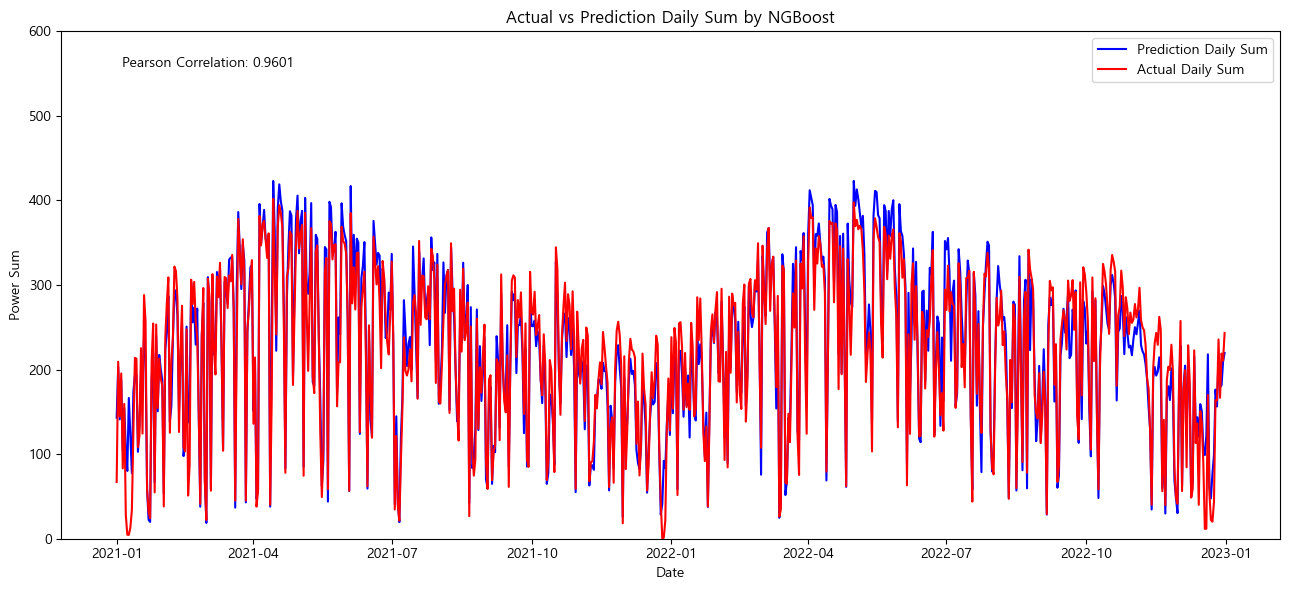

In [7]:

#all_data_test.set_index('date', inplace=True)

y_test_df = pd.DataFrame({'date': all_data_test.index, 'power': y_test})
y_test_df.set_index('date', inplace=True)

daily_actual_sum = all_data_test.resample('D').sum()['power']

daily_predicted_sum = pd.DataFrame({'date': all_data_test.index, 'predicted': y_preds})
daily_predicted_sum['date'] = pd.to_datetime(daily_predicted_sum['date'])
daily_predicted_sum.set_index('date', inplace=True)
daily_predicted_sum = daily_predicted_sum.resample('D').sum()['predicted']
    
# 그래프 그리기
plt.figure(figsize=(13, 6))
plt.ylim(0,600)

# 실제값과 예측값에 대한 꺾은선 그래프
plt.plot(daily_predicted_sum.index, daily_predicted_sum, color='blue', label='Prediction Daily Sum')
plt.plot(daily_predicted_sum.index, daily_actual_sum, color='red', label='Actual Daily Sum')
#c7cedd light
#042c84 blue
#AA1F4A red
# 제목, 범례, x/y 레이블 추가

corr_coefficient, _ = calculate_pearsonr(daily_predicted_sum, daily_actual_sum)
plt.text(0.05, 0.95, f'Pearson Correlation: {corr_coefficient:.4f}', transform=plt.gca().transAxes, verticalalignment='top')


plt.title('Actual vs Prediction Daily Sum by NGBoost')
plt.xlabel('Date')
plt.ylabel('Power Sum')
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()


In [73]:
all_data_test.head()

power                date       name   
1970-01-01 00:00:00.000008924   0.212389 2021-01-01 09:00:00  영암에프원태양광b  \
1970-01-01 00:00:00.000008925   1.953982 2021-01-01 10:00:00  영암에프원태양광b   
1970-01-01 00:00:00.000008926   4.715044 2021-01-01 11:00:00  영암에프원태양광b   
1970-01-01 00:00:00.000008927   4.205310 2021-01-01 12:00:00  영암에프원태양광b   
1970-01-01 00:00:00.000008928  11.171681 2021-01-01 13:00:00  영암에프원태양광b   

                               Temp(C)  Prec(mm)  Wind_speed(m/s)  Humidity   
1970-01-01 00:00:00.000008924     -1.5       0.0              2.8      88.0  \
1970-01-01 00:00:00.000008925      0.5      -1.0              2.1      79.0   
1970-01-01 00:00:00.000008926      2.0      -1.0              4.2      58.0   
1970-01-01 00:00:00.000008927      2.5      -1.0              2.7      58.0   
1970-01-01 00:00:00.000008928      2.9      -1.0              5.0      52.0   

                               Vapor_pressure(hPa)  sunshine(hr)   
1970-01-01 00:00:00.000008924                  4.8           0.4  \
1970-01-01 00:00:00.000008925                  5.0           0.9   
1970-01-01 00:00:00.000008926                  4.1           0.4   
1970-01-01 00:00:00.000008927                  4.2           0.3   
1970-01-01 00:00:00.000008928                  3.9           0.3   

                               Solar_Radiation(MJ/m2)  Snowfall(cm)   
1970-01-01 00:00:00.000008924                    0.30           2.8  \
1970-01-01 00:00:00.000008925                    1.01           2.5   
1970-01-01 00:00:00.000008926                    0.96           2.1   
1970-01-01 00:00:00.000008927                    1.01           1.2   
1970-01-01 00:00:00.000008928                    1.01          -1.0   

                               Cloud_Cover(1/10)  year  month  hour  
1970-01-01 00:00:00.000008924                4.0  2021      1     9  
1970-01-01 00:00:00.000008925                6.0  2021      1    10  
1970-01-01 00:00:00.000008926                7.0  2021      1    11  
1970-01-01 00:00:00.000008927                8.0  2021      1    12  
1970-01-01 00:00:00.000008928                8.0  2021      1    13

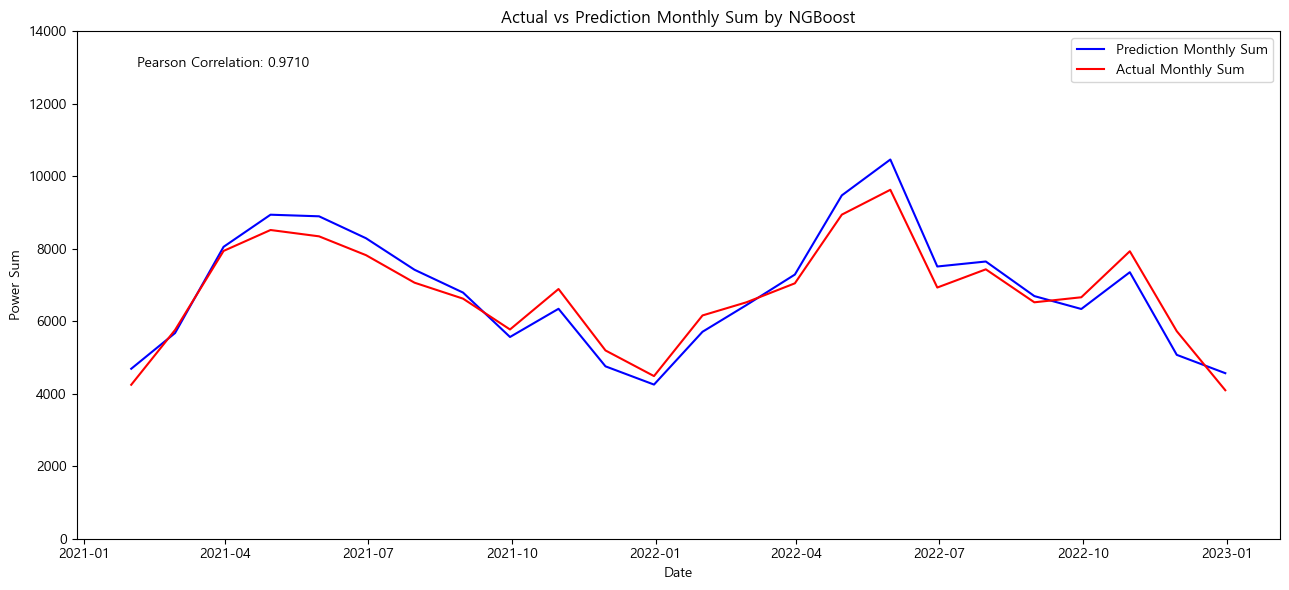

In [8]:
# 인덱스를 DateTime 형식으로 변환
#all_data_test.index = all_data_test['date']
all_data_test.index = pd.to_datetime(all_data_test.index)

# 월별 합계 계산 (power 열만 선택)
monthly_actual_sum = all_data_test['power'].resample('M').sum()
monthly_predicted_sum = daily_predicted_sum.resample('M').sum()

# 그래프 그리기
plt.figure(figsize=(13, 6))
plt.ylim(0, 14000)  # y축 범위 조정

# 실제값과 예측값에 대한 꺾은선 그래프
plt.plot(monthly_predicted_sum.index, monthly_predicted_sum, color='blue', label='Prediction Monthly Sum')
plt.plot(monthly_actual_sum.index, monthly_actual_sum, color='red', label='Actual Monthly Sum')

# 상관 계수 계산 및 텍스트 표시
corr_coefficient_monthly, _ = calculate_pearsonr(monthly_predicted_sum, monthly_actual_sum)
plt.text(0.05, 0.95, f'Pearson Correlation: {corr_coefficient_monthly:.4f}', transform=plt.gca().transAxes, verticalalignment='top')

# 제목, 범례, x/y 레이블 추가
plt.title('Actual vs Prediction Monthly Sum by NGBoost')
plt.xlabel('Date')
plt.ylabel('Power Sum')
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()
